The notebook reproduces the sebsequent analysis of multiple scRNA Seq datasets from various healthy tissues and the main figures from the corresponding paper.

First we import required packages:

In [2]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb

from gprofiler import gprofiler

import warnings
from rpy2.rinterface import RRuntimeWarning
from rpy2.robjects import pandas2ri

%load_ext rpy2.ipython

warnings.filterwarnings("ignore", category=RRuntimeWarning)
pandas2ri.activate()
plt.rcParams['figure.figsize']=(8,8)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
sc.settings.verbosity = 3
sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         8.4.0
anyio                       NA
asciitree                   NA
attr                        21.2.0
babel                       2.9.1
backcall                    0.2.0
backports                   NA
beta_ufunc                  NA
binom_ufunc                 NA
brotli                      1.0.9
certifi                     2021.10.08
cffi                        1.15.0
chardet                     4.0.0
charset_normalizer          2.0.8
cloudpickle                 2.0.0
colorama                    0.4.4
cycler                      0.10.0
cython_runtime              NA
dask                        2021.11.2
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.0
defusedxml                  0.7.1
entrypoints                 0.3
fasteners                   NA
fsspec                      0.7.4
google                      NA
gprofiler                   1.0.0
h5py          

In [3]:
#Define a nice colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [4]:
sc.set_figure_params(vector_friendly=True, color_map='Reds',
                     dpi=200,transparent=True, fontsize=14)

In [5]:
# set path for data and results
writepath='path/to/data/'

In [6]:
palette=['#FFFF00','#1CE6FF','#FF34FF','#FF4A46','#008941','#006FA6','#A30059','#FFDBE5', '#0000A6',
          '#63FFAC','#B79762', '#8FB0FF','#997D87','#5A0007','#809693','#FEFFE6','#1B4400','#4FC601',
          '#3B5DFF','#4A3B53','#FF2F80','#61615A','#BA0900','#6B7900','#00C2A0','#FF90C9','#B903AA',
          '#D16100','#DDEFFF','#000035','#7B4F4B','#A1C299','#300018','#0AA6D8','#013349','#00846F',
          '#372101','#FFB500','#C2FFED','#A079BF','#CC0744','#C0B9B2','#C2FF99','#001E09','#00489C',
          '#6F0062','#0CBD66','#EEC3FF','#456D75','#B77B68','#7A87A1']

# Target identification - CrossOrganAtlas filtering

In [7]:
#read in my final 29 genes with my 2 reference genes (see other notebook)
len(goi)

31

In [50]:
#read in all datasets

#Brain
adata_habib=sc.read(path + 'habib2017_human_processed.h5ad')

print('Brain datasets complete')

#Lung
adata_travaglini=sc.read(path + 'adata_travaglini_processed.h5ad')

adata_madissoon_lung=sc.read(path + 'adata_madissoon_processed.h5ad')

adata_reyfman=sc.read(path + 'adata_reyfman_processed.h5ad')

adata_kim=sc.read(path + 'adata_nLung_Kim_curated.h5ad')

print('Lung datasets complete')

#Lymph nodes
adata_kim_ln=sc.read(path + 'adata_nLN_Kim_processed.h5ad')

print('Lymph nodes datasets complete')

#Liver
adata_macparland=sc.read(path + 'macparland2018_processed.h5ad')

adata_ramachandran=sc.read(path + 'ramachandran2019_processed.h5ad')

print('Liver datasets complete')

#Kidney
adata_steward=sc.read(path + 'adata_steward_processed.h5ad')

print('Kidney datasets complete')

#Gut
adata_james=sc.read(path + 'james2020_processed.h5ad')

adata_madissoon_colon=sc.read(path + 'madissoon2019_processed.h5ad')

print('Gut datasets complete')

#Skin
adata_cheng=sc.read(path + 'cheng2018_processed.h5ad')

print('Skin datasets complete')

#Heart
adata_han=sc.read(path + 'han2020_processed.h5ad')

print('Heart datasets complete')

Brain datasets complete
Lung datasets complete
Lymph nodes datasets complete
Liver datasets complete
Kidney datasets complete
Gut datasets complete
Skin datasets complete
Heart datasets complete


In [86]:
# concatenate all with 'outer' settings
adata = adata_habib.concatenate(adata_travaglini, adata_madissoon_lung, adata_reyfman, adata_kim, adata_kim_ln,
                                adata_macparland, adata_ramachandran, adata_steward, adata_james, 
                                adata_madissoon_colon, adata_cheng, adata_han, join='outer')

layers concatenation is not yet available for 'outer' intersection and will be ignored.
/opt/python/lib/python3.7/site-packages/anndata/_core/anndata.py:1880: UserWarning: Only some adata objects have `.raw` attribute, not concatenating `.raw` attributes.
  UserWarning,


In [87]:
# remove irrelevant .obs
del adata.obs['BCR_CLONE']
del adata.obs['BCR_ChainCombination']
del adata.obs['BCR_ISOTYPE']
del adata.obs['BCR_PANDONOR_CLONE']
del adata.obs['BCR_SEQUENCE_ID']
del adata.obs['Celltypes']
del adata.obs['Donor']
del adata.obs['IGH_D_CALL']
del adata.obs['IGH_J_CALL']
del adata.obs['IGH_MU_FREQ']
del adata.obs['IGH_READS']
del adata.obs['IGH_UMIS']
del adata.obs['IGH_V_CALL_GENOTYPED']
del adata.obs['IGK_READS']
del adata.obs['IGK_UMIS']
del adata.obs['IGL_C_Gene']
del adata.obs['IGL_READS']
del adata.obs['IGL_UMIS']
del adata.obs['IGL_VDJ_Gene']
del adata.obs['Re-annotation']
del adata.obs['TCR_Clone']
del adata.obs['TCR_c_gene']
del adata.obs['TCR_cdr3']
del adata.obs['TCR_cdr3_nt']
del adata.obs['TCR_d_gene']
del adata.obs['TCR_j_gene']
del adata.obs['TCR_reads']
del adata.obs['TCR_umis']
del adata.obs['TCR_v_gene']
del adata.obs['Time']
del adata.obs['aetiology']
del adata.obs['ann_level_1']
del adata.obs['ann_level_2']
del adata.obs['ann_level_3']
del adata.obs['annotation_indepth']
del adata.obs['annotation_lineage']
del adata.obs['annotation_original']
del adata.obs['batch']
del adata.obs['broad_celltype']
del adata.obs['cell subtype']
del adata.obs['cell type']
del adata.obs['cell type refined']
del adata.obs['cell_ontology_class']
del adata.obs['cell_ontology_class_broad']
del adata.obs['cell_ontology_id']
del adata.obs['cell_type']
del adata.obs['celltype']
del adata.obs['celltype_global']
del adata.obs['celltype_specific']
del adata.obs['compartment']
del adata.obs['compl']
del adata.obs['condition']
del adata.obs['dataset']
del adata.obs['donor']
del adata.obs['donor_time']
del adata.obs['healthy']
del adata.obs['ident']
del adata.obs['last_author/PI']
del adata.obs['leiden']
del adata.obs['liver']
del adata.obs['log10_total_counts']
del adata.obs['log1p_n_counts']
del adata.obs['log1p_n_genes']
del adata.obs['log1p_n_genes_by_counts']
del adata.obs['log1p_total_counts']
del adata.obs['log_counts']
del adata.obs['mito_frac']
del adata.obs['mt_frac']
del adata.obs['nGene']
del adata.obs['nUMI']
del adata.obs['n_counts']
del adata.obs['n_genes']
del adata.obs['n_genes_by_counts']
del adata.obs['n_genes_detected']
del adata.obs['organ']
del adata.obs['origin']
del adata.obs['original_celltype_ann']
del adata.obs['patient']
del adata.obs['pct_counts_in_top_100_genes']
del adata.obs['pct_counts_in_top_200_genes']
del adata.obs['pct_counts_in_top_500_genes']
del adata.obs['pct_counts_in_top_50_genes']
del adata.obs['percent.mito']
del adata.obs['percent_hb']
del adata.obs['percent_mito']
del adata.obs['percent_ribo']
del adata.obs['percent_top50']
del adata.obs['region']
del adata.obs['ribo_frac']
del adata.obs['sample']
del adata.obs['size_factors']
del adata.obs['state_exact']
del adata.obs['tissue']
del adata.obs['total_counts']

In [100]:
del adata.obs['CellType']

In [93]:
genes=np.array(adata.var.index)
genes

array(['AP006222.2', 'RP11-206L10.9', 'LINC00115', ..., 'LINC01465',
       'LOC101927051', 'FOXE1'], dtype=object)

In [94]:
del adata.var

In [98]:
del adata.obsm

In [405]:
adata

AnnData object with n_obs × n_vars = 531582 × 33443 
    obs: 'CellType_Atlas'

In [406]:
adata_goi=adata[:,final_druggable].copy()

In [407]:
adata_goi.strings_to_categoricals()

... storing 'CellType_Atlas' as categorical


In [408]:
adata_goi.obs['CellType_Atlas'].cat.categories

Index(['Alveolar', 'Arterial', 'Astrocytes', 'B cells', 'Basal', 'Bronchial',
       'Capillary', 'Cardiomyocyte', 'Dendritics', 'Endothelial', 'Epithelial',
       'Erythroid', 'Fibroblasts', 'Glands', 'Hepatic stellate', 'Hepatocytes',
       'Innate Lymphoid', 'Interneurons', 'Keratinocytes', 'Loop of Henle',
       'Lymphoid', 'Macrophages', 'Mast', 'Megakaryocytes', 'Melanocyte',
       'Mesenchymal', 'Mesothelial', 'Microglia', 'Monocytes', 'Multiciliated',
       'NK cells', 'Neuronal stem cells', 'Neurons', 'Neutrophils',
       'Oligodendrocytes', 'Podocytes', 'Proximal Tubule', 'Remove',
       'Secretory', 'Smooth muscle', 'Stroma', 'T cells', 'Unknown', 'Venous'],
      dtype='object')

In [409]:
# only include relevant celltypes
ix=np.isin(adata_goi.obs['CellType_Atlas'],['Alveolar', 'Arterial', 'Astrocytes', 'B cells', 'Basal', 'Bronchial',
       'Capillary', 'Cardiomyocyte', 'Dendritics', 'Endothelial', 'Epithelial',
       'Erythroid', 'Fibroblasts', 'Glands', 'Hepatic stellate', 'Hepatocytes',
       'Innate Lymphoid', 'Interneurons', 'Keratinocytes', 'Loop of Henle',
       'Lymphoid', 'Macrophages', 'Mast', 'Megakaryocytes', 'Melanocyte',
       'Mesenchymal', 'Mesothelial', 'Microglia', 'Monocytes', 'Multiciliated',
       'NK cells', 'Neuronal stem cells', 'Neurons', 'Neutrophils',
       'Oligodendrocytes', 'Podocytes', 'Proximal Tubule',
       'Secretory', 'Smooth muscle', 'Stroma', 'T cells',  'Venous']) 
adata_goi=adata_goi[ix].copy()

In [410]:
order = ('Endothelial', 'Epithelial', 'Mesenchymal', 'Mesothelial','Stroma','Erythroid', 'Fibroblasts',
         'Innate Lymphoid', 'Lymphoid','Monocytes','Macrophages','Dendritics', 'Mast', 'Megakaryocytes', 
         'B cells', 'T cells','NK cells','Multiciliated','Neutrophils','Secretory','Astrocytes', 'Interneurons',  
         'Neurons', 'Microglia', 'Neuronal stem cells', 'Oligodendrocytes','Alveolar', 'Arterial','Bronchial',
         'Capillary', 'Venous','Smooth muscle','Cardiomyocyte','Basal',  'Keratinocytes', 'Melanocyte','Glands', 
         'Hepatic stellate', 'Hepatocytes','Loop of Henle', 'Podocytes','Proximal Tubule')

adata_goi.obs['CellType_Atlas']=adata_goi.obs['CellType_Atlas'].cat.reorder_categories(list(order), ordered=True)

In [413]:
# only critical cells
ix=np.isin(adata_goi.obs['CellType_Atlas'],['Endothelial','Arterial','Bronchial','Capillary','Venous',
                                             'Smooth muscle','Podocytes']) 
adata_goi_critical=adata_goi[ix].copy()

In [425]:
df=pd.DataFrame(columns=['Endothelial','Arterial','Bronchial','Capillary','Venous','Smooth muscle','Podocytes'], 
                    index=final_druggable)

In [416]:
adata_goi.X=sp.sparse.csr_matrix.todense(adata_goi.X)


In [ ]:
# calculate how many cells of one celltype express GOI

In [426]:
# Endothelial

# reduce to celltype
ix=np.isin(adata_goi.obs['CellType_Atlas'],['Endothelial']) 
adata_tmp=adata_goi[ix].copy()

In [427]:
matrix=pd.DataFrame(adata_tmp.X)
matrix.columns=final_druggable

In [428]:
percentages_endo=[]

In [429]:
for gene in matrix.columns:
    matrix_tmp=matrix[gene]
    overall=(len(matrix_tmp))
    express_goi=(len(matrix_tmp[matrix_tmp>0]))
    percent=100*express_goi/overall
    percentages_endo.append(percent)

In [430]:
df['Endothelial']=percentages_endo

In [431]:
# Arterial

# reduce to celltype
ix=np.isin(adata_goi.obs['CellType_Atlas'],['Arterial']) 
adata_tmp=adata_goi[ix].copy()

In [432]:
matrix=pd.DataFrame(adata_tmp.X)
matrix.columns=final_druggable
percentages_tmp=[]

In [433]:
for gene in matrix.columns:
    matrix_tmp=matrix[gene]
    overall=(len(matrix_tmp))
    express_goi=(len(matrix_tmp[matrix_tmp>0]))
    percent=100*express_goi/overall
    percentages_tmp.append(percent)

In [434]:
df['Arterial']=percentages_tmp

In [435]:
# Bronchial

# reduce to celltype
ix=np.isin(adata_goi.obs['CellType_Atlas'],['Bronchial']) 
adata_tmp=adata_goi[ix].copy()

In [436]:
matrix=pd.DataFrame(adata_tmp.X)
matrix.columns=final_druggable
percentages_tmp=[]

In [437]:
for gene in matrix.columns:
    matrix_tmp=matrix[gene]
    overall=(len(matrix_tmp))
    express_goi=(len(matrix_tmp[matrix_tmp>0]))
    percent=100*express_goi/overall
    percentages_tmp.append(percent)

In [438]:
df['Bronchial']=percentages_tmp


In [439]:
# Capillary

# reduce to celltype
ix=np.isin(adata_goi.obs['CellType_Atlas'],['Capillary']) 
adata_tmp=adata_goi[ix].copy()

In [440]:
matrix=pd.DataFrame(adata_tmp.X)
matrix.columns=final_druggable
percentages_tmp=[]

In [441]:
for gene in matrix.columns:
    matrix_tmp=matrix[gene]
    overall=(len(matrix_tmp))
    express_goi=(len(matrix_tmp[matrix_tmp>0]))
    percent=100*express_goi/overall
    percentages_tmp.append(percent)

In [442]:
df['Capillary']=percentages_tmp

In [443]:
# Venous

# reduce to celltype
ix=np.isin(adata_goi.obs['CellType_Atlas'],['Venous']) 
adata_tmp=adata_goi[ix].copy()

In [444]:
matrix=pd.DataFrame(adata_tmp.X)
matrix.columns=final_druggable
percentages_tmp=[]

In [445]:
for gene in matrix.columns:
    matrix_tmp=matrix[gene]
    overall=(len(matrix_tmp))
    express_goi=(len(matrix_tmp[matrix_tmp>0]))
    percent=100*express_goi/overall
    percentages_tmp.append(percent)

In [446]:
df['Venous']=percentages_tmp

In [447]:
# Smooth muscle

# reduce to celltype
ix=np.isin(adata_goi.obs['CellType_Atlas'],['Smooth muscle']) 
adata_tmp=adata_goi[ix].copy()

In [448]:
matrix=pd.DataFrame(adata_tmp.X)
matrix.columns=final_druggable
percentages_tmp=[]

In [449]:
for gene in matrix.columns:
    matrix_tmp=matrix[gene]
    overall=(len(matrix_tmp))
    express_goi=(len(matrix_tmp[matrix_tmp>0]))
    percent=100*express_goi/overall
    percentages_tmp.append(percent)

In [450]:
df['Smooth muscle']=percentages_tmp

In [580]:
df['thresholds_passed']=df.apply(lambda row: sum([(x < 2) for x in row]), axis = 1)

In [584]:
len(df.columns)-1

6

In [ ]:
final_candidates=df[df['thresholds_passed']==len(df.columns)-1]

In [ ]:
final_candidates=final_candidates.index

In [8]:
len(final_candidates)

12

In [9]:
#read in druggable genes
druggable=pd.read_csv(writepath + 'druggable_proteome_genes.csv')
druggable=np.array(druggable['druggable_proteome_genes'])
len(druggable)

754

In [10]:
#intersection surface
final_candidates_druggable=reduce(np.intersect1d, (final_candidates, druggable))
len(final_candidates_druggable)

2

In [11]:
# 2 genes remain:
final_candidates_druggable

['CSF1R', 'CD86']

# Target candidate expression in human microglia

In [40]:
adata=sc.read(writepath + 'habib2017_human_processed.h5ad')

/home/moritz.thomas/.local/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/moritz.thomas/.local/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [6]:
palette=['#FF4A46','#008941','#006FA6','#A30059','#FFDBE5', '#0000A6',
          '#63FFAC','#B79762', '#8FB0FF','#997D87','#5A0007','#809693','#FEFFE6','#1B4400','#4FC601',
          '#3B5DFF','#4A3B53','#FF2F80','#61615A','#BA0900','#6B7900','#00C2A0','#FF90C9','#B903AA',
          '#D16100','#DDEFFF','#000035','#7B4F4B','#A1C299','#300018','#0AA6D8','#013349','#00846F',
          '#372101','#FFB500','#C2FFED','#A079BF','#CC0744','#C0B9B2','#C2FF99','#001E09','#00489C',
          '#6F0062','#0CBD66','#EEC3FF','#456D75','#B77B68','#7A87A1']

In [7]:
adata.obs.CellType_Atlas.cat.categories

Index(['Astrocytes', 'Endothelial', 'Interneurons', 'Neurons', 'Microglia',
       'Neuronal stem cells', 'Oligodendrocytes', 'Unknown'],
      dtype='object')

In [8]:
# remove unknown cluster
ix=np.isin(adata.obs['CellType_Atlas'],['Astrocytes', 'Endothelial', 'Interneurons', 'Neurons', 'Microglia',
       'Neuronal stem cells', 'Oligodendrocytes']) 
adata=adata[ix].copy()

In [9]:
# Calculate the visualizations
sc.pp.neighbors(adata)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50


2022-10-01 18:04:31.865337: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/R/lib/R/lib
2022-10-01 18:04:31.865367: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:14)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


In [10]:
palette=['#FFFF00','#1CE6FF','#FF34FF','#FF4A46','#008941','#006FA6','#A30059','#FFDBE5', '#0000A6',
          '#63FFAC','#B79762', '#8FB0FF','#997D87','#5A0007','#809693','#FEFFE6','#1B4400','#4FC601',
          '#3B5DFF','#4A3B53','#FF2F80','#61615A','#BA0900','#6B7900','#00C2A0','#FF90C9','#B903AA',
          '#D16100','#DDEFFF','#000035','#7B4F4B','#A1C299','#300018','#0AA6D8','#013349','#00846F',
          '#372101','#FFB500','#C2FFED','#A079BF','#CC0744','#C0B9B2','#C2FF99','#001E09','#00489C',
          '#6F0062','#0CBD66','#EEC3FF','#456D75','#B77B68','#7A87A1']

In [11]:
adata.obs.CellType_Atlas.cat.categories

Index(['Astrocytes', 'Endothelial', 'Interneurons', 'Neurons', 'Microglia',
       'Neuronal stem cells', 'Oligodendrocytes'],
      dtype='object')

In [12]:
adata.uns['CellType_Atlas_colors']=['#4A3B53','#1CE6FF','orange','#7B4F4B','#FF4A46','purple','#008941','purple']

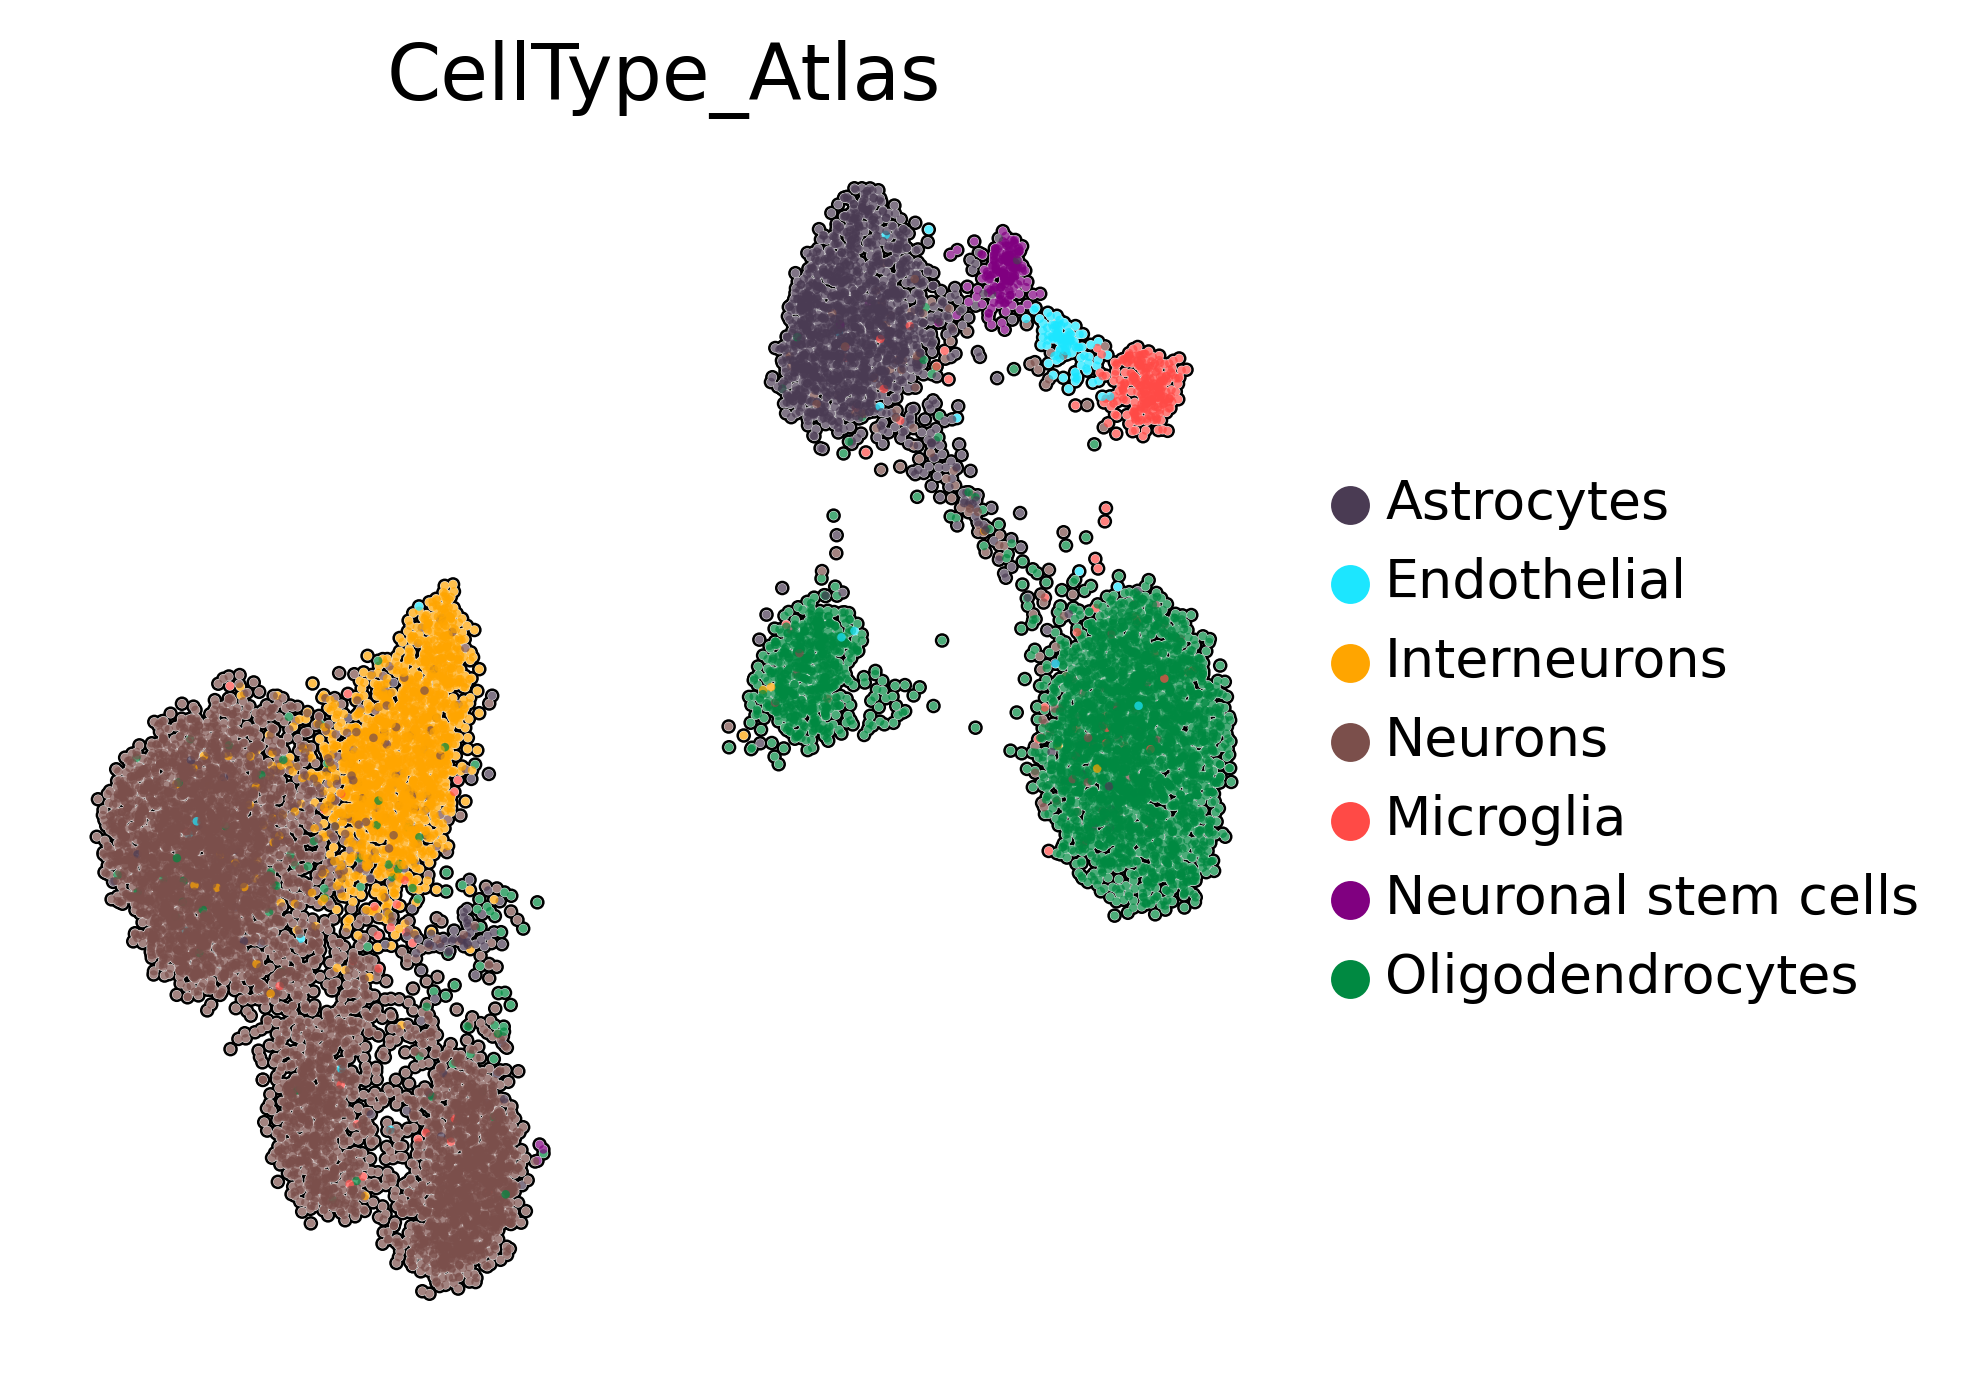

In [13]:
sc.pl.umap(adata, color=['CellType_Atlas'], add_outline=True, 
           use_raw=False, wspace=0.5, legend_fontsize='x-small',frameon=False)

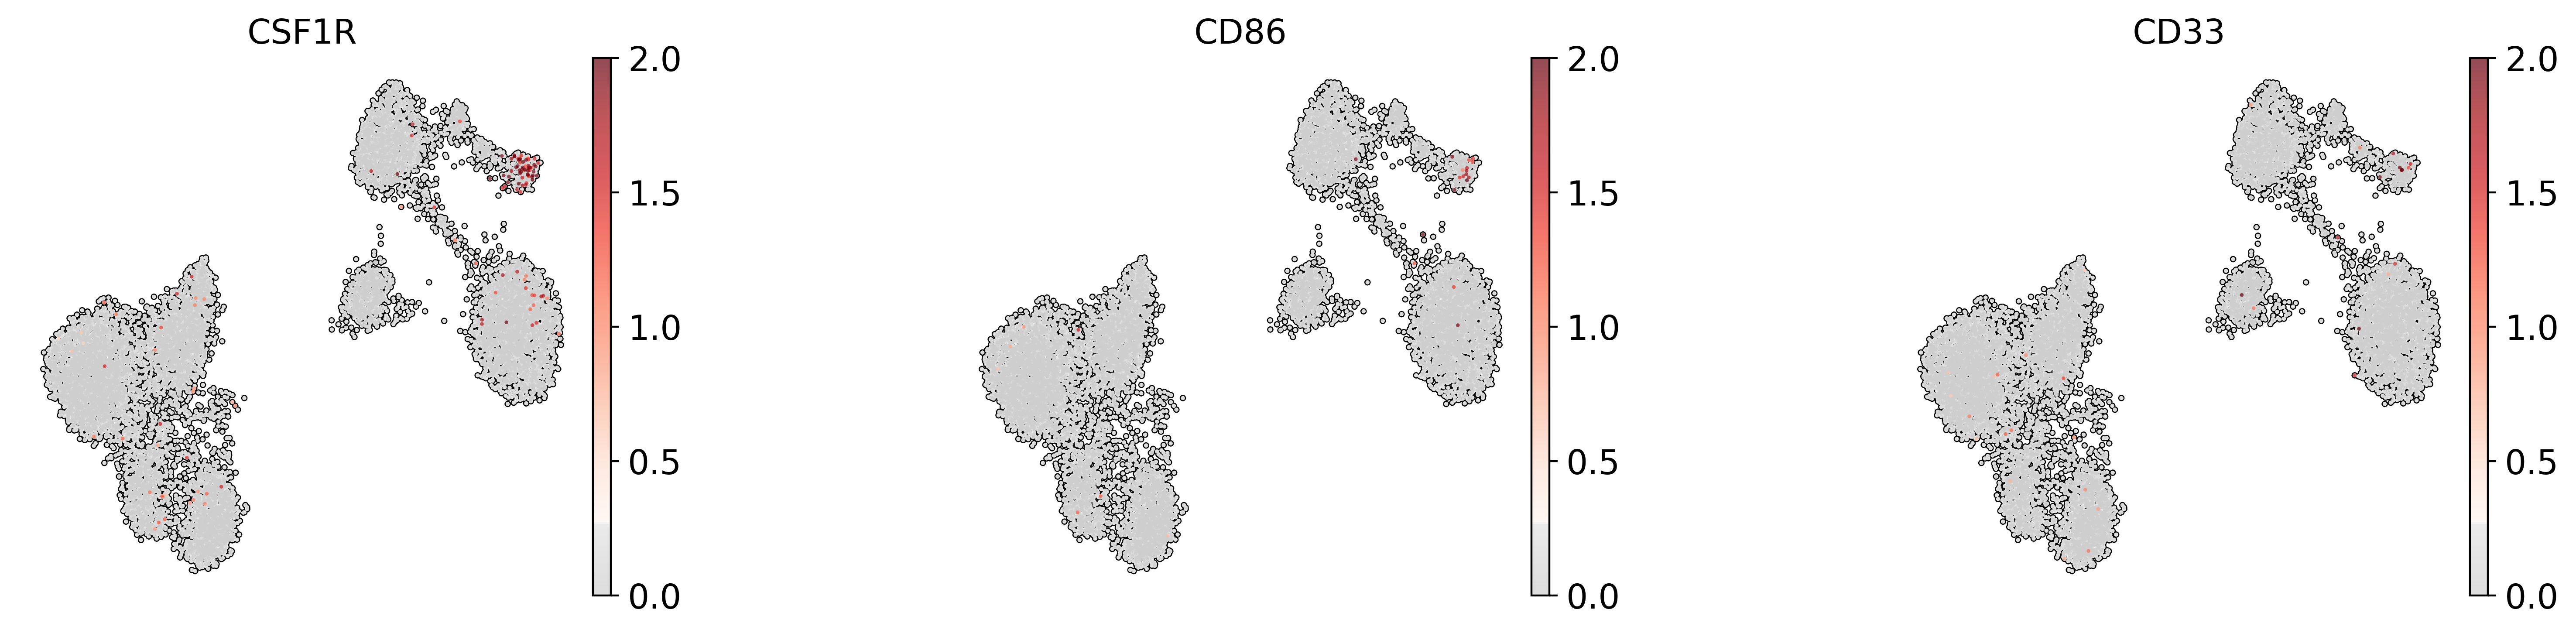

In [14]:
sc.pl.umap(adata, color=['CSF1R','CD86','CD33'], add_outline=True, 
           use_raw=False, wspace=0.5, legend_fontsize='x-small',color_map=mymap,frameon=False, vmax=2)

In [15]:
#subsample 1500 Neurons and 1500 Oligodendrocytes
x_samp=adata.obs_names[np.isin(adata.obs['CellType_Atlas'],['Neurons'])]
x_samp=np.random.choice(x_samp,1500,replace=False)
x_obs=list(x_samp)+list(adata.obs_names[np.isin(adata.obs['CellType_Atlas'],['Astrocytes', 'Endothelial', 
                                                                             'Interneurons', 'Microglia',
                                                                             'Neuronal stem cells', 'Oligodendrocytes'])])
adata_sub=adata[x_obs].copy()



x_samp=adata_sub.obs_names[np.isin(adata_sub.obs['CellType_Atlas'],['Oligodendrocytes'])]
x_samp=np.random.choice(x_samp,1500,replace=False)
x_obs=list(x_samp)+list(adata_sub.obs_names[np.isin(adata_sub.obs['CellType_Atlas'],['Astrocytes', 'Endothelial', 
                                                                                     'Interneurons', 'Neurons', 
                                                                                     'Microglia','Neuronal stem cells'])])
adata_sub=adata_sub[x_obs].copy()

In [16]:
adata_sub.obs.CellType_Atlas.value_counts()

Interneurons           1629
Astrocytes             1537
Neurons                1500
Oligodendrocytes       1500
Microglia               306
Neuronal stem cells     178
Endothelial             121
Name: CellType_Atlas, dtype: int64

In [17]:
adata_sub.uns['CellType_Atlas_colors']=['#4A3B53','#1CE6FF','orange','#7B4F4B','#FF4A46','purple','#008941','purple']

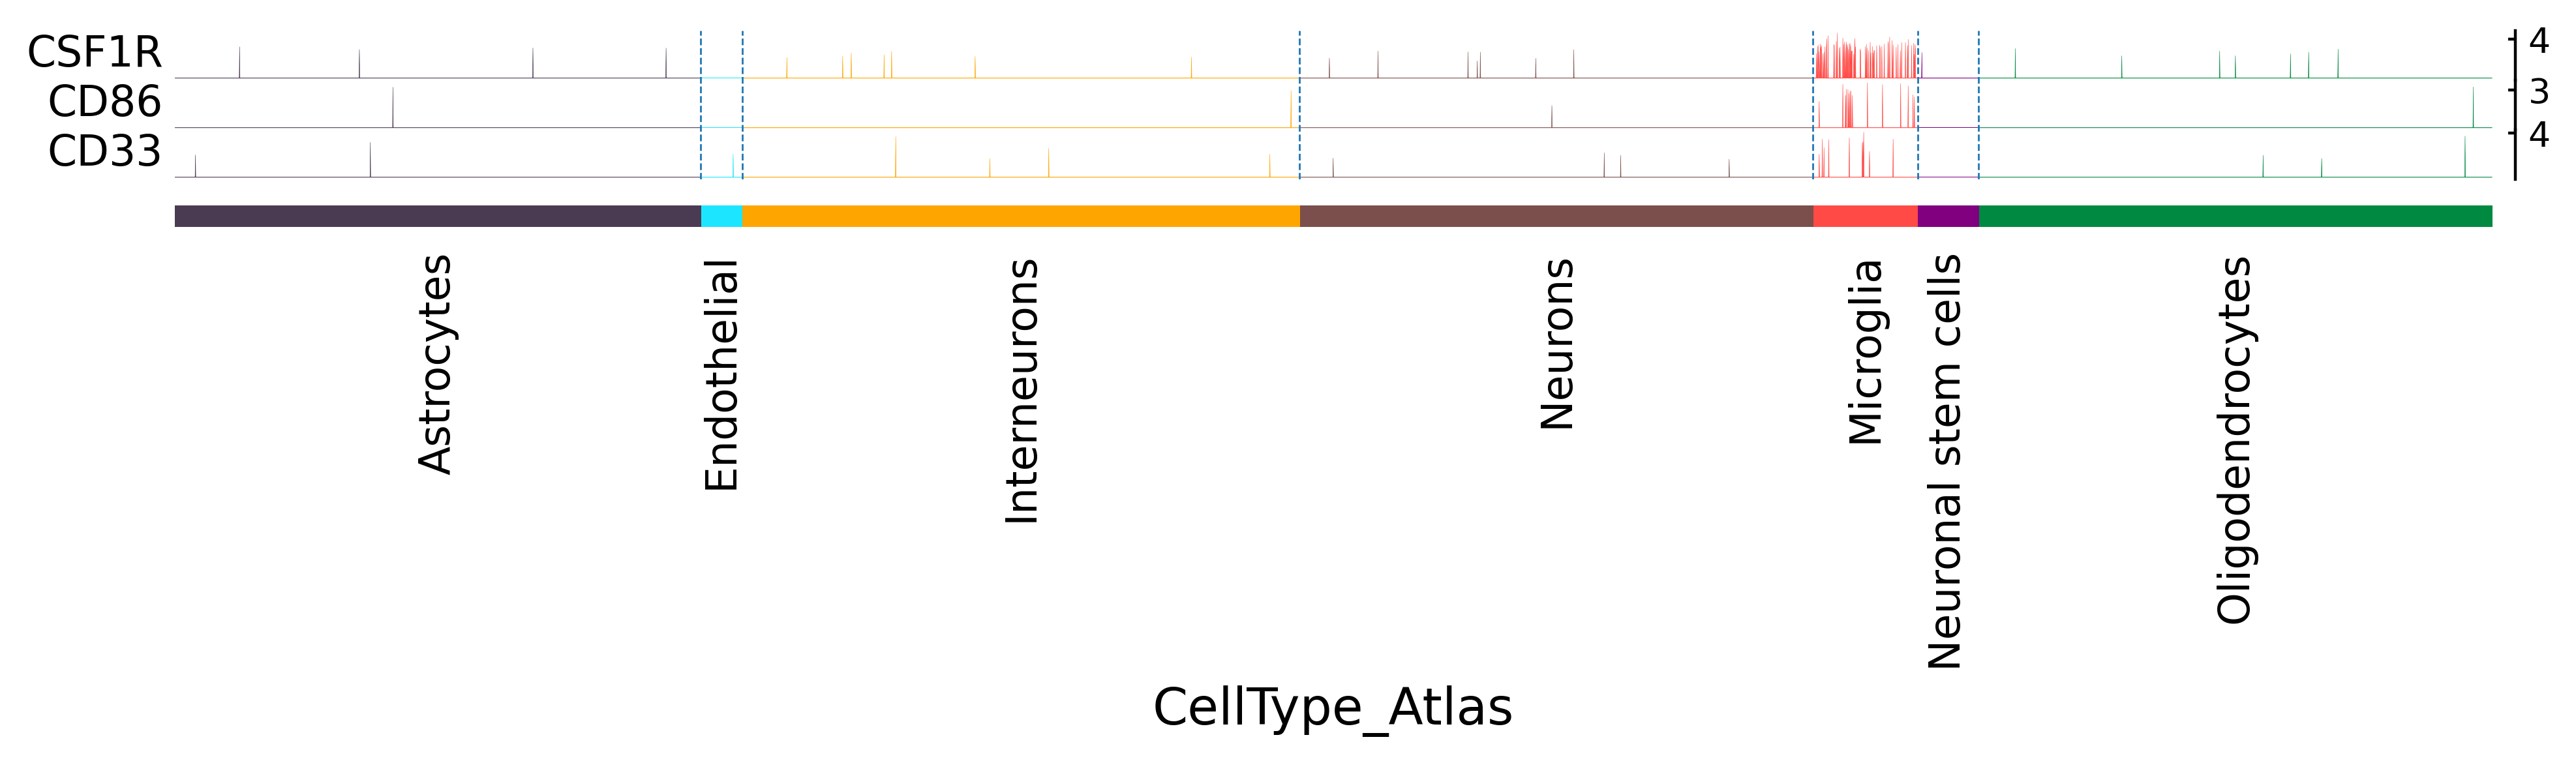

In [18]:
sc.pl.tracksplot(adata_sub, var_names=['CSF1R','CD86','CD33'], 
                 groupby='CellType_Atlas', cmap='Reds', standard_scale='var')

# Target candidate expression in mouse microglia

For the brain dataset of Habib, processed data was obtained from the original study (https://doi.org/10.1038/nmeth.4407), barcodes were filtered according to the annotated metadata

In [217]:
adata=sc.read(writepath + 'habib2017_mouse_filtered.h5ad')

In [219]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

In [220]:
# FILTER PARAMETERS
print('Total number of cells: {:d}'.format(adata.n_obs))

#Filter cells with genes over 5500
sc.pp.filter_cells(adata, max_genes = 4000)
print('Number of cells after gene filter: {:d}'.format(adata.n_obs))

Total number of cells: 13313
filtered out 131 cells that have more than 4000 genes expressed
Number of cells after gene filter: 13182


In [221]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata.n_vars))

# Min 20 cells - filters out low count genes
sc.pp.filter_genes(adata, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata.n_vars))

Total number of genes: 17308
filtered out 1629 genes that are detected in less than 20 cells
Number of genes after cell filter: 15679


In [223]:
adata.X = sp.sparse.csr_matrix(adata.X)

In [225]:
# extract highly variable genes
sc.pp.filter_genes_dispersion(adata, flavor='cell_ranger', 
                              n_top_genes=4000, log=False, subset=False)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)


In [226]:
# Calculate the visualizations
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata)

sc.tl.umap(adata)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:04)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


In [34]:
# make consistent annotations across datasets
adata.obs['CellType_Atlas']=adata.obs['Cluster'].copy()
adata.obs['CellType_Atlas'].cat.categories

Index(['ASC1', 'ASC2', 'ChP', 'Doublets', 'END', 'GABA1', 'GABA2', 'MG', 'ODC',
       'OPC', 'SMC', 'Unclassified1', 'Unclassified2', 'Unclassified3',
       'exCA1', 'exCA3', 'exDG', 'exPFC1', 'exPFC2', 'exPFC3', 'exPFC4',
       'exPFC5', 'exPFC6', 'exPFC7', 'exPFC8', 'exPFC9'],
      dtype='object')

In [35]:
ref_cluster=pd.Categorical(adata.obs['CellType_Atlas'],
                           categories=['ASC1', 'ASC2', 'ChP', 'Doublets', 'END', 'GABA1', 'GABA2', 'MG', 'ODC',
       'OPC', 'SMC', 'Unclassified1', 'Unclassified2', 'Unclassified3',
       'exCA1', 'exCA3', 'exDG', 'exPFC1', 'exPFC2', 'exPFC3', 'exPFC4',
       'exPFC5', 'exPFC6', 'exPFC7', 'exPFC8', 'exPFC9'])

In [36]:
ix=np.isin(ref_cluster,['ASC2'])
ref_cluster[ix]='ASC1'

ix=np.isin(ref_cluster,['Doublets'])
ref_cluster[ix]='ChP'

ix=np.isin(ref_cluster,['GABA2'])
ref_cluster[ix]='GABA1'

ix=np.isin(ref_cluster,['OPC'])
ref_cluster[ix]='ODC'

ix=np.isin(ref_cluster,['OPC'])
ref_cluster[ix]='ODC'

ix=np.isin(ref_cluster,['Unclassified2','Unclassified3'])
ref_cluster[ix]='Unclassified1'

ix=np.isin(ref_cluster,['exCA3', 'exDG', 'exPFC1', 'exPFC2', 'exPFC3', 'exPFC4',
       'exPFC5', 'exPFC6', 'exPFC7', 'exPFC8', 'exPFC9'])
ref_cluster[ix]='exCA1'

In [37]:
adata.obs['CellType_Atlas']=pd.Categorical(ref_cluster,
                                           categories=['ASC1', 'ChP', 'END', 'GABA1', 'MG', 'ODC','SMC', 
                                                       'Unclassified1', 'exCA1'])

In [39]:
adata.rename_categories('CellType_Atlas', ['Astrocytes', 'Remove', 'Endothelial', 'Interneurons',
                                           'Microglia', 'Oligodendrocytes', 'Smooth muscle', 'Unknown','Neurons'])

In [20]:
adata.obs.CellType_Atlas.cat.categories

Index(['Astrocytes', 'Remove', 'Endothelial', 'Interneurons', 'Microglia',
       'Oligodendrocytes', 'Smooth muscle', 'Unknown', 'Neurons'],
      dtype='object')

In [21]:
# remove unknown cluster
ix=np.isin(adata.obs['CellType_Atlas'],['Astrocytes', 'Endothelial', 'Interneurons', 'Microglia',
       'Oligodendrocytes', 'Smooth muscle', 'Neurons']) 
adata=adata[ix].copy()

In [22]:
# Calculate the visualizations
sc.pp.neighbors(adata)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


In [23]:
adata.uns['CellType_Atlas_colors']=['#4A3B53','#1CE6FF','orange','#FF4A46','#008941','#006FA6','#7B4F4B']

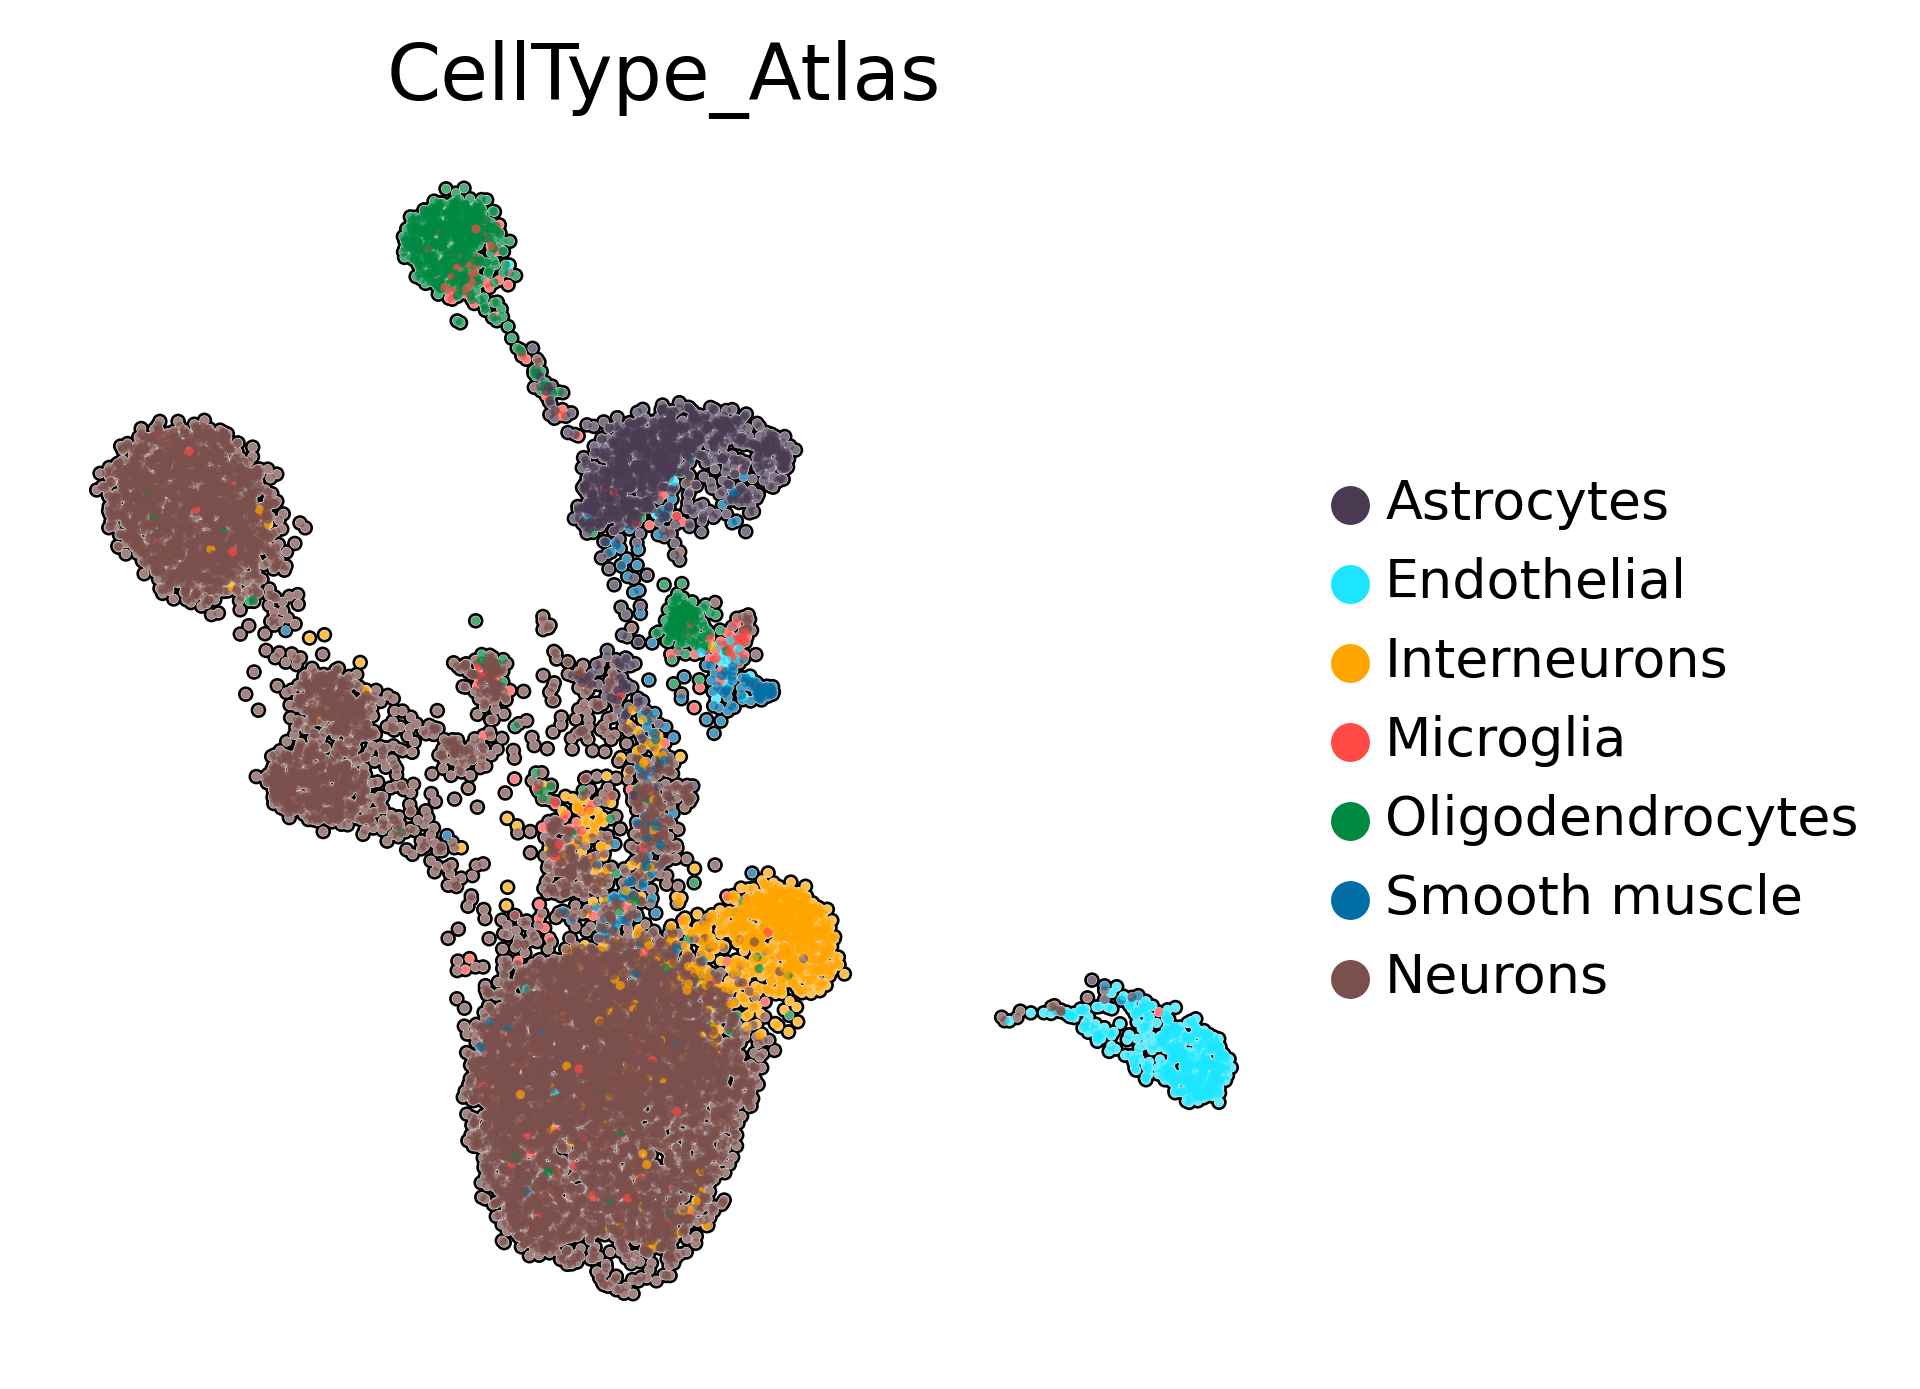

In [24]:
sc.pl.umap(adata, color=['CellType_Atlas'], add_outline=True, 
           use_raw=False, wspace=0.5, legend_fontsize='x-small',frameon=False)

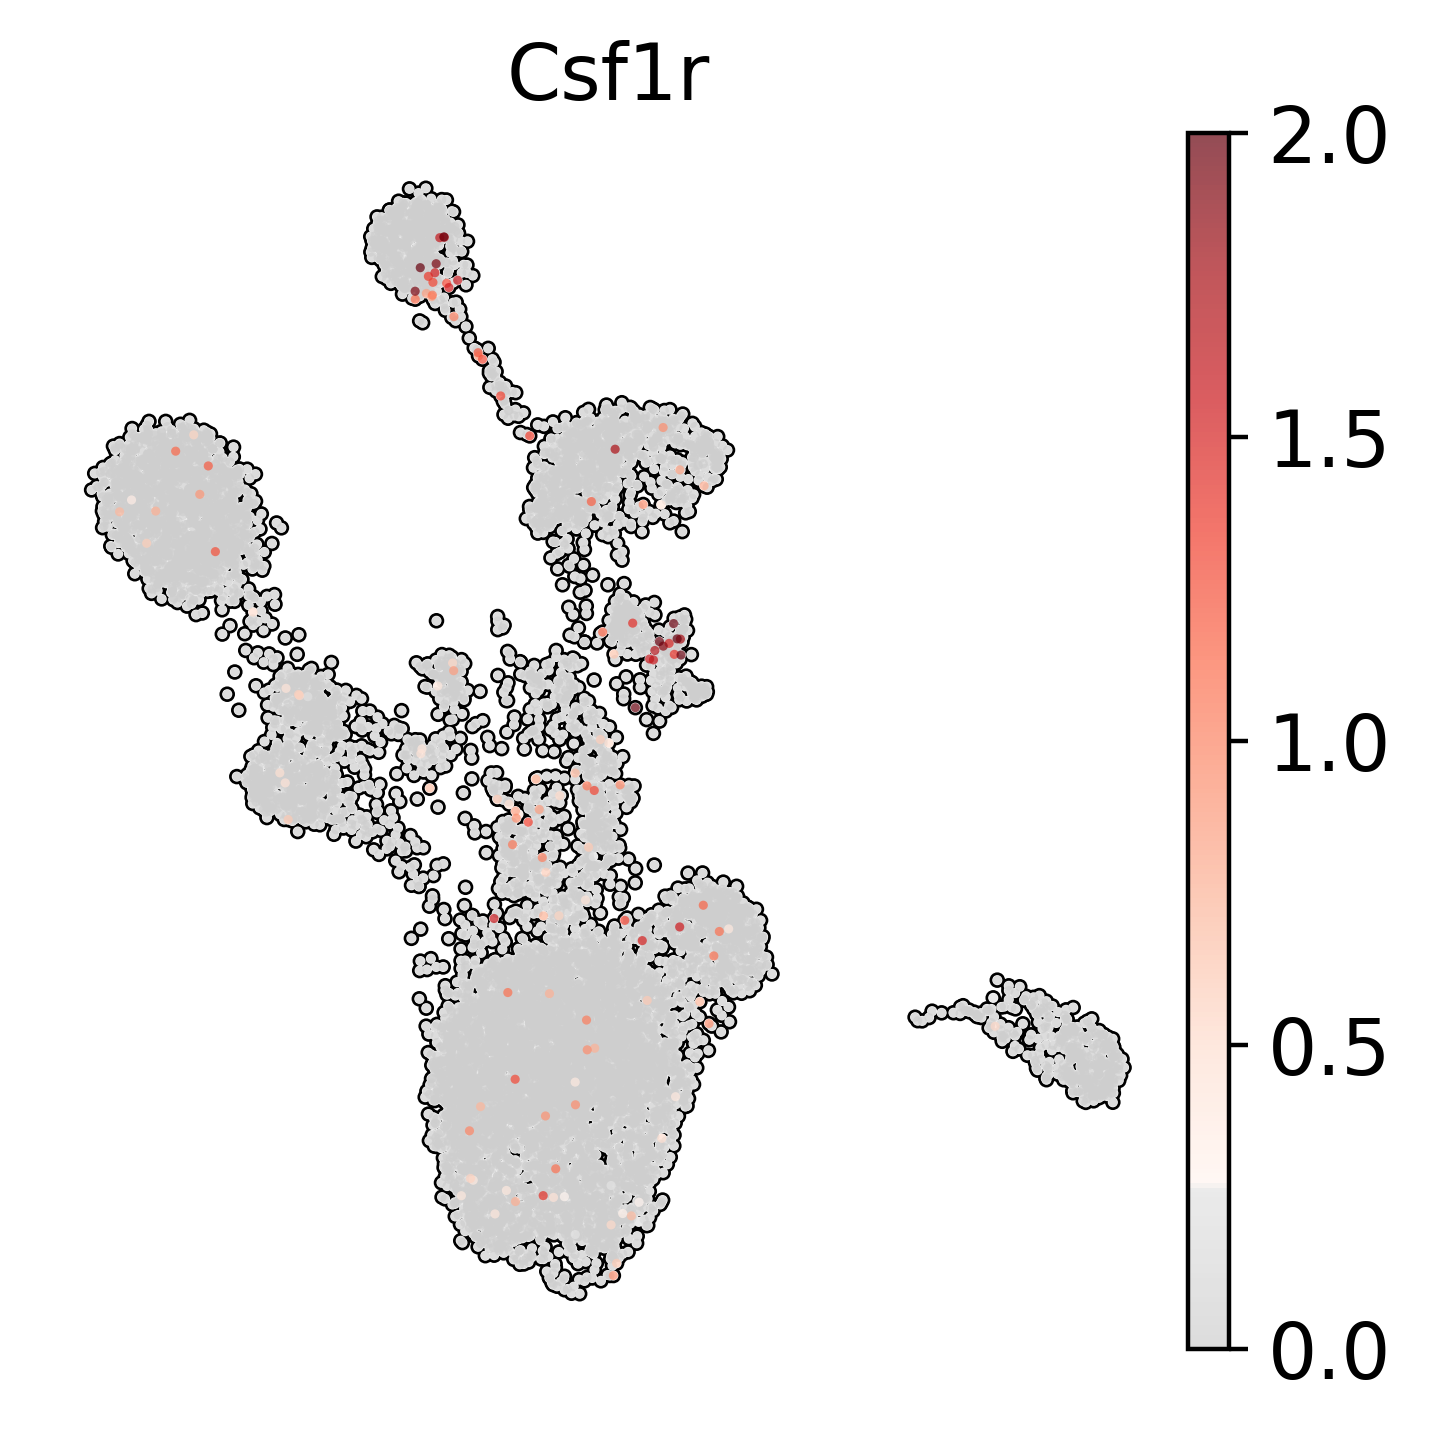

In [27]:
sc.pl.umap(adata, color=['Csf1r'], add_outline=True, 
           use_raw=False, wspace=0.5, legend_fontsize='x-small',color_map=mymap,frameon=False, vmax=2)

In [28]:
np.isin('Cd86', adata.var.index)

array(False)

In [30]:
#subsample 900 Neurons
x_samp=adata.obs_names[np.isin(adata.obs['CellType_Atlas'],['Neurons'])]
x_samp=np.random.choice(x_samp,900,replace=False)
x_obs=list(x_samp)+list(adata.obs_names[np.isin(adata.obs['CellType_Atlas'],['Astrocytes', 'Endothelial', 
                                                                             'Interneurons', 'Microglia',
                                                                             'Oligodendrocytes', 'Smooth muscle'])])
adata_sub=adata[x_obs].copy()

In [31]:
adata_sub.obs.CellType_Atlas.value_counts()

Astrocytes          948
Neurons             900
Interneurons        812
Oligodendrocytes    688
Endothelial         387
Microglia           207
Smooth muscle       183
Name: CellType_Atlas, dtype: int64

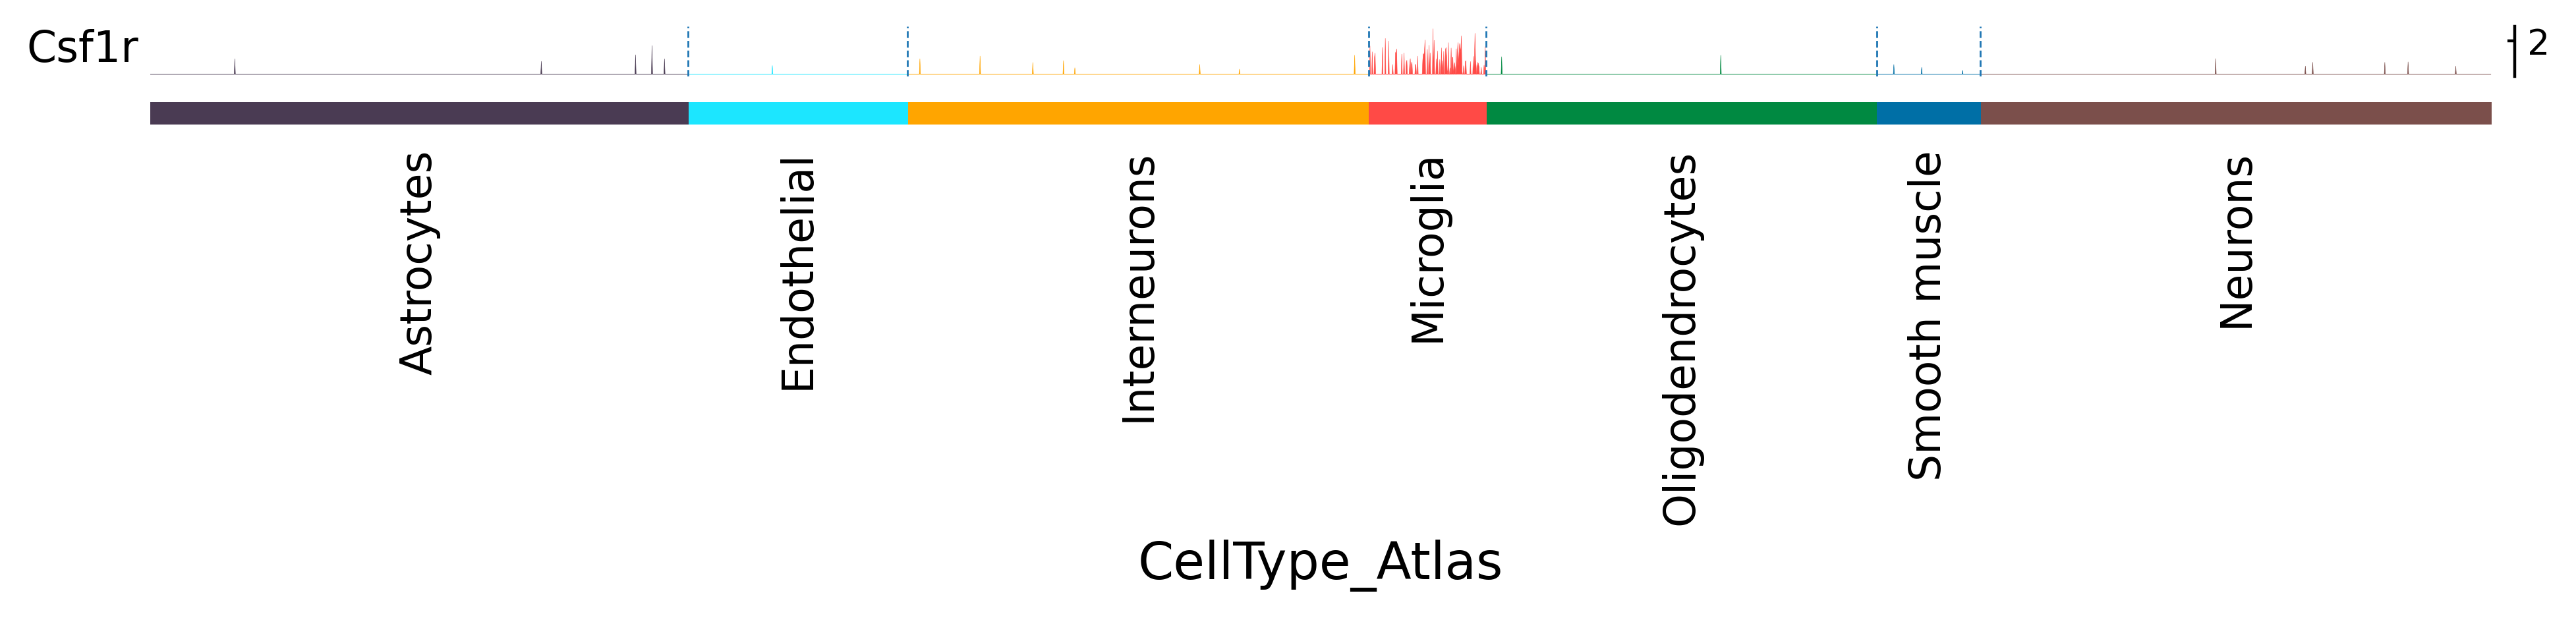

In [32]:
sc.pl.tracksplot(adata_sub, var_names='Csf1r', groupby='CellType_Atlas', cmap='Reds', standard_scale='var')

In [ ]:
adata.write(writepath + 'habib2017_mouse_processed.h5ad')

# Candidate expression across healthy human tissues

## CSF1R

In [8]:
#read in all datasets and subset to only include CSF1R

#Brain
adata_habib=sc.read(writepath + 'habib2017_human_processed.h5ad')
adata_habib=adata_habib[:,'CSF1R'].copy()

adata_habib_mouse=sc.read(writepath + 'habib2017_mouse_processed.h5ad')
adata_habib_mouse=adata_habib[:,'Csf1r'].copy()

print('Brain datasets complete')

#Lung
adata_travaglini=sc.read(writepath + 'travaglini2020_processed.h5ad')
adata_travaglini=adata_travaglini[:,'CSF1R'].copy()

adata_madissoon_lung=sc.read(writepath + 'madissoon2020_lung_processed.h5ad')
adata_madissoon_lung=adata_madissoon_lung[:,'CSF1R'].copy()

adata_reyfman=sc.read(writepath + 'reyfman2019_processed.h5ad')
adata_reyfman=adata_reyfman[:,'CSF1R'].copy()

adata_kim=sc.read(writepath + 'kim2020_lung_processed.h5ad')
adata_kim=adata_kim[:,'CSF1R'].copy()

print('Lung datasets complete')

#Lymph nodes
adata_kim_ln=sc.read(writepath + 'kim2020_lymphnodes_processed.h5ad')
adata_kim_ln=adata_kim_ln[:,'CSF1R'].copy()

print('Lymph nodes datasets complete')

#Liver
adata_macparland=sc.read(writepath + 'macparland2018_processed.h5ad')
adata_macparland=adata_macparland[:,'CSF1R'].copy()

adata_ramachandran=sc.read(writepath + 'ramachandran2019_processed.h5ad')
adata_ramachandran=adata_ramachandran[:,'CSF1R'].copy()

print('Liver datasets complete')

#Kidney
adata_steward=sc.read(writepath + 'steward2019_processed.h5ad')
adata_steward=adata_steward[:,'CSF1R'].copy()

print('Kidney datasets complete')

#Gut
adata_james=sc.read(writepath + 'james2020_processed.h5ad')
adata_james=adata_james[:,'CSF1R'].copy()

adata_madissoon_colon=sc.read(writepath + 'madissoon2019_colon_processed.h5ad')
adata_madissoon_colon=adata_madissoon_colon[:,'CSF1R'].copy()

print('Gut datasets complete')

#Skin
adata_cheng=sc.read(writepath + 'cheng2018_processed.h5ad')
adata_cheng=adata_cheng[:,'CSF1R'].copy()

print('Skin datasets complete')

#Heart
adata_han=sc.read(writepath + 'han2020_processed.h5ad')
adata_han=adata_han[:,'CSF1R'].copy()

print('Heart datasets complete')

Brain datasets complete
Lung datasets complete
Lymph nodes datasets complete
Liver datasets complete
Kidney datasets complete
Gut datasets complete
Skin datasets complete
Heart datasets complete


In [ ]:
# extract goi expression and append across datasets

In [10]:
#lets start with the first dataset - habib

In [9]:
adata_habib.X=sp.sparse.csr_matrix.todense(adata_habib.X)

In [12]:
adata_habib.X

matrix([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], dtype=float32)

In [13]:
matrix=adata_habib.X

In [14]:
newmatrix=pd.DataFrame(matrix)
newmatrix['Habib2017']=newmatrix[0]
del newmatrix[0]
newmatrix

Habib2017
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
...          ...
13062        0.0
13063        0.0
13064        0.0
13065        0.0
13066        0.0

[13067 rows x 1 columns]

In [15]:
adata_habib_mouse.X

<13182x1 sparse matrix of type '<class 'numpy.float32'>'
	with 152 stored elements in Compressed Sparse Row format>

In [17]:
adata_habib_mouse.X=sp.sparse.csr_matrix.todense(adata_habib_mouse.X)

In [18]:
adata_habib_mouse.X

matrix([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], dtype=float32)

In [19]:
newmatrix_tmp=pd.DataFrame(adata_habib_mouse.X)
newmatrix_tmp['Habib2017_mouse']=newmatrix_tmp[0]
del newmatrix_tmp[0]
newmatrix_tmp

Habib2017_mouse
0                  0.0
1                  0.0
2                  0.0
3                  0.0
4                  0.0
...                ...
13177              0.0
13178              0.0
13179              0.0
13180              0.0
13181              0.0

[13182 rows x 1 columns]

In [20]:
len(newmatrix.index)

13067

In [21]:
len(newmatrix_tmp.index)

13182

In [22]:
#assign new index for newmatrix_peng_healthy
newmatrix_tmp.index=np.arange(start=len(newmatrix.index), 
                                 stop=len(newmatrix.index)+len(newmatrix_tmp.index), 
                                 step=1)

In [23]:
#merge these two properly
combinedmatrix=pd.concat([newmatrix, newmatrix_tmp], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse
0            0.0              NaN
1            0.0              NaN
2            0.0              NaN
3            0.0              NaN
4            0.0              NaN
...          ...              ...
26244        NaN              0.0
26245        NaN              0.0
26246        NaN              0.0
26247        NaN              0.0
26248        NaN              0.0

[26249 rows x 2 columns]

In [26]:
adata_travaglini.X = adata_travaglini.X.todense()
matrix=adata_travaglini.X

In [27]:
newmatrix=pd.DataFrame(adata_travaglini.X)
newmatrix['Travaglini2020']=newmatrix[0]
del newmatrix[0]
newmatrix

Travaglini2020
0            0.000000
1            0.559668
2            0.000000
3            1.202262
4            0.000000
...               ...
60628        0.000000
60629        0.000000
60630        0.000000
60631        0.000000
60632        0.000000

[60633 rows x 1 columns]

In [28]:
len(combinedmatrix)

26249

In [29]:
len(newmatrix)

60633

In [30]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [31]:
combinedmatrix

Habib2017  Habib2017_mouse
0            0.0              NaN
1            0.0              NaN
2            0.0              NaN
3            0.0              NaN
4            0.0              NaN
...          ...              ...
26244        NaN              0.0
26245        NaN              0.0
26246        NaN              0.0
26247        NaN              0.0
26248        NaN              0.0

[26249 rows x 2 columns]

In [32]:
newmatrix

Travaglini2020
26249        0.000000
26250        0.559668
26251        0.000000
26252        1.202262
26253        0.000000
...               ...
86877        0.000000
86878        0.000000
86879        0.000000
86880        0.000000
86881        0.000000

[60633 rows x 1 columns]

In [33]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020
0            0.0              NaN             NaN
1            0.0              NaN             NaN
2            0.0              NaN             NaN
3            0.0              NaN             NaN
4            0.0              NaN             NaN
...          ...              ...             ...
86877        NaN              NaN             0.0
86878        NaN              NaN             0.0
86879        NaN              NaN             0.0
86880        NaN              NaN             0.0
86881        NaN              NaN             0.0

[86882 rows x 3 columns]

In [36]:
adata_madissoon_lung.X = adata_madissoon_lung.X.todense()
matrix=adata_madissoon_lung.X

In [38]:
#adata_madissoon_lung.X=sp.sparse.csr_matrix.todense(adata_madissoon_lung.X)
#matrix=adata_madissoon_lung.X

In [39]:
newmatrix=pd.DataFrame(adata_madissoon_lung.X)
newmatrix['Madissoon2019_Lung']=newmatrix[0]
del newmatrix[0]
newmatrix

Madissoon2019_Lung
0                0.000000
1                0.000000
2                0.000000
3                0.000000
4                0.000000
...                   ...
56299            0.000000
56300            0.000000
56301            0.546831
56302            0.000000
56303            0.000000

[56304 rows x 1 columns]

In [40]:
len(combinedmatrix)

86882

In [41]:
len(newmatrix)

56304

In [42]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [43]:
newmatrix

Madissoon2019_Lung
86882             0.000000
86883             0.000000
86884             0.000000
86885             0.000000
86886             0.000000
...                    ...
143181            0.000000
143182            0.000000
143183            0.546831
143184            0.000000
143185            0.000000

[56304 rows x 1 columns]

In [44]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020
0            0.0              NaN             NaN
1            0.0              NaN             NaN
2            0.0              NaN             NaN
3            0.0              NaN             NaN
4            0.0              NaN             NaN
...          ...              ...             ...
86877        NaN              NaN             0.0
86878        NaN              NaN             0.0
86879        NaN              NaN             0.0
86880        NaN              NaN             0.0
86881        NaN              NaN             0.0

[86882 rows x 3 columns]

In [45]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung
0             0.0              NaN             NaN                 NaN
1             0.0              NaN             NaN                 NaN
2             0.0              NaN             NaN                 NaN
3             0.0              NaN             NaN                 NaN
4             0.0              NaN             NaN                 NaN
...           ...              ...             ...                 ...
143181        NaN              NaN             NaN            0.000000
143182        NaN              NaN             NaN            0.000000
143183        NaN              NaN             NaN            0.546831
143184        NaN              NaN             NaN            0.000000
143185        NaN              NaN             NaN            0.000000

[143186 rows x 4 columns]

In [47]:
adata_reyfman.X = adata_reyfman.X.todense()
matrix=adata_reyfman.X

In [48]:
newmatrix=pd.DataFrame(adata_reyfman.X)
newmatrix['Reyfman2019']=newmatrix[0]
del newmatrix[0]
newmatrix

Reyfman2019
0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
...            ...
41498     0.000000
41499     0.000000
41500     0.821544
41501     0.000000
41502     0.000000

[41503 rows x 1 columns]

In [49]:
len(combinedmatrix)

143186

In [50]:
len(newmatrix)

41503

In [51]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [52]:
newmatrix

Reyfman2019
143186     0.000000
143187     0.000000
143188     0.000000
143189     0.000000
143190     0.000000
...             ...
184684     0.000000
184685     0.000000
184686     0.821544
184687     0.000000
184688     0.000000

[41503 rows x 1 columns]

In [53]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung
0             0.0              NaN             NaN                 NaN
1             0.0              NaN             NaN                 NaN
2             0.0              NaN             NaN                 NaN
3             0.0              NaN             NaN                 NaN
4             0.0              NaN             NaN                 NaN
...           ...              ...             ...                 ...
143181        NaN              NaN             NaN            0.000000
143182        NaN              NaN             NaN            0.000000
143183        NaN              NaN             NaN            0.546831
143184        NaN              NaN             NaN            0.000000
143185        NaN              NaN             NaN            0.000000

[143186 rows x 4 columns]

In [54]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
184684        NaN              NaN             NaN                 NaN   
184685        NaN              NaN             NaN                 NaN   
184686        NaN              NaN             NaN                 NaN   
184687        NaN              NaN             NaN                 NaN   
184688        NaN              NaN             NaN                 NaN   

        Reyfman2019  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
184684     0.000000  
184685     0.000000  
184686     0.821544  
184687     0.000000  
184688     0.000000  

[184689 rows x 5 columns]

In [56]:
#adata_kim.X = adata_kim.X.todense()
matrix=adata_kim.X

In [57]:
newmatrix=pd.DataFrame(adata_kim.X)
newmatrix['Kim2020_Lung']=newmatrix[0]
del newmatrix[0]
newmatrix

Kim2020_Lung
0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          1.318852
...             ...
42990      0.000000
42991      0.000000
42992      0.000000
42993      0.647448
42994      0.000000

[42995 rows x 1 columns]

In [58]:
len(combinedmatrix)

184689

In [59]:
len(newmatrix)

42995

In [60]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [61]:
newmatrix

Kim2020_Lung
184689      0.000000
184690      0.000000
184691      0.000000
184692      0.000000
184693      1.318852
...              ...
227679      0.000000
227680      0.000000
227681      0.000000
227682      0.647448
227683      0.000000

[42995 rows x 1 columns]

In [62]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
184684        NaN              NaN             NaN                 NaN   
184685        NaN              NaN             NaN                 NaN   
184686        NaN              NaN             NaN                 NaN   
184687        NaN              NaN             NaN                 NaN   
184688        NaN              NaN             NaN                 NaN   

        Reyfman2019  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
184684     0.000000  
184685     0.000000  
184686     0.821544  
184687     0.000000  
184688     0.000000  

[184689 rows x 5 columns]

In [63]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
227679        NaN              NaN             NaN                 NaN   
227680        NaN              NaN             NaN                 NaN   
227681        NaN              NaN             NaN                 NaN   
227682        NaN              NaN             NaN                 NaN   
227683        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  
0               NaN           NaN  
1               NaN           NaN  
2               NaN           NaN  
3               NaN           NaN  
4               NaN           NaN  
...             ...           ...  
227679          NaN      0.000000  
227680          NaN      0.000000  
227681          NaN      0.000000  
227682          NaN      0.647448  
227683          NaN      0.000000  

[227684 rows x 6 columns]

In [65]:
#adata_kim_ln.X = adata_kim_ln.X.todense()
matrix=adata_kim_ln.X

In [66]:
newmatrix=pd.DataFrame(adata_kim_ln.X)
newmatrix['Kim2020_LymphNodes']=newmatrix[0]
del newmatrix[0]
newmatrix

Kim2020_LymphNodes
0                     0.0
1                     0.0
2                     0.0
3                     0.0
4                     0.0
...                   ...
37441                 0.0
37442                 0.0
37443                 0.0
37444                 0.0
37445                 0.0

[37446 rows x 1 columns]

In [67]:
len(combinedmatrix)

227684

In [68]:
len(newmatrix)

37446

In [69]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [70]:
newmatrix

Kim2020_LymphNodes
227684                 0.0
227685                 0.0
227686                 0.0
227687                 0.0
227688                 0.0
...                    ...
265125                 0.0
265126                 0.0
265127                 0.0
265128                 0.0
265129                 0.0

[37446 rows x 1 columns]

In [71]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
227679        NaN              NaN             NaN                 NaN   
227680        NaN              NaN             NaN                 NaN   
227681        NaN              NaN             NaN                 NaN   
227682        NaN              NaN             NaN                 NaN   
227683        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  
0               NaN           NaN  
1               NaN           NaN  
2               NaN           NaN  
3               NaN           NaN  
4               NaN           NaN  
...             ...           ...  
227679          NaN      0.000000  
227680          NaN      0.000000  
227681          NaN      0.000000  
227682          NaN      0.647448  
227683          NaN      0.000000  

[227684 rows x 6 columns]

In [72]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
265125        NaN              NaN             NaN                 NaN   
265126        NaN              NaN             NaN                 NaN   
265127        NaN              NaN             NaN                 NaN   
265128        NaN              NaN             NaN                 NaN   
265129        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  
0               NaN           NaN                 NaN  
1               NaN           NaN                 NaN  
2               NaN           NaN                 NaN  
3               NaN           NaN                 NaN  
4               NaN           NaN                 NaN  
...             ...           ...                 ...  
265125          NaN           NaN                 0.0  
265126          NaN           NaN                 0.0  
265127          NaN           NaN                 0.0  
265128          NaN           NaN                 0.0  
265129          NaN           NaN                 0.0  

[265130 rows x 7 columns]

In [74]:
adata_macparland.X = adata_macparland.X.todense()
matrix=adata_macparland.X

In [75]:
newmatrix=pd.DataFrame(adata_macparland.X)
newmatrix['Macparland2018']=newmatrix[0]
del newmatrix[0]
newmatrix

Macparland2018
0           0.000000
1           0.000000
2           0.560939
3           0.000000
4           0.000000
...              ...
6266        0.000000
6267        0.000000
6268        0.000000
6269        0.000000
6270        0.000000

[6271 rows x 1 columns]

In [76]:
len(combinedmatrix)

265130

In [77]:
len(newmatrix)

6271

In [78]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [79]:
newmatrix

Macparland2018
265130        0.000000
265131        0.000000
265132        0.560939
265133        0.000000
265134        0.000000
...                ...
271396        0.000000
271397        0.000000
271398        0.000000
271399        0.000000
271400        0.000000

[6271 rows x 1 columns]

In [80]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
265125        NaN              NaN             NaN                 NaN   
265126        NaN              NaN             NaN                 NaN   
265127        NaN              NaN             NaN                 NaN   
265128        NaN              NaN             NaN                 NaN   
265129        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  
0               NaN           NaN                 NaN  
1               NaN           NaN                 NaN  
2               NaN           NaN                 NaN  
3               NaN           NaN                 NaN  
4               NaN           NaN                 NaN  
...             ...           ...                 ...  
265125          NaN           NaN                 0.0  
265126          NaN           NaN                 0.0  
265127          NaN           NaN                 0.0  
265128          NaN           NaN                 0.0  
265129          NaN           NaN                 0.0  

[265130 rows x 7 columns]

In [81]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
271396        NaN              NaN             NaN                 NaN   
271397        NaN              NaN             NaN                 NaN   
271398        NaN              NaN             NaN                 NaN   
271399        NaN              NaN             NaN                 NaN   
271400        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  
0               NaN           NaN                 NaN             NaN  
1               NaN           NaN                 NaN             NaN  
2               NaN           NaN                 NaN             NaN  
3               NaN           NaN                 NaN             NaN  
4               NaN           NaN                 NaN             NaN  
...             ...           ...                 ...             ...  
271396          NaN           NaN                 NaN             0.0  
271397          NaN           NaN                 NaN             0.0  
271398          NaN           NaN                 NaN             0.0  
271399          NaN           NaN                 NaN             0.0  
271400          NaN           NaN                 NaN             0.0  

[271401 rows x 8 columns]

In [83]:
adata_ramachandran.X = adata_ramachandran.X.todense()
matrix=adata_ramachandran.X

In [84]:
newmatrix=pd.DataFrame(adata_ramachandran.X)
newmatrix['Ramachandran2019']=newmatrix[0]
del newmatrix[0]
newmatrix

Ramachandran2019
0              0.000000
1              0.000000
2              1.335093
3              1.078912
4              2.068311
...                 ...
33032          0.000000
33033          0.000000
33034          0.000000
33035          0.000000
33036          0.216613

[33037 rows x 1 columns]

In [85]:
len(combinedmatrix)

271401

In [86]:
len(newmatrix)

33037

In [87]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [88]:
newmatrix

Ramachandran2019
271401          0.000000
271402          0.000000
271403          1.335093
271404          1.078912
271405          2.068311
...                  ...
304433          0.000000
304434          0.000000
304435          0.000000
304436          0.000000
304437          0.216613

[33037 rows x 1 columns]

In [89]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
271396        NaN              NaN             NaN                 NaN   
271397        NaN              NaN             NaN                 NaN   
271398        NaN              NaN             NaN                 NaN   
271399        NaN              NaN             NaN                 NaN   
271400        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  
0               NaN           NaN                 NaN             NaN  
1               NaN           NaN                 NaN             NaN  
2               NaN           NaN                 NaN             NaN  
3               NaN           NaN                 NaN             NaN  
4               NaN           NaN                 NaN             NaN  
...             ...           ...                 ...             ...  
271396          NaN           NaN                 NaN             0.0  
271397          NaN           NaN                 NaN             0.0  
271398          NaN           NaN                 NaN             0.0  
271399          NaN           NaN                 NaN             0.0  
271400          NaN           NaN                 NaN             0.0  

[271401 rows x 8 columns]

In [90]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
304433        NaN              NaN             NaN                 NaN   
304434        NaN              NaN             NaN                 NaN   
304435        NaN              NaN             NaN                 NaN   
304436        NaN              NaN             NaN                 NaN   
304437        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
304433          NaN           NaN                 NaN             NaN   
304434          NaN           NaN                 NaN             NaN   
304435          NaN           NaN                 NaN             NaN   
304436          NaN           NaN                 NaN             NaN   
304437          NaN           NaN                 NaN             NaN   

        Ramachandran2019  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
...                  ...  
304433          0.000000  
304434          0.000000  
304435          0.000000  
304436          0.000000  
304437          0.216613  

[304438 rows x 9 columns]

In [92]:
adata_steward.X = adata_steward.X.todense()
matrix=adata_steward.X

In [93]:
newmatrix=pd.DataFrame(adata_steward.X)
newmatrix['Steward2019']=newmatrix[0]
del newmatrix[0]
newmatrix

Steward2019
0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
...            ...
40263     0.000000
40264     0.000000
40265     0.000000
40266     0.000000
40267     1.246194

[40268 rows x 1 columns]

In [94]:
len(combinedmatrix)

304438

In [95]:
len(newmatrix)

40268

In [96]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [97]:
newmatrix

Steward2019
304438     0.000000
304439     0.000000
304440     0.000000
304441     0.000000
304442     0.000000
...             ...
344701     0.000000
344702     0.000000
344703     0.000000
344704     0.000000
344705     1.246194

[40268 rows x 1 columns]

In [98]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
304433        NaN              NaN             NaN                 NaN   
304434        NaN              NaN             NaN                 NaN   
304435        NaN              NaN             NaN                 NaN   
304436        NaN              NaN             NaN                 NaN   
304437        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
304433          NaN           NaN                 NaN             NaN   
304434          NaN           NaN                 NaN             NaN   
304435          NaN           NaN                 NaN             NaN   
304436          NaN           NaN                 NaN             NaN   
304437          NaN           NaN                 NaN             NaN   

        Ramachandran2019  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
...                  ...  
304433          0.000000  
304434          0.000000  
304435          0.000000  
304436          0.000000  
304437          0.216613  

[304438 rows x 9 columns]

In [99]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
344701        NaN              NaN             NaN                 NaN   
344702        NaN              NaN             NaN                 NaN   
344703        NaN              NaN             NaN                 NaN   
344704        NaN              NaN             NaN                 NaN   
344705        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
344701          NaN           NaN                 NaN             NaN   
344702          NaN           NaN                 NaN             NaN   
344703          NaN           NaN                 NaN             NaN   
344704          NaN           NaN                 NaN             NaN   
344705          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  
0                    NaN          NaN  
1                    NaN          NaN  
2                    NaN          NaN  
3                    NaN          NaN  
4                    NaN          NaN  
...                  ...          ...  
344701               NaN     0.000000  
344702               NaN     0.000000  
344703               NaN     0.000000  
344704               NaN     0.000000  
344705               NaN     1.246194  

[344706 rows x 10 columns]

In [103]:
adata_james.X = adata_james.X.todense()
matrix=adata_james.X

In [104]:
newmatrix=pd.DataFrame(adata_james.X)
newmatrix['James2020']=newmatrix[0]
del newmatrix[0]
newmatrix

James2020
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
...          ...
41317        0.0
41318        0.0
41319        0.0
41320        0.0
41321        0.0

[41322 rows x 1 columns]

In [105]:
len(combinedmatrix)

344706

In [106]:
len(newmatrix)

41322

In [107]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [108]:
newmatrix

James2020
344706        0.0
344707        0.0
344708        0.0
344709        0.0
344710        0.0
...           ...
386023        0.0
386024        0.0
386025        0.0
386026        0.0
386027        0.0

[41322 rows x 1 columns]

In [109]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
344701        NaN              NaN             NaN                 NaN   
344702        NaN              NaN             NaN                 NaN   
344703        NaN              NaN             NaN                 NaN   
344704        NaN              NaN             NaN                 NaN   
344705        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
344701          NaN           NaN                 NaN             NaN   
344702          NaN           NaN                 NaN             NaN   
344703          NaN           NaN                 NaN             NaN   
344704          NaN           NaN                 NaN             NaN   
344705          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  
0                    NaN          NaN  
1                    NaN          NaN  
2                    NaN          NaN  
3                    NaN          NaN  
4                    NaN          NaN  
...                  ...          ...  
344701               NaN     0.000000  
344702               NaN     0.000000  
344703               NaN     0.000000  
344704               NaN     0.000000  
344705               NaN     1.246194  

[344706 rows x 10 columns]

In [110]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
386023        NaN              NaN             NaN                 NaN   
386024        NaN              NaN             NaN                 NaN   
386025        NaN              NaN             NaN                 NaN   
386026        NaN              NaN             NaN                 NaN   
386027        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
386023          NaN           NaN                 NaN             NaN   
386024          NaN           NaN                 NaN             NaN   
386025          NaN           NaN                 NaN             NaN   
386026          NaN           NaN                 NaN             NaN   
386027          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  
0                    NaN          NaN        NaN  
1                    NaN          NaN        NaN  
2                    NaN          NaN        NaN  
3                    NaN          NaN        NaN  
4                    NaN          NaN        NaN  
...                  ...          ...        ...  
386023               NaN          NaN        0.0  
386024               NaN          NaN        0.0  
386025               NaN          NaN        0.0  
386026               NaN          NaN        0.0  
386027               NaN          NaN        0.0  

[386028 rows x 11 columns]

In [111]:
adata_madissoon_colon.X

<87947x1 sparse matrix of type '<class 'numpy.float32'>'
	with 297 stored elements in Compressed Sparse Row format>

In [112]:
adata_madissoon_colon.X = adata_madissoon_colon.X.todense()
matrix=adata_madissoon_colon.X

In [118]:
newmatrix=pd.DataFrame(adata_madissoon_colon.X)
newmatrix['Madissoon2019_Colon']=newmatrix[0]
del newmatrix[0]
newmatrix

Madissoon2019_Colon
0                      0.0
1                      0.0
2                      0.0
3                      0.0
4                      0.0
...                    ...
87942                  0.0
87943                  0.0
87944                  0.0
87945                  0.0
87946                  0.0

[87947 rows x 1 columns]

In [119]:
len(combinedmatrix)

386028

In [120]:
len(newmatrix)

87947

In [121]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [122]:
newmatrix

Madissoon2019_Colon
386028                  0.0
386029                  0.0
386030                  0.0
386031                  0.0
386032                  0.0
...                     ...
473970                  0.0
473971                  0.0
473972                  0.0
473973                  0.0
473974                  0.0

[87947 rows x 1 columns]

In [123]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
386023        NaN              NaN             NaN                 NaN   
386024        NaN              NaN             NaN                 NaN   
386025        NaN              NaN             NaN                 NaN   
386026        NaN              NaN             NaN                 NaN   
386027        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
386023          NaN           NaN                 NaN             NaN   
386024          NaN           NaN                 NaN             NaN   
386025          NaN           NaN                 NaN             NaN   
386026          NaN           NaN                 NaN             NaN   
386027          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  
0                    NaN          NaN        NaN  
1                    NaN          NaN        NaN  
2                    NaN          NaN        NaN  
3                    NaN          NaN        NaN  
4                    NaN          NaN        NaN  
...                  ...          ...        ...  
386023               NaN          NaN        0.0  
386024               NaN          NaN        0.0  
386025               NaN          NaN        0.0  
386026               NaN          NaN        0.0  
386027               NaN          NaN        0.0  

[386028 rows x 11 columns]

In [124]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
473970        NaN              NaN             NaN                 NaN   
473971        NaN              NaN             NaN                 NaN   
473972        NaN              NaN             NaN                 NaN   
473973        NaN              NaN             NaN                 NaN   
473974        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
473970          NaN           NaN                 NaN             NaN   
473971          NaN           NaN                 NaN             NaN   
473972          NaN           NaN                 NaN             NaN   
473973          NaN           NaN                 NaN             NaN   
473974          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  Madissoon2019_Colon  
0                    NaN          NaN        NaN                  NaN  
1                    NaN          NaN        NaN                  NaN  
2                    NaN          NaN        NaN                  NaN  
3                    NaN          NaN        NaN                  NaN  
4                    NaN          NaN        NaN                  NaN  
...                  ...          ...        ...                  ...  
473970               NaN          NaN        NaN                  0.0  
473971               NaN          NaN        NaN                  0.0  
473972               NaN          NaN        NaN                  0.0  
473973               NaN          NaN        NaN                  0.0  
473974               NaN          NaN        NaN                  0.0  

[473975 rows x 12 columns]

In [126]:
adata_cheng.X = adata_cheng.X.todense()
matrix=adata_cheng.X

In [127]:
newmatrix=pd.DataFrame(adata_cheng.X)
newmatrix['Cheng2018']=newmatrix[0]
del newmatrix[0]
newmatrix

Cheng2018
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
...          ...
68031        0.0
68032        0.0
68033        0.0
68034        0.0
68035        0.0

[68036 rows x 1 columns]

In [128]:
len(combinedmatrix)

473975

In [129]:
len(newmatrix)

68036

In [130]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [131]:
newmatrix

Cheng2018
473975        0.0
473976        0.0
473977        0.0
473978        0.0
473979        0.0
...           ...
542006        0.0
542007        0.0
542008        0.0
542009        0.0
542010        0.0

[68036 rows x 1 columns]

In [132]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
473970        NaN              NaN             NaN                 NaN   
473971        NaN              NaN             NaN                 NaN   
473972        NaN              NaN             NaN                 NaN   
473973        NaN              NaN             NaN                 NaN   
473974        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
473970          NaN           NaN                 NaN             NaN   
473971          NaN           NaN                 NaN             NaN   
473972          NaN           NaN                 NaN             NaN   
473973          NaN           NaN                 NaN             NaN   
473974          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  Madissoon2019_Colon  
0                    NaN          NaN        NaN                  NaN  
1                    NaN          NaN        NaN                  NaN  
2                    NaN          NaN        NaN                  NaN  
3                    NaN          NaN        NaN                  NaN  
4                    NaN          NaN        NaN                  NaN  
...                  ...          ...        ...                  ...  
473970               NaN          NaN        NaN                  0.0  
473971               NaN          NaN        NaN                  0.0  
473972               NaN          NaN        NaN                  0.0  
473973               NaN          NaN        NaN                  0.0  
473974               NaN          NaN        NaN                  0.0  

[473975 rows x 12 columns]

In [133]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
542006        NaN              NaN             NaN                 NaN   
542007        NaN              NaN             NaN                 NaN   
542008        NaN              NaN             NaN                 NaN   
542009        NaN              NaN             NaN                 NaN   
542010        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
542006          NaN           NaN                 NaN             NaN   
542007          NaN           NaN                 NaN             NaN   
542008          NaN           NaN                 NaN             NaN   
542009          NaN           NaN                 NaN             NaN   
542010          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  Madissoon2019_Colon  \
0                    NaN          NaN        NaN                  NaN   
1                    NaN          NaN        NaN                  NaN   
2                    NaN          NaN        NaN                  NaN   
3                    NaN          NaN        NaN                  NaN   
4                    NaN          NaN        NaN                  NaN   
...                  ...          ...        ...                  ...   
542006               NaN          NaN        NaN                  NaN   
542007               NaN          NaN        NaN                  NaN   
542008               NaN          NaN        NaN                  NaN   
542009               NaN          NaN        NaN                  NaN   
542010               NaN          NaN        NaN                  NaN   

        Cheng2018  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
542006        0.0  
542007        0.0  
542008        0.0  
542009        0.0  
542010        0.0  

[542011 rows x 13 columns]

In [134]:
adata_han.X

<2753x1 sparse matrix of type '<class 'numpy.float32'>'
	with 219 stored elements in Compressed Sparse Row format>

In [135]:
adata_han.X = adata_han.X.todense()
matrix=adata_han.X

In [136]:
newmatrix=pd.DataFrame(adata_han.X)
newmatrix['Han2020']=newmatrix[0]
del newmatrix[0]
newmatrix

Han2020
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
...       ...
2748      0.0
2749      0.0
2750      0.0
2751      0.0
2752      0.0

[2753 rows x 1 columns]

In [137]:
len(combinedmatrix)

542011

In [138]:
len(newmatrix)

2753

In [139]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [140]:
newmatrix

Han2020
542011      0.0
542012      0.0
542013      0.0
542014      0.0
542015      0.0
...         ...
544759      0.0
544760      0.0
544761      0.0
544762      0.0
544763      0.0

[2753 rows x 1 columns]

In [141]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
542006        NaN              NaN             NaN                 NaN   
542007        NaN              NaN             NaN                 NaN   
542008        NaN              NaN             NaN                 NaN   
542009        NaN              NaN             NaN                 NaN   
542010        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
542006          NaN           NaN                 NaN             NaN   
542007          NaN           NaN                 NaN             NaN   
542008          NaN           NaN                 NaN             NaN   
542009          NaN           NaN                 NaN             NaN   
542010          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  Madissoon2019_Colon  \
0                    NaN          NaN        NaN                  NaN   
1                    NaN          NaN        NaN                  NaN   
2                    NaN          NaN        NaN                  NaN   
3                    NaN          NaN        NaN                  NaN   
4                    NaN          NaN        NaN                  NaN   
...                  ...          ...        ...                  ...   
542006               NaN          NaN        NaN                  NaN   
542007               NaN          NaN        NaN                  NaN   
542008               NaN          NaN        NaN                  NaN   
542009               NaN          NaN        NaN                  NaN   
542010               NaN          NaN        NaN                  NaN   

        Cheng2018  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
542006        0.0  
542007        0.0  
542008        0.0  
542009        0.0  
542010        0.0  

[542011 rows x 13 columns]

In [142]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
544759        NaN              NaN             NaN                 NaN   
544760        NaN              NaN             NaN                 NaN   
544761        NaN              NaN             NaN                 NaN   
544762        NaN              NaN             NaN                 NaN   
544763        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
544759          NaN           NaN                 NaN             NaN   
544760          NaN           NaN                 NaN             NaN   
544761          NaN           NaN                 NaN             NaN   
544762          NaN           NaN                 NaN             NaN   
544763          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  Madissoon2019_Colon  \
0                    NaN          NaN        NaN                  NaN   
1                    NaN          NaN        NaN                  NaN   
2                    NaN          NaN        NaN                  NaN   
3                    NaN          NaN        NaN                  NaN   
4                    NaN          NaN        NaN                  NaN   
...                  ...          ...        ...                  ...   
544759               NaN          NaN        NaN                  NaN   
544760               NaN          NaN        NaN                  NaN   
544761               NaN          NaN        NaN                  NaN   
544762               NaN          NaN        NaN                  NaN   
544763               NaN          NaN        NaN                  NaN   

        Cheng2018  Han2020  
0             NaN      NaN  
1             NaN      NaN  
2             NaN      NaN  
3             NaN      NaN  
4             NaN      NaN  
...           ...      ...  
544759        NaN      0.0  
544760        NaN      0.0  
544761        NaN      0.0  
544762        NaN      0.0  
544763        NaN      0.0  

[544764 rows x 14 columns]

In [143]:
combinedmatrix.columns=['Habib2017', 'Habib2017_mouse', 'Travaglini2020', 'Madissoon2019_Lung',
       'Reyfman2019', 'Kim2020_Lung', 'Kim2020_LymphNodes', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020', 'Madissoon2019_Esophagus',
       'Cheng2018', 'Han2020']

In [144]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
544759        NaN              NaN             NaN                 NaN   
544760        NaN              NaN             NaN                 NaN   
544761        NaN              NaN             NaN                 NaN   
544762        NaN              NaN             NaN                 NaN   
544763        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
544759          NaN           NaN                 NaN             NaN   
544760          NaN           NaN                 NaN             NaN   
544761          NaN           NaN                 NaN             NaN   
544762          NaN           NaN                 NaN             NaN   
544763          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  Madissoon2019_Esophagus  \
0                    NaN          NaN        NaN                      NaN   
1                    NaN          NaN        NaN                      NaN   
2                    NaN          NaN        NaN                      NaN   
3                    NaN          NaN        NaN                      NaN   
4                    NaN          NaN        NaN                      NaN   
...                  ...          ...        ...                      ...   
544759               NaN          NaN        NaN                      NaN   
544760               NaN          NaN        NaN                      NaN   
544761               NaN          NaN        NaN                      NaN   
544762               NaN          NaN        NaN                      NaN   
544763               NaN          NaN        NaN                      NaN   

        Cheng2018  Han2020  
0             NaN      NaN  
1             NaN      NaN  
2             NaN      NaN  
3             NaN      NaN  
4             NaN      NaN  
...           ...      ...  
544759        NaN      0.0  
544760        NaN      0.0  
544761        NaN      0.0  
544762        NaN      0.0  
544763        NaN      0.0  

[544764 rows x 14 columns]

In [145]:
#544764 cells over 14 datasets

In [146]:
import anndata

In [147]:
# Create AnnData object out of this combinedmatrix

adata_all_datasets=anndata.AnnData(X=combinedmatrix)


Transforming to str index.


In [148]:
adata_all_datasets

AnnData object with n_obs × n_vars = 544764 × 14 

adata_habib,
adata_habib_mouse,
adata_travaglini,
adata_madissoon_lung,
adata_reyfman,
adata_kim,
adata_kim_ln,
adata_macparland,
adata_ramachandran,
adata_steward,
adata_james,
adata_madissoon_colon,
adata_cheng,
adata_han

In [149]:
#Concatenate 
adata_combined = adata_habib.concatenate(adata_habib_mouse, adata_travaglini, adata_madissoon_lung, 
                                         adata_reyfman,adata_kim, adata_kim_ln, adata_macparland, 
                                         adata_ramachandran, adata_steward, adata_james, 
                                         adata_madissoon_colon, adata_cheng, adata_han,
                                         batch_key='dataset',
                                         batch_categories=['Habib2017', 'Habib2017_mouse', 'Travaglini2020', 
                                                           'Madissoon2019_Lung','Reyfman2019', 'Kim2020_Lung', 
                                                           'Kim2020_LymphNodes', 'Macparland2018',
                                                           'Ramachandran2019', 'Steward2019', 'James2020', 
                                                           'Madissoon2019_Esophagus', 'Cheng2018', 'Han2020'])

layers are inconsistent - only layers that are shared among all AnnData objects are included.
/opt/python/lib/python3.7/site-packages/anndata/_core/anndata.py:1880: UserWarning: Only some adata objects have `.raw` attribute, not concatenating `.raw` attributes.
  UserWarning,


In [151]:
del adata_combined.obs['BCR_SEQUENCE_ID']
del adata_combined.obs['BCR_CLONE']
del adata_combined.obs['BCR_ChainCombination']
del adata_combined.obs['BCR_ISOTYPE']
del adata_combined.obs['BCR_PANDONOR_CLONE']
del adata_combined.obs['CellType']
del adata_combined.obs['Celltypes']
del adata_combined.obs['Cluster']
del adata_combined.obs['Donor']
del adata_combined.obs['IGH_D_CALL']
del adata_combined.obs['IGH_J_CALL']
del adata_combined.obs['IGH_V_CALL_GENOTYPED']
del adata_combined.obs['IGL_C_Gene']
del adata_combined.obs['IGL_VDJ_Gene']
del adata_combined.obs['Re-annotation']
del adata_combined.obs['TCR_Clone']
del adata_combined.obs['TCR_c_gene']
del adata_combined.obs['TCR_cdr3']
del adata_combined.obs['TCR_cdr3_nt']
del adata_combined.obs['TCR_d_gene']
del adata_combined.obs['TCR_j_gene']
del adata_combined.obs['TCR_v_gene']
del adata_combined.obs['Time']
del adata_combined.obs['aetiology']
del adata_combined.obs['ann_level_1']
del adata_combined.obs['ann_level_2']
del adata_combined.obs['ann_level_3']
del adata_combined.obs['annotation_indepth']
del adata_combined.obs['annotation_lineage']
del adata_combined.obs['annotation_original']
del adata_combined.obs['broad_celltype']
del adata_combined.obs['cell subtype']
del adata_combined.obs['cell type']
del adata_combined.obs['cell type refined']
del adata_combined.obs['cell_ontology_class']
del adata_combined.obs['cell_ontology_class_broad']
del adata_combined.obs['cell_ontology_id']
del adata_combined.obs['cell_type']
del adata_combined.obs['celltype']

In [154]:
del adata_combined.obs['donor_time']
del adata_combined.obs['healthy']
del adata_combined.obs['ident']
del adata_combined.obs['last_author/PI']
del adata_combined.obs['leiden']
del adata_combined.obs['liver']
del adata_combined.obs['organ']
del adata_combined.obs['origin']
del adata_combined.obs['original_celltype_ann']
del adata_combined.obs['patient']
del adata_combined.obs['region']
del adata_combined.obs['sample']
del adata_combined.obs['state_exact']
del adata_combined.obs['tissue']

In [155]:
adata_combined.strings_to_categoricals()

... storing 'CellType_Atlas' as categorical
... storing 'condition' as categorical
... storing 'donor' as categorical


In [156]:
adata_combined.obs['CellType_Atlas'].cat.categories

Index(['Alveolar', 'Arterial', 'Astrocytes', 'B cells', 'Basal', 'Bronchial',
       'Capillary', 'Cardiomyocyte', 'Dendritics', 'Endothelial', 'Epithelial',
       'Erythroid', 'Fibroblasts', 'Glands', 'Hepatic stellate', 'Hepatocytes',
       'Innate Lymphoid', 'Interneurons', 'Keratinocytes', 'Loop of Henle',
       'Lymphoid', 'Macrophages', 'Mast', 'Megakaryocytes', 'Melanocyte',
       'Mesenchymal', 'Mesothelial', 'Microglia', 'Monocytes', 'Multiciliated',
       'NK cells', 'Neuronal stem cells', 'Neurons', 'Neutrophils',
       'Oligodendrocytes', 'Podocytes', 'Proximal Tubule', 'Remove',
       'Secretory', 'Smooth muscle', 'Stroma', 'T cells', 'Unknown', 'Venous'],
      dtype='object')

In [157]:
len(adata_combined)

544764

In [158]:
# Read in cell identity as barcodes
adata_all_datasets.obs['CellType_Atlas']=adata_combined.obs['CellType_Atlas'].values.copy()
adata_all_datasets.obs

CellType_Atlas
0             Neurons
1             Neurons
2          Astrocytes
3             Neurons
4             Neurons
...               ...
544759           Mast
544760           Mast
544761           Mast
544762           Mast
544763           Mast

[544764 rows x 1 columns]

In [159]:
adata_all_datasets.obs['CellType_Atlas'].cat.categories

Index(['Alveolar', 'Arterial', 'Astrocytes', 'B cells', 'Basal', 'Bronchial',
       'Capillary', 'Cardiomyocyte', 'Dendritics', 'Endothelial', 'Epithelial',
       'Erythroid', 'Fibroblasts', 'Glands', 'Hepatic stellate', 'Hepatocytes',
       'Innate Lymphoid', 'Interneurons', 'Keratinocytes', 'Loop of Henle',
       'Lymphoid', 'Macrophages', 'Mast', 'Megakaryocytes', 'Melanocyte',
       'Mesenchymal', 'Mesothelial', 'Microglia', 'Monocytes', 'Multiciliated',
       'NK cells', 'Neuronal stem cells', 'Neurons', 'Neutrophils',
       'Oligodendrocytes', 'Podocytes', 'Proximal Tubule', 'Remove',
       'Secretory', 'Smooth muscle', 'Stroma', 'T cells', 'Unknown', 'Venous'],
      dtype='object')

In [7]:
# Remove "Unknown" and "Remove" Cluster

In [8]:
ix=np.isin(adata_all_datasets.obs['CellType_Atlas'],['Alveolar', 'Arterial', 'Astrocytes', 'B cells', 'Basal', 'Bronchial',
       'Capillary', 'Cardiomyocyte', 'Dendritics', 'Endothelial', 'Epithelial',
       'Erythroid', 'Fibroblasts', 'Glands', 'Hepatic stellate', 'Hepatocytes',
       'Innate Lymphoid', 'Interneurons', 'Keratinocytes', 'Loop of Henle',
       'Lymphoid', 'Macrophages', 'Mast', 'Megakaryocytes', 'Melanocyte',
       'Mesenchymal', 'Mesothelial', 'Microglia', 'Monocytes', 'Multiciliated',
       'NK cells', 'Neuronal stem cells', 'Neurons', 'Neutrophils',
       'Oligodendrocytes', 'Podocytes', 'Proximal Tubule',
       'Secretory', 'Smooth muscle', 'Stroma', 'T cells',  'Venous']) 
adata_all_datasets=adata_all_datasets[ix].copy()

In [12]:
adata_all_datasets.strings_to_categoricals()

In [172]:
#without mouse dataset

In [17]:
genes='Habib2017', 'Travaglini2020', 'Madissoon2019_Lung','Reyfman2019', 'Kim2020_Lung', 'Kim2020_LymphNodes', 'Macparland2018','Ramachandran2019', 'Steward2019', 'James2020','Madissoon2019_Esophagus', 'Cheng2018', 'Han2020'

In [18]:
ix=genes
adata_all_datasets_nomouse=adata_all_datasets[:,ix].copy()

In [19]:
adata_all_datasets_nomouse.var.index

Index(['Habib2017', 'Travaglini2020', 'Madissoon2019_Lung', 'Reyfman2019',
       'Kim2020_Lung', 'Kim2020_LymphNodes', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020',
       'Madissoon2019_Esophagus', 'Cheng2018', 'Han2020'],
      dtype='object')

In [20]:
adata_all_datasets_nomouse.var.index=['Habib2017', 'Travaglini2020', 'Madissoon2019l', 'Reyfman2019','Kim2020l', 'Kim2020ln', 'Macparland2018','Ramachandran2019', 'Steward2019', 'James2020','Madissoon2019e', 'Cheng2018', 'Han2020']

In [21]:
adata_all_datasets_nomouse.var.index

Index(['Habib2017', 'Travaglini2020', 'Madissoon2019l', 'Reyfman2019',
       'Kim2020l', 'Kim2020ln', 'Macparland2018', 'Ramachandran2019',
       'Steward2019', 'James2020', 'Madissoon2019e', 'Cheng2018', 'Han2020'],
      dtype='object')

In [14]:
# reorder categories

In [30]:
order = ('Endothelial', 'Epithelial', 'Mesenchymal', 'Mesothelial','Stroma','Erythroid', 'Fibroblasts', 
         'Multiciliated','Secretory',
         'Innate Lymphoid', 'Lymphoid','Monocytes','Macrophages',
         'Dendritics', 'Mast', 'Megakaryocytes','B cells', 'T cells','NK cells','Neutrophils',
         'Astrocytes', 'Interneurons',  'Neurons', 'Microglia', 'Neuronal stem cells', 'Oligodendrocytes',
         'Alveolar', 'Arterial','Bronchial','Capillary', 'Venous','Smooth muscle','Cardiomyocyte','Basal', 
         'Keratinocytes', 'Melanocyte','Glands', 'Hepatic stellate', 'Hepatocytes','Loop of Henle', 'Podocytes',
         'Proximal Tubule')

adata_all_datasets_nomouse.obs['CellType_Atlas']=adata_all_datasets_nomouse.obs['CellType_Atlas'].cat.reorder_categories(list(order), 
                                                                                                         ordered=True)

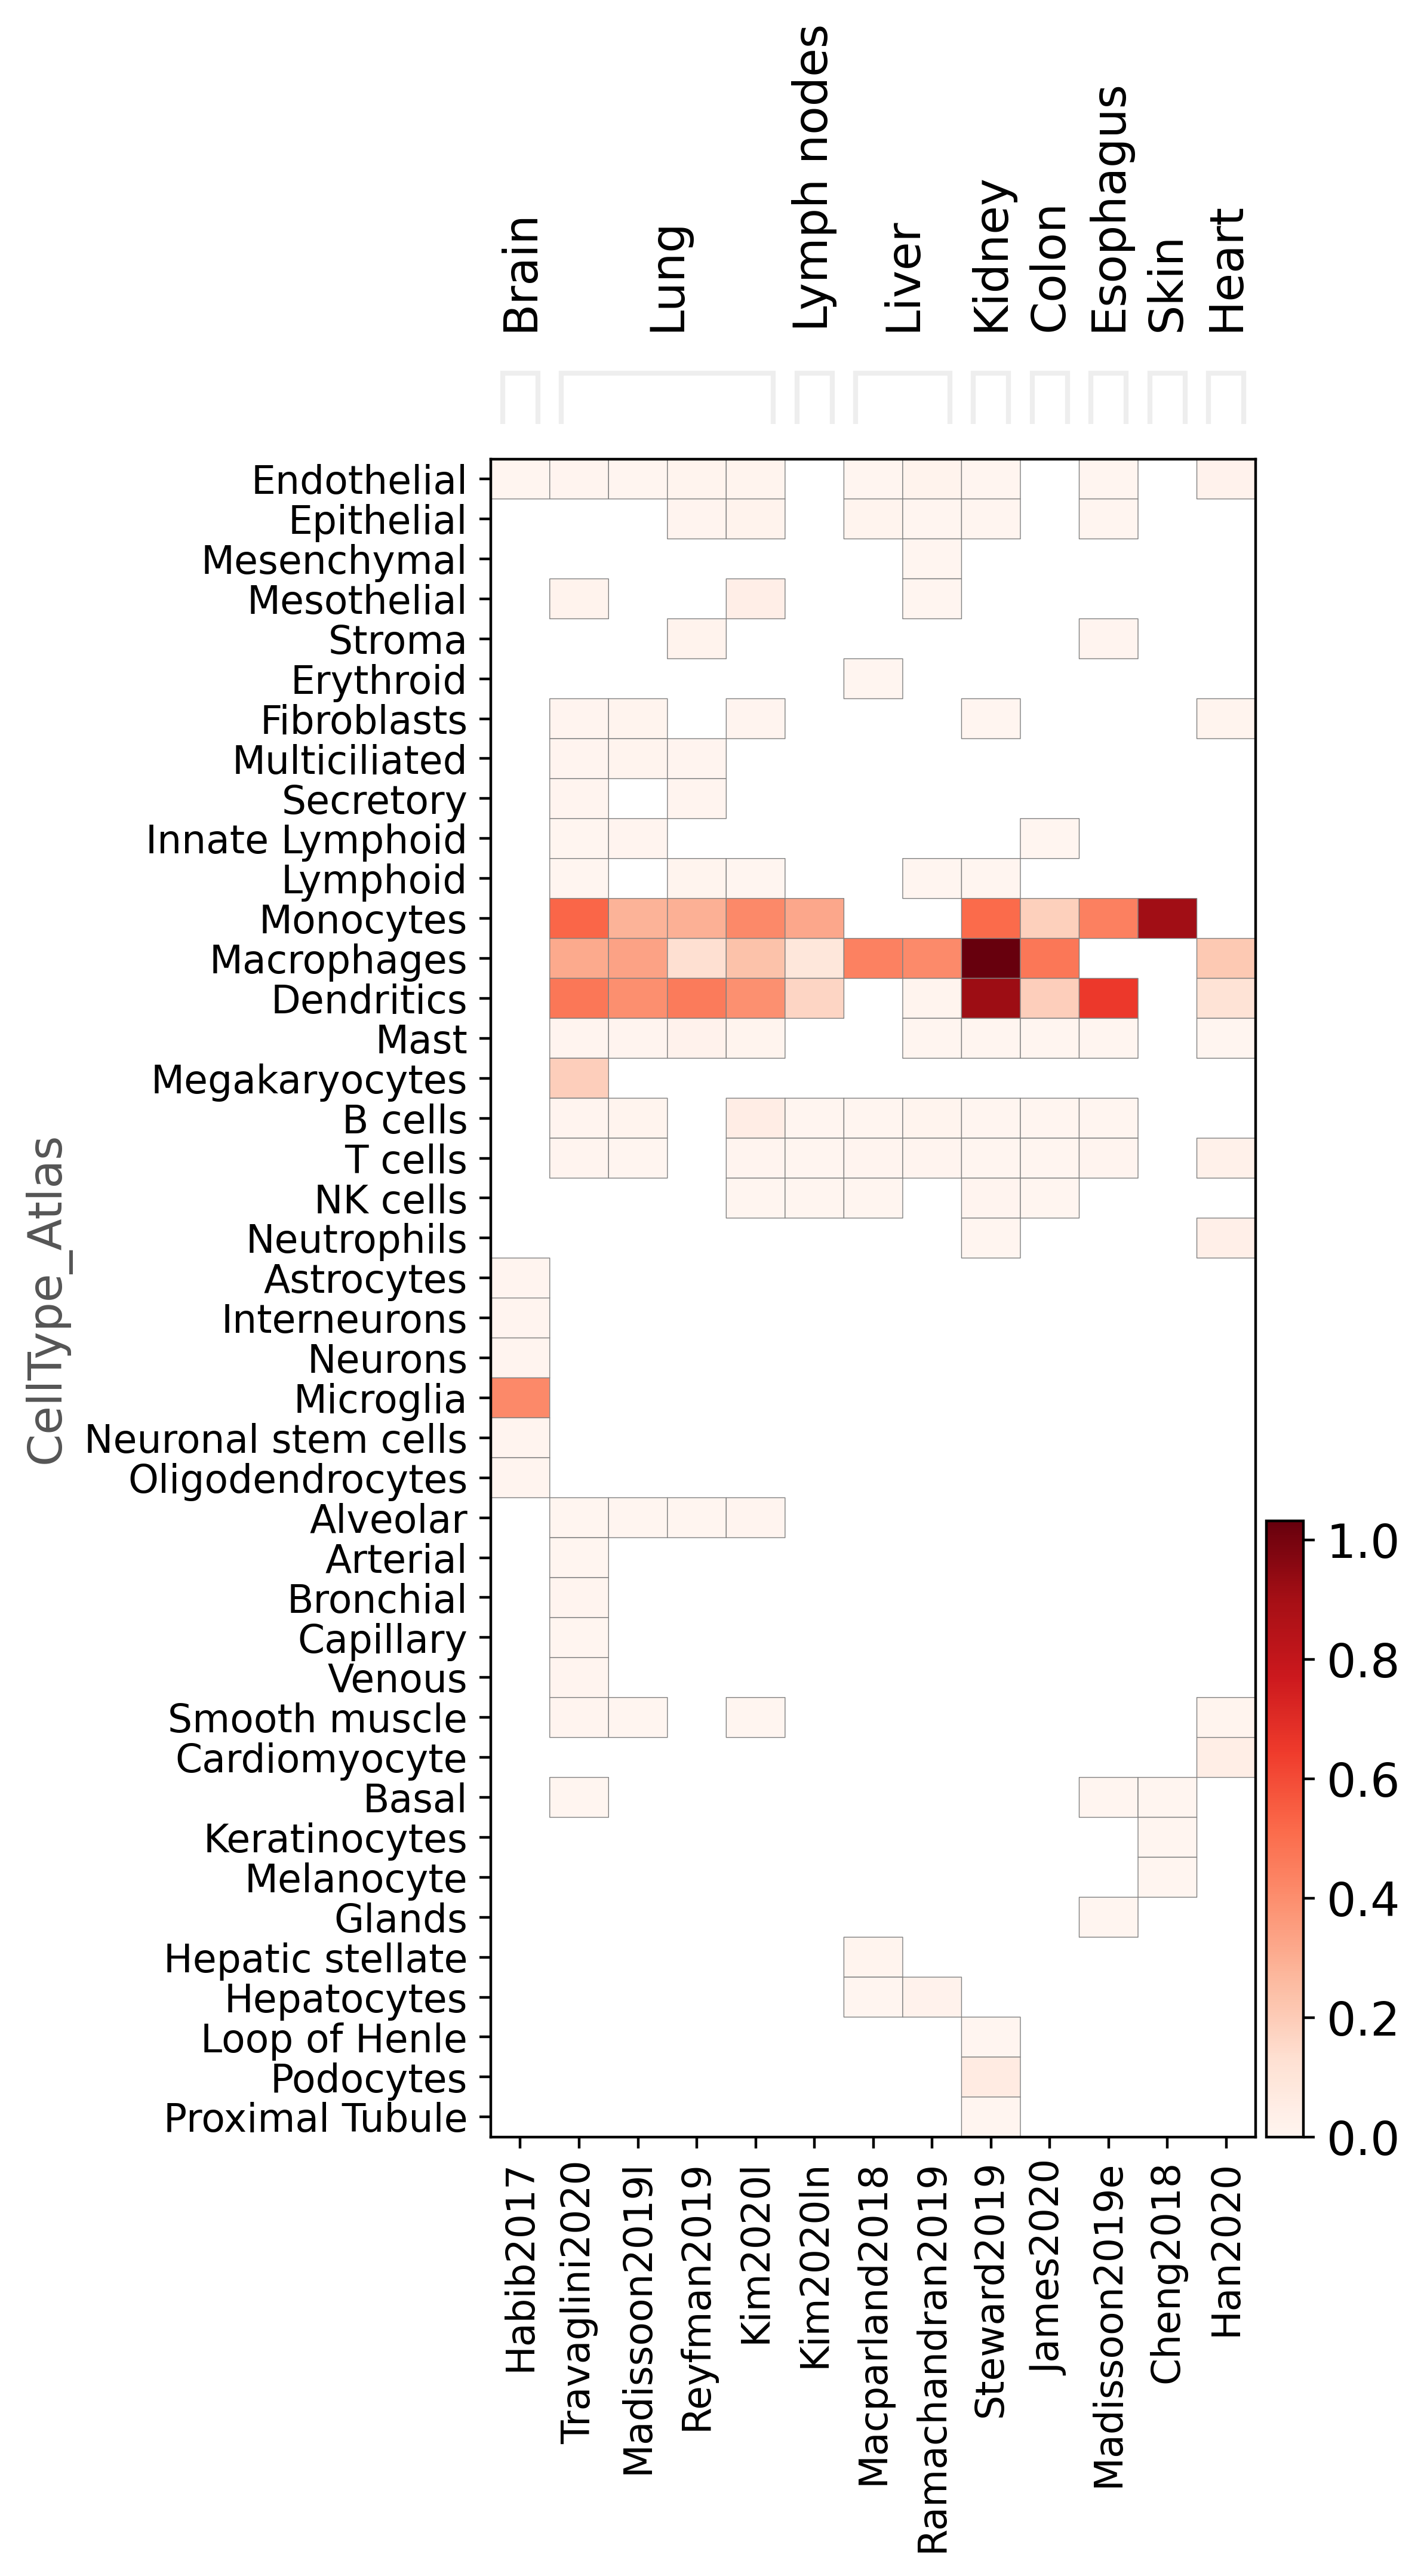

GridSpec(2, 3, height_ratios=[0.5, 10], width_ratios=[4.16, 0, 0.2])

In [31]:
labels=['Brain', 'Lung', 'Lymph nodes','Liver','Kidney','Colon','Esophagus','Skin','Heart']
positions=[(0, 0), (1, 4), (5,5), (6,7), (8,8),(9,9),(10,10),(11,11),(12,12)]
genelist = ['Habib2017', 'Travaglini2020', 'Madissoon2019l', 'Reyfman2019',
       'Kim2020l', 'Kim2020ln', 'Macparland2018', 'Ramachandran2019',
       'Steward2019', 'James2020', 'Madissoon2019e', 'Cheng2018', 'Han2020']

sc.pl.matrixplot(adata_all_datasets_nomouse, genelist, groupby='CellType_Atlas',
              var_group_positions=positions, 
              var_group_labels=labels, var_group_rotation=90)

## CD86

In [134]:
#read in all datasets and subset to only include CD86

#Brain
adata_habib=sc.read(writepath + 'habib2017_human_processed.h5ad')
adata_habib=adata_habib[:,'CD86'].copy()

print('Brain datasets complete')

#Lung
adata_travaglini=sc.read(writepath + 'travaglini2020_processed.h5ad')
adata_travaglini=adata_travaglini[:,'CD86'].copy()

adata_madissoon_lung=sc.read(writepath + 'madissoon2020_lung_processed.h5ad')
adata_madissoon_lung=adata_madissoon_lung[:,'CD86'].copy()

adata_reyfman=sc.read(writepath + 'reyfman2019_processed.h5ad')
adata_reyfman=adata_reyfman[:,'CD86'].copy()

adata_kim=sc.read(writepath + 'kim2020_lung_processed.h5ad')
adata_kim=adata_kim[:,'CD86'].copy()

print('Lung datasets complete')

#Lymph nodes
adata_kim_ln=sc.read(writepath + 'kim2020_lymphnodes_processed.h5ad')
adata_kim_ln=adata_kim_ln[:,'CD86'].copy()

print('Lymph nodes datasets complete')

#Liver
adata_macparland=sc.read(writepath + 'macparland2018_processed.h5ad')
adata_macparland=adata_macparland[:,'CD86'].copy()

adata_ramachandran=sc.read(writepath + 'ramachandran2019_processed.h5ad')
adata_ramachandran=adata_ramachandran[:,'CD86'].copy()

print('Liver datasets complete')

#Kidney
adata_steward=sc.read(writepath + 'steward2019_processed.h5ad')
adata_steward=adata_steward[:,'CD86'].copy()

print('Kidney datasets complete')

#Gut
adata_james=sc.read(writepath + 'james2020_processed.h5ad')
adata_james=adata_james[:,'CD86'].copy()

adata_madissoon_colon=sc.read(writepath + 'madissoon2019_colon_processed.h5ad')
adata_madissoon_colon=adata_madissoon_colon[:,'CD86'].copy()

print('Gut datasets complete')

#Skin
adata_cheng=sc.read(writepath + 'cheng2018_processed.h5ad')
adata_cheng=adata_cheng[:,'CD86'].copy()

print('Skin datasets complete')

#Heart
adata_han=sc.read(writepath + 'han2020_processed.h5ad')
adata_han=adata_han[:,'CD86'].copy()

print('Heart datasets complete')

Brain datasets complete
Lung datasets complete
Lymph nodes datasets complete
Liver datasets complete
Kidney datasets complete
Gut datasets complete
Skin datasets complete
Heart datasets complete


In [ ]:
# extract goi expression and append across datasets

In [135]:
#lets start with the first dataset - habib

In [136]:
adata_habib.X

<13067x1 sparse matrix of type '<class 'numpy.float32'>'
	with 25 stored elements in Compressed Sparse Row format>

In [137]:
adata_habib.X=sp.sparse.csr_matrix.todense(adata_habib.X)

In [138]:
matrix=adata_habib.X

In [139]:
newmatrix=pd.DataFrame(matrix)
newmatrix['Habib2017']=newmatrix[0]
del newmatrix[0]
newmatrix

Habib2017
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
...          ...
13062        0.0
13063        0.0
13064        0.0
13065        0.0
13066        0.0

[13067 rows x 1 columns]

In [140]:
adata_travaglini.X = adata_travaglini.X.todense()
adata_travaglini.X

matrix([[0.        ],
        [0.40550607],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]], dtype=float32)

In [141]:
newmatrix_tmp=pd.DataFrame(adata_travaglini.X)
newmatrix_tmp['Travaglini2020']=newmatrix_tmp[0]
del newmatrix_tmp[0]
newmatrix_tmp

Travaglini2020
0            0.000000
1            0.405506
2            0.000000
3            0.509848
4            0.000000
...               ...
60628        0.000000
60629        0.000000
60630        0.000000
60631        0.000000
60632        0.000000

[60633 rows x 1 columns]

In [142]:
len(newmatrix.index)

13067

In [143]:
len(newmatrix_tmp.index)

60633

In [144]:
#assign new index for newmatrix_peng_healthy
newmatrix_tmp.index=np.arange(start=len(newmatrix.index), 
                                 stop=len(newmatrix.index)+len(newmatrix_tmp.index), 
                                 step=1)

In [145]:
#merge these two properly
combinedmatrix=pd.concat([newmatrix, newmatrix_tmp], axis=1, sort=False)
combinedmatrix

Habib2017  Travaglini2020
0            0.0             NaN
1            0.0             NaN
2            0.0             NaN
3            0.0             NaN
4            0.0             NaN
...          ...             ...
73695        NaN             0.0
73696        NaN             0.0
73697        NaN             0.0
73698        NaN             0.0
73699        NaN             0.0

[73700 rows x 2 columns]

In [146]:
adata_madissoon_lung.X = adata_madissoon_lung.X.todense()
matrix=adata_madissoon_lung.X

In [147]:
newmatrix=pd.DataFrame(adata_madissoon_lung.X)
newmatrix['Madissoon2019_Lung']=newmatrix[0]
del newmatrix[0]
newmatrix

Madissoon2019_Lung
0                0.000000
1                0.000000
2                0.000000
3                0.000000
4                0.000000
...                   ...
56299            0.000000
56300            0.000000
56301            0.000000
56302            0.000000
56303            0.937849

[56304 rows x 1 columns]

In [148]:
len(combinedmatrix)

73700

In [149]:
len(newmatrix)

56304

In [150]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [151]:
newmatrix

Madissoon2019_Lung
73700             0.000000
73701             0.000000
73702             0.000000
73703             0.000000
73704             0.000000
...                    ...
129999            0.000000
130000            0.000000
130001            0.000000
130002            0.000000
130003            0.937849

[56304 rows x 1 columns]

In [152]:
combinedmatrix

Habib2017  Travaglini2020
0            0.0             NaN
1            0.0             NaN
2            0.0             NaN
3            0.0             NaN
4            0.0             NaN
...          ...             ...
73695        NaN             0.0
73696        NaN             0.0
73697        NaN             0.0
73698        NaN             0.0
73699        NaN             0.0

[73700 rows x 2 columns]

In [153]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung
0             0.0             NaN                 NaN
1             0.0             NaN                 NaN
2             0.0             NaN                 NaN
3             0.0             NaN                 NaN
4             0.0             NaN                 NaN
...           ...             ...                 ...
129999        NaN             NaN            0.000000
130000        NaN             NaN            0.000000
130001        NaN             NaN            0.000000
130002        NaN             NaN            0.000000
130003        NaN             NaN            0.937849

[130004 rows x 3 columns]

In [154]:
adata_reyfman.X = adata_reyfman.X.todense()
matrix=adata_reyfman.X

In [155]:
newmatrix=pd.DataFrame(adata_reyfman.X)
newmatrix['Reyfman2019']=newmatrix[0]
del newmatrix[0]
newmatrix

Reyfman2019
0         1.060953
1         0.000000
2         0.000000
3         0.265047
4         0.000000
...            ...
41498     0.000000
41499     0.000000
41500     1.266389
41501     0.000000
41502     0.000000

[41503 rows x 1 columns]

In [156]:
len(combinedmatrix)

130004

In [157]:
len(newmatrix)

41503

In [158]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [159]:
newmatrix

Reyfman2019
130004     1.060953
130005     0.000000
130006     0.000000
130007     0.265047
130008     0.000000
...             ...
171502     0.000000
171503     0.000000
171504     1.266389
171505     0.000000
171506     0.000000

[41503 rows x 1 columns]

In [160]:
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung
0             0.0             NaN                 NaN
1             0.0             NaN                 NaN
2             0.0             NaN                 NaN
3             0.0             NaN                 NaN
4             0.0             NaN                 NaN
...           ...             ...                 ...
129999        NaN             NaN            0.000000
130000        NaN             NaN            0.000000
130001        NaN             NaN            0.000000
130002        NaN             NaN            0.000000
130003        NaN             NaN            0.937849

[130004 rows x 3 columns]

In [161]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019
0             0.0             NaN                 NaN          NaN
1             0.0             NaN                 NaN          NaN
2             0.0             NaN                 NaN          NaN
3             0.0             NaN                 NaN          NaN
4             0.0             NaN                 NaN          NaN
...           ...             ...                 ...          ...
171502        NaN             NaN                 NaN     0.000000
171503        NaN             NaN                 NaN     0.000000
171504        NaN             NaN                 NaN     1.266389
171505        NaN             NaN                 NaN     0.000000
171506        NaN             NaN                 NaN     0.000000

[171507 rows x 4 columns]

In [162]:
#adata_kim.X = adata_kim.X.todense()
matrix=adata_kim.X

In [163]:
newmatrix=pd.DataFrame(adata_kim.X)
newmatrix['Kim2020_Lung']=newmatrix[0]
del newmatrix[0]
newmatrix

Kim2020_Lung
0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
...             ...
42990      0.000000
42991      0.000000
42992      0.000000
42993      0.647448
42994      0.000000

[42995 rows x 1 columns]

In [164]:
len(combinedmatrix)

171507

In [165]:
len(newmatrix)

42995

In [166]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [167]:
newmatrix

Kim2020_Lung
171507      0.000000
171508      0.000000
171509      0.000000
171510      0.000000
171511      0.000000
...              ...
214497      0.000000
214498      0.000000
214499      0.000000
214500      0.647448
214501      0.000000

[42995 rows x 1 columns]

In [168]:
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019
0             0.0             NaN                 NaN          NaN
1             0.0             NaN                 NaN          NaN
2             0.0             NaN                 NaN          NaN
3             0.0             NaN                 NaN          NaN
4             0.0             NaN                 NaN          NaN
...           ...             ...                 ...          ...
171502        NaN             NaN                 NaN     0.000000
171503        NaN             NaN                 NaN     0.000000
171504        NaN             NaN                 NaN     1.266389
171505        NaN             NaN                 NaN     0.000000
171506        NaN             NaN                 NaN     0.000000

[171507 rows x 4 columns]

In [169]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019  \
0             0.0             NaN                 NaN          NaN   
1             0.0             NaN                 NaN          NaN   
2             0.0             NaN                 NaN          NaN   
3             0.0             NaN                 NaN          NaN   
4             0.0             NaN                 NaN          NaN   
...           ...             ...                 ...          ...   
214497        NaN             NaN                 NaN          NaN   
214498        NaN             NaN                 NaN          NaN   
214499        NaN             NaN                 NaN          NaN   
214500        NaN             NaN                 NaN          NaN   
214501        NaN             NaN                 NaN          NaN   

        Kim2020_Lung  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
214497      0.000000  
214498      0.000000  
214499      0.000000  
214500      0.647448  
214501      0.000000  

[214502 rows x 5 columns]

In [170]:
#adata_kim_ln.X = adata_kim_ln.X.todense()
matrix=adata_kim_ln.X

In [171]:
newmatrix=pd.DataFrame(adata_kim_ln.X)
newmatrix['Kim2020_LymphNodes']=newmatrix[0]
del newmatrix[0]
newmatrix

Kim2020_LymphNodes
0                     0.0
1                     0.0
2                     0.0
3                     0.0
4                     0.0
...                   ...
37441                 0.0
37442                 0.0
37443                 0.0
37444                 0.0
37445                 0.0

[37446 rows x 1 columns]

In [172]:
len(combinedmatrix)

214502

In [173]:
len(newmatrix)

37446

In [174]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [175]:
newmatrix

Kim2020_LymphNodes
214502                 0.0
214503                 0.0
214504                 0.0
214505                 0.0
214506                 0.0
...                    ...
251943                 0.0
251944                 0.0
251945                 0.0
251946                 0.0
251947                 0.0

[37446 rows x 1 columns]

In [176]:
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019  \
0             0.0             NaN                 NaN          NaN   
1             0.0             NaN                 NaN          NaN   
2             0.0             NaN                 NaN          NaN   
3             0.0             NaN                 NaN          NaN   
4             0.0             NaN                 NaN          NaN   
...           ...             ...                 ...          ...   
214497        NaN             NaN                 NaN          NaN   
214498        NaN             NaN                 NaN          NaN   
214499        NaN             NaN                 NaN          NaN   
214500        NaN             NaN                 NaN          NaN   
214501        NaN             NaN                 NaN          NaN   

        Kim2020_Lung  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
214497      0.000000  
214498      0.000000  
214499      0.000000  
214500      0.647448  
214501      0.000000  

[214502 rows x 5 columns]

In [177]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019  \
0             0.0             NaN                 NaN          NaN   
1             0.0             NaN                 NaN          NaN   
2             0.0             NaN                 NaN          NaN   
3             0.0             NaN                 NaN          NaN   
4             0.0             NaN                 NaN          NaN   
...           ...             ...                 ...          ...   
251943        NaN             NaN                 NaN          NaN   
251944        NaN             NaN                 NaN          NaN   
251945        NaN             NaN                 NaN          NaN   
251946        NaN             NaN                 NaN          NaN   
251947        NaN             NaN                 NaN          NaN   

        Kim2020_Lung  Kim2020_LymphNodes  
0                NaN                 NaN  
1                NaN                 NaN  
2                NaN                 NaN  
3                NaN                 NaN  
4                NaN                 NaN  
...              ...                 ...  
251943           NaN                 0.0  
251944           NaN                 0.0  
251945           NaN                 0.0  
251946           NaN                 0.0  
251947           NaN                 0.0  

[251948 rows x 6 columns]

In [178]:
adata_macparland.X = adata_macparland.X.todense()
matrix=adata_macparland.X

In [179]:
newmatrix=pd.DataFrame(adata_macparland.X)
newmatrix['Macparland2018']=newmatrix[0]
del newmatrix[0]
newmatrix

Macparland2018
0                0.0
1                0.0
2                0.0
3                0.0
4                0.0
...              ...
6266             0.0
6267             0.0
6268             0.0
6269             0.0
6270             0.0

[6271 rows x 1 columns]

In [180]:
len(combinedmatrix)

251948

In [181]:
len(newmatrix)

6271

In [182]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [183]:
newmatrix

Macparland2018
251948             0.0
251949             0.0
251950             0.0
251951             0.0
251952             0.0
...                ...
258214             0.0
258215             0.0
258216             0.0
258217             0.0
258218             0.0

[6271 rows x 1 columns]

In [184]:
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019  \
0             0.0             NaN                 NaN          NaN   
1             0.0             NaN                 NaN          NaN   
2             0.0             NaN                 NaN          NaN   
3             0.0             NaN                 NaN          NaN   
4             0.0             NaN                 NaN          NaN   
...           ...             ...                 ...          ...   
251943        NaN             NaN                 NaN          NaN   
251944        NaN             NaN                 NaN          NaN   
251945        NaN             NaN                 NaN          NaN   
251946        NaN             NaN                 NaN          NaN   
251947        NaN             NaN                 NaN          NaN   

        Kim2020_Lung  Kim2020_LymphNodes  
0                NaN                 NaN  
1                NaN                 NaN  
2                NaN                 NaN  
3                NaN                 NaN  
4                NaN                 NaN  
...              ...                 ...  
251943           NaN                 0.0  
251944           NaN                 0.0  
251945           NaN                 0.0  
251946           NaN                 0.0  
251947           NaN                 0.0  

[251948 rows x 6 columns]

In [185]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019  \
0             0.0             NaN                 NaN          NaN   
1             0.0             NaN                 NaN          NaN   
2             0.0             NaN                 NaN          NaN   
3             0.0             NaN                 NaN          NaN   
4             0.0             NaN                 NaN          NaN   
...           ...             ...                 ...          ...   
258214        NaN             NaN                 NaN          NaN   
258215        NaN             NaN                 NaN          NaN   
258216        NaN             NaN                 NaN          NaN   
258217        NaN             NaN                 NaN          NaN   
258218        NaN             NaN                 NaN          NaN   

        Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  
0                NaN                 NaN             NaN  
1                NaN                 NaN             NaN  
2                NaN                 NaN             NaN  
3                NaN                 NaN             NaN  
4                NaN                 NaN             NaN  
...              ...                 ...             ...  
258214           NaN                 NaN             0.0  
258215           NaN                 NaN             0.0  
258216           NaN                 NaN             0.0  
258217           NaN                 NaN             0.0  
258218           NaN                 NaN             0.0  

[258219 rows x 7 columns]

In [186]:
adata_ramachandran.X = adata_ramachandran.X.todense()
matrix=adata_ramachandran.X

In [187]:
newmatrix=pd.DataFrame(adata_ramachandran.X)
newmatrix['Ramachandran2019']=newmatrix[0]
del newmatrix[0]
newmatrix

Ramachandran2019
0              0.000000
1              0.000000
2              0.659306
3              0.000000
4              0.000000
...                 ...
33032          0.000000
33033          0.000000
33034          0.240320
33035          0.000000
33036          0.216613

[33037 rows x 1 columns]

In [188]:
len(combinedmatrix)

258219

In [189]:
len(newmatrix)

33037

In [190]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [191]:
newmatrix

Ramachandran2019
258219          0.000000
258220          0.000000
258221          0.659306
258222          0.000000
258223          0.000000
...                  ...
291251          0.000000
291252          0.000000
291253          0.240320
291254          0.000000
291255          0.216613

[33037 rows x 1 columns]

In [192]:
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019  \
0             0.0             NaN                 NaN          NaN   
1             0.0             NaN                 NaN          NaN   
2             0.0             NaN                 NaN          NaN   
3             0.0             NaN                 NaN          NaN   
4             0.0             NaN                 NaN          NaN   
...           ...             ...                 ...          ...   
258214        NaN             NaN                 NaN          NaN   
258215        NaN             NaN                 NaN          NaN   
258216        NaN             NaN                 NaN          NaN   
258217        NaN             NaN                 NaN          NaN   
258218        NaN             NaN                 NaN          NaN   

        Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  
0                NaN                 NaN             NaN  
1                NaN                 NaN             NaN  
2                NaN                 NaN             NaN  
3                NaN                 NaN             NaN  
4                NaN                 NaN             NaN  
...              ...                 ...             ...  
258214           NaN                 NaN             0.0  
258215           NaN                 NaN             0.0  
258216           NaN                 NaN             0.0  
258217           NaN                 NaN             0.0  
258218           NaN                 NaN             0.0  

[258219 rows x 7 columns]

In [193]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019  \
0             0.0             NaN                 NaN          NaN   
1             0.0             NaN                 NaN          NaN   
2             0.0             NaN                 NaN          NaN   
3             0.0             NaN                 NaN          NaN   
4             0.0             NaN                 NaN          NaN   
...           ...             ...                 ...          ...   
291251        NaN             NaN                 NaN          NaN   
291252        NaN             NaN                 NaN          NaN   
291253        NaN             NaN                 NaN          NaN   
291254        NaN             NaN                 NaN          NaN   
291255        NaN             NaN                 NaN          NaN   

        Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  Ramachandran2019  
0                NaN                 NaN             NaN               NaN  
1                NaN                 NaN             NaN               NaN  
2                NaN                 NaN             NaN               NaN  
3                NaN                 NaN             NaN               NaN  
4                NaN                 NaN             NaN               NaN  
...              ...                 ...             ...               ...  
291251           NaN                 NaN             NaN          0.000000  
291252           NaN                 NaN             NaN          0.000000  
291253           NaN                 NaN             NaN          0.240320  
291254           NaN                 NaN             NaN          0.000000  
291255           NaN                 NaN             NaN          0.216613  

[291256 rows x 8 columns]

In [194]:
adata_steward.X = adata_steward.X.todense()
matrix=adata_steward.X

In [195]:
newmatrix=pd.DataFrame(adata_steward.X)
newmatrix['Steward2019']=newmatrix[0]
del newmatrix[0]
newmatrix

Steward2019
0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
...            ...
40263     0.000000
40264     0.000000
40265     0.000000
40266     0.000000
40267     1.246194

[40268 rows x 1 columns]

In [196]:
len(combinedmatrix)

291256

In [197]:
len(newmatrix)

40268

In [198]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [199]:
newmatrix

Steward2019
291256     0.000000
291257     0.000000
291258     0.000000
291259     0.000000
291260     0.000000
...             ...
331519     0.000000
331520     0.000000
331521     0.000000
331522     0.000000
331523     1.246194

[40268 rows x 1 columns]

In [200]:
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019  \
0             0.0             NaN                 NaN          NaN   
1             0.0             NaN                 NaN          NaN   
2             0.0             NaN                 NaN          NaN   
3             0.0             NaN                 NaN          NaN   
4             0.0             NaN                 NaN          NaN   
...           ...             ...                 ...          ...   
291251        NaN             NaN                 NaN          NaN   
291252        NaN             NaN                 NaN          NaN   
291253        NaN             NaN                 NaN          NaN   
291254        NaN             NaN                 NaN          NaN   
291255        NaN             NaN                 NaN          NaN   

        Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  Ramachandran2019  
0                NaN                 NaN             NaN               NaN  
1                NaN                 NaN             NaN               NaN  
2                NaN                 NaN             NaN               NaN  
3                NaN                 NaN             NaN               NaN  
4                NaN                 NaN             NaN               NaN  
...              ...                 ...             ...               ...  
291251           NaN                 NaN             NaN          0.000000  
291252           NaN                 NaN             NaN          0.000000  
291253           NaN                 NaN             NaN          0.240320  
291254           NaN                 NaN             NaN          0.000000  
291255           NaN                 NaN             NaN          0.216613  

[291256 rows x 8 columns]

In [201]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019  \
0             0.0             NaN                 NaN          NaN   
1             0.0             NaN                 NaN          NaN   
2             0.0             NaN                 NaN          NaN   
3             0.0             NaN                 NaN          NaN   
4             0.0             NaN                 NaN          NaN   
...           ...             ...                 ...          ...   
331519        NaN             NaN                 NaN          NaN   
331520        NaN             NaN                 NaN          NaN   
331521        NaN             NaN                 NaN          NaN   
331522        NaN             NaN                 NaN          NaN   
331523        NaN             NaN                 NaN          NaN   

        Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  Ramachandran2019  \
0                NaN                 NaN             NaN               NaN   
1                NaN                 NaN             NaN               NaN   
2                NaN                 NaN             NaN               NaN   
3                NaN                 NaN             NaN               NaN   
4                NaN                 NaN             NaN               NaN   
...              ...                 ...             ...               ...   
331519           NaN                 NaN             NaN               NaN   
331520           NaN                 NaN             NaN               NaN   
331521           NaN                 NaN             NaN               NaN   
331522           NaN                 NaN             NaN               NaN   
331523           NaN                 NaN             NaN               NaN   

        Steward2019  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
331519     0.000000  
331520     0.000000  
331521     0.000000  
331522     0.000000  
331523     1.246194  

[331524 rows x 9 columns]

In [202]:
adata_james.X = adata_james.X.todense()
matrix=adata_james.X

In [203]:
newmatrix=pd.DataFrame(adata_james.X)
newmatrix['James2020']=newmatrix[0]
del newmatrix[0]
newmatrix

James2020
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
...          ...
41317        0.0
41318        0.0
41319        0.0
41320        0.0
41321        0.0

[41322 rows x 1 columns]

In [204]:
len(combinedmatrix)

331524

In [205]:
len(newmatrix)

41322

In [206]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [207]:
newmatrix

James2020
331524        0.0
331525        0.0
331526        0.0
331527        0.0
331528        0.0
...           ...
372841        0.0
372842        0.0
372843        0.0
372844        0.0
372845        0.0

[41322 rows x 1 columns]

In [208]:
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019  \
0             0.0             NaN                 NaN          NaN   
1             0.0             NaN                 NaN          NaN   
2             0.0             NaN                 NaN          NaN   
3             0.0             NaN                 NaN          NaN   
4             0.0             NaN                 NaN          NaN   
...           ...             ...                 ...          ...   
331519        NaN             NaN                 NaN          NaN   
331520        NaN             NaN                 NaN          NaN   
331521        NaN             NaN                 NaN          NaN   
331522        NaN             NaN                 NaN          NaN   
331523        NaN             NaN                 NaN          NaN   

        Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  Ramachandran2019  \
0                NaN                 NaN             NaN               NaN   
1                NaN                 NaN             NaN               NaN   
2                NaN                 NaN             NaN               NaN   
3                NaN                 NaN             NaN               NaN   
4                NaN                 NaN             NaN               NaN   
...              ...                 ...             ...               ...   
331519           NaN                 NaN             NaN               NaN   
331520           NaN                 NaN             NaN               NaN   
331521           NaN                 NaN             NaN               NaN   
331522           NaN                 NaN             NaN               NaN   
331523           NaN                 NaN             NaN               NaN   

        Steward2019  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
331519     0.000000  
331520     0.000000  
331521     0.000000  
331522     0.000000  
331523     1.246194  

[331524 rows x 9 columns]

In [209]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019  \
0             0.0             NaN                 NaN          NaN   
1             0.0             NaN                 NaN          NaN   
2             0.0             NaN                 NaN          NaN   
3             0.0             NaN                 NaN          NaN   
4             0.0             NaN                 NaN          NaN   
...           ...             ...                 ...          ...   
372841        NaN             NaN                 NaN          NaN   
372842        NaN             NaN                 NaN          NaN   
372843        NaN             NaN                 NaN          NaN   
372844        NaN             NaN                 NaN          NaN   
372845        NaN             NaN                 NaN          NaN   

        Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  Ramachandran2019  \
0                NaN                 NaN             NaN               NaN   
1                NaN                 NaN             NaN               NaN   
2                NaN                 NaN             NaN               NaN   
3                NaN                 NaN             NaN               NaN   
4                NaN                 NaN             NaN               NaN   
...              ...                 ...             ...               ...   
372841           NaN                 NaN             NaN               NaN   
372842           NaN                 NaN             NaN               NaN   
372843           NaN                 NaN             NaN               NaN   
372844           NaN                 NaN             NaN               NaN   
372845           NaN                 NaN             NaN               NaN   

        Steward2019  James2020  
0               NaN        NaN  
1               NaN        NaN  
2               NaN        NaN  
3               NaN        NaN  
4               NaN        NaN  
...             ...        ...  
372841          NaN        0.0  
372842          NaN        0.0  
372843          NaN        0.0  
372844          NaN        0.0  
372845          NaN        0.0  

[372846 rows x 10 columns]

In [210]:
adata_madissoon_colon.X = adata_madissoon_colon.X.todense()
matrix=adata_madissoon_colon.X

In [211]:
newmatrix=pd.DataFrame(adata_madissoon_colon.X)
newmatrix['Madissoon2019_Colon']=newmatrix[0]
del newmatrix[0]
newmatrix

Madissoon2019_Colon
0                      0.0
1                      0.0
2                      0.0
3                      0.0
4                      0.0
...                    ...
87942                  0.0
87943                  0.0
87944                  0.0
87945                  0.0
87946                  0.0

[87947 rows x 1 columns]

In [212]:
len(combinedmatrix)

372846

In [213]:
len(newmatrix)

87947

In [214]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [215]:
newmatrix

Madissoon2019_Colon
372846                  0.0
372847                  0.0
372848                  0.0
372849                  0.0
372850                  0.0
...                     ...
460788                  0.0
460789                  0.0
460790                  0.0
460791                  0.0
460792                  0.0

[87947 rows x 1 columns]

In [216]:
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019  \
0             0.0             NaN                 NaN          NaN   
1             0.0             NaN                 NaN          NaN   
2             0.0             NaN                 NaN          NaN   
3             0.0             NaN                 NaN          NaN   
4             0.0             NaN                 NaN          NaN   
...           ...             ...                 ...          ...   
372841        NaN             NaN                 NaN          NaN   
372842        NaN             NaN                 NaN          NaN   
372843        NaN             NaN                 NaN          NaN   
372844        NaN             NaN                 NaN          NaN   
372845        NaN             NaN                 NaN          NaN   

        Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  Ramachandran2019  \
0                NaN                 NaN             NaN               NaN   
1                NaN                 NaN             NaN               NaN   
2                NaN                 NaN             NaN               NaN   
3                NaN                 NaN             NaN               NaN   
4                NaN                 NaN             NaN               NaN   
...              ...                 ...             ...               ...   
372841           NaN                 NaN             NaN               NaN   
372842           NaN                 NaN             NaN               NaN   
372843           NaN                 NaN             NaN               NaN   
372844           NaN                 NaN             NaN               NaN   
372845           NaN                 NaN             NaN               NaN   

        Steward2019  James2020  
0               NaN        NaN  
1               NaN        NaN  
2               NaN        NaN  
3               NaN        NaN  
4               NaN        NaN  
...             ...        ...  
372841          NaN        0.0  
372842          NaN        0.0  
372843          NaN        0.0  
372844          NaN        0.0  
372845          NaN        0.0  

[372846 rows x 10 columns]

In [217]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019  \
0             0.0             NaN                 NaN          NaN   
1             0.0             NaN                 NaN          NaN   
2             0.0             NaN                 NaN          NaN   
3             0.0             NaN                 NaN          NaN   
4             0.0             NaN                 NaN          NaN   
...           ...             ...                 ...          ...   
460788        NaN             NaN                 NaN          NaN   
460789        NaN             NaN                 NaN          NaN   
460790        NaN             NaN                 NaN          NaN   
460791        NaN             NaN                 NaN          NaN   
460792        NaN             NaN                 NaN          NaN   

        Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  Ramachandran2019  \
0                NaN                 NaN             NaN               NaN   
1                NaN                 NaN             NaN               NaN   
2                NaN                 NaN             NaN               NaN   
3                NaN                 NaN             NaN               NaN   
4                NaN                 NaN             NaN               NaN   
...              ...                 ...             ...               ...   
460788           NaN                 NaN             NaN               NaN   
460789           NaN                 NaN             NaN               NaN   
460790           NaN                 NaN             NaN               NaN   
460791           NaN                 NaN             NaN               NaN   
460792           NaN                 NaN             NaN               NaN   

        Steward2019  James2020  Madissoon2019_Colon  
0               NaN        NaN                  NaN  
1               NaN        NaN                  NaN  
2               NaN        NaN                  NaN  
3               NaN        NaN                  NaN  
4               NaN        NaN                  NaN  
...             ...        ...                  ...  
460788          NaN        NaN                  0.0  
460789          NaN        NaN                  0.0  
460790          NaN        NaN                  0.0  
460791          NaN        NaN                  0.0  
460792          NaN        NaN                  0.0  

[460793 rows x 11 columns]

In [218]:
adata_cheng.X = adata_cheng.X.todense()
matrix=adata_cheng.X

In [219]:
newmatrix=pd.DataFrame(adata_cheng.X)
newmatrix['Cheng2018']=newmatrix[0]
del newmatrix[0]
newmatrix

Cheng2018
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
...          ...
68031        0.0
68032        0.0
68033        0.0
68034        0.0
68035        0.0

[68036 rows x 1 columns]

In [220]:
len(combinedmatrix)

460793

In [221]:
len(newmatrix)

68036

In [222]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [223]:
newmatrix

Cheng2018
460793        0.0
460794        0.0
460795        0.0
460796        0.0
460797        0.0
...           ...
528824        0.0
528825        0.0
528826        0.0
528827        0.0
528828        0.0

[68036 rows x 1 columns]

In [224]:
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019  \
0             0.0             NaN                 NaN          NaN   
1             0.0             NaN                 NaN          NaN   
2             0.0             NaN                 NaN          NaN   
3             0.0             NaN                 NaN          NaN   
4             0.0             NaN                 NaN          NaN   
...           ...             ...                 ...          ...   
460788        NaN             NaN                 NaN          NaN   
460789        NaN             NaN                 NaN          NaN   
460790        NaN             NaN                 NaN          NaN   
460791        NaN             NaN                 NaN          NaN   
460792        NaN             NaN                 NaN          NaN   

        Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  Ramachandran2019  \
0                NaN                 NaN             NaN               NaN   
1                NaN                 NaN             NaN               NaN   
2                NaN                 NaN             NaN               NaN   
3                NaN                 NaN             NaN               NaN   
4                NaN                 NaN             NaN               NaN   
...              ...                 ...             ...               ...   
460788           NaN                 NaN             NaN               NaN   
460789           NaN                 NaN             NaN               NaN   
460790           NaN                 NaN             NaN               NaN   
460791           NaN                 NaN             NaN               NaN   
460792           NaN                 NaN             NaN               NaN   

        Steward2019  James2020  Madissoon2019_Colon  
0               NaN        NaN                  NaN  
1               NaN        NaN                  NaN  
2               NaN        NaN                  NaN  
3               NaN        NaN                  NaN  
4               NaN        NaN                  NaN  
...             ...        ...                  ...  
460788          NaN        NaN                  0.0  
460789          NaN        NaN                  0.0  
460790          NaN        NaN                  0.0  
460791          NaN        NaN                  0.0  
460792          NaN        NaN                  0.0  

[460793 rows x 11 columns]

In [225]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019  \
0             0.0             NaN                 NaN          NaN   
1             0.0             NaN                 NaN          NaN   
2             0.0             NaN                 NaN          NaN   
3             0.0             NaN                 NaN          NaN   
4             0.0             NaN                 NaN          NaN   
...           ...             ...                 ...          ...   
528824        NaN             NaN                 NaN          NaN   
528825        NaN             NaN                 NaN          NaN   
528826        NaN             NaN                 NaN          NaN   
528827        NaN             NaN                 NaN          NaN   
528828        NaN             NaN                 NaN          NaN   

        Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  Ramachandran2019  \
0                NaN                 NaN             NaN               NaN   
1                NaN                 NaN             NaN               NaN   
2                NaN                 NaN             NaN               NaN   
3                NaN                 NaN             NaN               NaN   
4                NaN                 NaN             NaN               NaN   
...              ...                 ...             ...               ...   
528824           NaN                 NaN             NaN               NaN   
528825           NaN                 NaN             NaN               NaN   
528826           NaN                 NaN             NaN               NaN   
528827           NaN                 NaN             NaN               NaN   
528828           NaN                 NaN             NaN               NaN   

        Steward2019  James2020  Madissoon2019_Colon  Cheng2018  
0               NaN        NaN                  NaN        NaN  
1               NaN        NaN                  NaN        NaN  
2               NaN        NaN                  NaN        NaN  
3               NaN        NaN                  NaN        NaN  
4               NaN        NaN                  NaN        NaN  
...             ...        ...                  ...        ...  
528824          NaN        NaN                  NaN        0.0  
528825          NaN        NaN                  NaN        0.0  
528826          NaN        NaN                  NaN        0.0  
528827          NaN        NaN                  NaN        0.0  
528828          NaN        NaN                  NaN        0.0  

[528829 rows x 12 columns]

In [226]:
adata_han.X = adata_han.X.todense()
matrix=adata_han.X

In [227]:
newmatrix=pd.DataFrame(adata_han.X)
newmatrix['Han2020']=newmatrix[0]
del newmatrix[0]
newmatrix

Han2020
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
...       ...
2748      0.0
2749      0.0
2750      0.0
2751      0.0
2752      0.0

[2753 rows x 1 columns]

In [228]:
len(combinedmatrix)

528829

In [229]:
len(newmatrix)

2753

In [230]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [231]:
newmatrix

Han2020
528829      0.0
528830      0.0
528831      0.0
528832      0.0
528833      0.0
...         ...
531577      0.0
531578      0.0
531579      0.0
531580      0.0
531581      0.0

[2753 rows x 1 columns]

In [232]:
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019  \
0             0.0             NaN                 NaN          NaN   
1             0.0             NaN                 NaN          NaN   
2             0.0             NaN                 NaN          NaN   
3             0.0             NaN                 NaN          NaN   
4             0.0             NaN                 NaN          NaN   
...           ...             ...                 ...          ...   
528824        NaN             NaN                 NaN          NaN   
528825        NaN             NaN                 NaN          NaN   
528826        NaN             NaN                 NaN          NaN   
528827        NaN             NaN                 NaN          NaN   
528828        NaN             NaN                 NaN          NaN   

        Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  Ramachandran2019  \
0                NaN                 NaN             NaN               NaN   
1                NaN                 NaN             NaN               NaN   
2                NaN                 NaN             NaN               NaN   
3                NaN                 NaN             NaN               NaN   
4                NaN                 NaN             NaN               NaN   
...              ...                 ...             ...               ...   
528824           NaN                 NaN             NaN               NaN   
528825           NaN                 NaN             NaN               NaN   
528826           NaN                 NaN             NaN               NaN   
528827           NaN                 NaN             NaN               NaN   
528828           NaN                 NaN             NaN               NaN   

        Steward2019  James2020  Madissoon2019_Colon  Cheng2018  
0               NaN        NaN                  NaN        NaN  
1               NaN        NaN                  NaN        NaN  
2               NaN        NaN                  NaN        NaN  
3               NaN        NaN                  NaN        NaN  
4               NaN        NaN                  NaN        NaN  
...             ...        ...                  ...        ...  
528824          NaN        NaN                  NaN        0.0  
528825          NaN        NaN                  NaN        0.0  
528826          NaN        NaN                  NaN        0.0  
528827          NaN        NaN                  NaN        0.0  
528828          NaN        NaN                  NaN        0.0  

[528829 rows x 12 columns]

In [233]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019  \
0             0.0             NaN                 NaN          NaN   
1             0.0             NaN                 NaN          NaN   
2             0.0             NaN                 NaN          NaN   
3             0.0             NaN                 NaN          NaN   
4             0.0             NaN                 NaN          NaN   
...           ...             ...                 ...          ...   
531577        NaN             NaN                 NaN          NaN   
531578        NaN             NaN                 NaN          NaN   
531579        NaN             NaN                 NaN          NaN   
531580        NaN             NaN                 NaN          NaN   
531581        NaN             NaN                 NaN          NaN   

        Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  Ramachandran2019  \
0                NaN                 NaN             NaN               NaN   
1                NaN                 NaN             NaN               NaN   
2                NaN                 NaN             NaN               NaN   
3                NaN                 NaN             NaN               NaN   
4                NaN                 NaN             NaN               NaN   
...              ...                 ...             ...               ...   
531577           NaN                 NaN             NaN               NaN   
531578           NaN                 NaN             NaN               NaN   
531579           NaN                 NaN             NaN               NaN   
531580           NaN                 NaN             NaN               NaN   
531581           NaN                 NaN             NaN               NaN   

        Steward2019  James2020  Madissoon2019_Colon  Cheng2018  Han2020  
0               NaN        NaN                  NaN        NaN      NaN  
1               NaN        NaN                  NaN        NaN      NaN  
2               NaN        NaN                  NaN        NaN      NaN  
3               NaN        NaN                  NaN        NaN      NaN  
4               NaN        NaN                  NaN        NaN      NaN  
...             ...        ...                  ...        ...      ...  
531577          NaN        NaN                  NaN        NaN      0.0  
531578          NaN        NaN                  NaN        NaN      0.0  
531579          NaN        NaN                  NaN        NaN      0.0  
531580          NaN        NaN                  NaN        NaN      0.0  
531581          NaN        NaN                  NaN        NaN      0.0  

[531582 rows x 13 columns]

In [234]:
combinedmatrix.columns

Index(['Habib2017', 'Travaglini2020', 'Madissoon2019_Lung', 'Reyfman2019',
       'Kim2020_Lung', 'Kim2020_LymphNodes', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020', 'Madissoon2019_Colon',
       'Cheng2018', 'Han2020'],
      dtype='object')

In [235]:
combinedmatrix.columns=['Habib2017', 'Travaglini2020', 'Madissoon2019_Lung',
       'Reyfman2019', 'Kim2020_Lung', 'Kim2020_LymphNodes', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020', 'Madissoon2019_Esophagus',
       'Cheng2018', 'Han2020']

In [236]:
combinedmatrix

Habib2017  Travaglini2020  Madissoon2019_Lung  Reyfman2019  \
0             0.0             NaN                 NaN          NaN   
1             0.0             NaN                 NaN          NaN   
2             0.0             NaN                 NaN          NaN   
3             0.0             NaN                 NaN          NaN   
4             0.0             NaN                 NaN          NaN   
...           ...             ...                 ...          ...   
531577        NaN             NaN                 NaN          NaN   
531578        NaN             NaN                 NaN          NaN   
531579        NaN             NaN                 NaN          NaN   
531580        NaN             NaN                 NaN          NaN   
531581        NaN             NaN                 NaN          NaN   

        Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  Ramachandran2019  \
0                NaN                 NaN             NaN               NaN   
1                NaN                 NaN             NaN               NaN   
2                NaN                 NaN             NaN               NaN   
3                NaN                 NaN             NaN               NaN   
4                NaN                 NaN             NaN               NaN   
...              ...                 ...             ...               ...   
531577           NaN                 NaN             NaN               NaN   
531578           NaN                 NaN             NaN               NaN   
531579           NaN                 NaN             NaN               NaN   
531580           NaN                 NaN             NaN               NaN   
531581           NaN                 NaN             NaN               NaN   

        Steward2019  James2020  Madissoon2019_Esophagus  Cheng2018  Han2020  
0               NaN        NaN                      NaN        NaN      NaN  
1               NaN        NaN                      NaN        NaN      NaN  
2               NaN        NaN                      NaN        NaN      NaN  
3               NaN        NaN                      NaN        NaN      NaN  
4               NaN        NaN                      NaN        NaN      NaN  
...             ...        ...                      ...        ...      ...  
531577          NaN        NaN                      NaN        NaN      0.0  
531578          NaN        NaN                      NaN        NaN      0.0  
531579          NaN        NaN                      NaN        NaN      0.0  
531580          NaN        NaN                      NaN        NaN      0.0  
531581          NaN        NaN                      NaN        NaN      0.0  

[531582 rows x 13 columns]

In [238]:
#531582 cells over 13 datasets

In [239]:
import anndata

In [240]:
# Create AnnData object out of this combinedmatrix

adata_all_datasets=anndata.AnnData(X=combinedmatrix)


Transforming to str index.


In [241]:
adata_all_datasets

AnnData object with n_obs × n_vars = 531582 × 13 

In [242]:
#Concatenate 
adata_combined = adata_habib.concatenate(adata_travaglini, adata_madissoon_lung, adata_reyfman,
                                         adata_kim, adata_kim_ln, adata_macparland, adata_ramachandran, 
                                         adata_steward, adata_james, adata_madissoon_colon, adata_cheng, adata_han,
                                         batch_key='dataset',
                                         batch_categories=['Habib2017', 'Travaglini2020', 'Madissoon2019_Lung',
       'Reyfman2019', 'Kim2020_Lung', 'Kim2020_LymphNodes', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020', 'Madissoon2019_Esophagus',
       'Cheng2018', 'Han2020'])

layers are inconsistent - only layers that are shared among all AnnData objects are included.
/opt/python/lib/python3.7/site-packages/anndata/_core/anndata.py:1880: UserWarning: Only some adata objects have `.raw` attribute, not concatenating `.raw` attributes.
  UserWarning,


In [243]:
#del adata_combined.obs['BCR_SEQUENCE_ID']
#del adata_combined.obs['BCR_CLONE']
#del adata_combined.obs['BCR_ChainCombination']
#del adata_combined.obs['BCR_ISOTYPE']
#del adata_combined.obs['BCR_PANDONOR_CLONE']
#del adata_combined.obs['CellType']
#del adata_combined.obs['Celltypes']
#del adata_combined.obs['Cluster']
#del adata_combined.obs['Donor']
del adata_combined.obs['IGH_D_CALL']
del adata_combined.obs['IGH_J_CALL']
del adata_combined.obs['IGH_V_CALL_GENOTYPED']
del adata_combined.obs['IGL_C_Gene']
del adata_combined.obs['IGL_VDJ_Gene']
del adata_combined.obs['Re-annotation']
del adata_combined.obs['TCR_Clone']
del adata_combined.obs['TCR_c_gene']
del adata_combined.obs['TCR_cdr3']
del adata_combined.obs['TCR_cdr3_nt']
del adata_combined.obs['TCR_d_gene']
del adata_combined.obs['TCR_j_gene']
del adata_combined.obs['TCR_v_gene']
del adata_combined.obs['Time']
del adata_combined.obs['aetiology']
del adata_combined.obs['ann_level_1']
del adata_combined.obs['ann_level_2']
del adata_combined.obs['ann_level_3']
del adata_combined.obs['annotation_indepth']
del adata_combined.obs['annotation_lineage']
del adata_combined.obs['annotation_original']
del adata_combined.obs['broad_celltype']
del adata_combined.obs['cell subtype']
del adata_combined.obs['cell type']
del adata_combined.obs['cell type refined']
del adata_combined.obs['cell_ontology_class']
del adata_combined.obs['cell_ontology_class_broad']
del adata_combined.obs['cell_ontology_id']
del adata_combined.obs['cell_type']
del adata_combined.obs['celltype']
del adata_combined.obs['celltype_global']
del adata_combined.obs['celltype_specific']
del adata_combined.obs['compartment']
#del adata_combined.obs['celltype_global']
del adata_combined.obs['condition']
del adata_combined.obs['donor']
del adata_combined.obs['donor_time']
del adata_combined.obs['healthy']
del adata_combined.obs['ident']
del adata_combined.obs['last_author/PI']
del adata_combined.obs['leiden']
del adata_combined.obs['liver']
del adata_combined.obs['organ']
del adata_combined.obs['origin']
del adata_combined.obs['original_celltype_ann']
del adata_combined.obs['patient']
del adata_combined.obs['region']
del adata_combined.obs['sample']
del adata_combined.obs['state_exact']
del adata_combined.obs['tissue']

In [244]:
adata_combined.strings_to_categoricals()

... storing 'BCR_CLONE' as categorical
... storing 'BCR_ChainCombination' as categorical
... storing 'BCR_ISOTYPE' as categorical
... storing 'BCR_PANDONOR_CLONE' as categorical
... storing 'BCR_SEQUENCE_ID' as categorical
... storing 'CellType' as categorical
... storing 'CellType_Atlas' as categorical
... storing 'Celltypes' as categorical
... storing 'Donor' as categorical


In [245]:
adata_combined.obs['CellType_Atlas'].cat.categories

Index(['Alveolar', 'Arterial', 'Astrocytes', 'B cells', 'Basal', 'Bronchial',
       'Capillary', 'Cardiomyocyte', 'Dendritics', 'Endothelial', 'Epithelial',
       'Erythroid', 'Fibroblasts', 'Glands', 'Hepatic stellate', 'Hepatocytes',
       'Innate Lymphoid', 'Interneurons', 'Keratinocytes', 'Loop of Henle',
       'Lymphoid', 'Macrophages', 'Mast', 'Megakaryocytes', 'Melanocyte',
       'Mesenchymal', 'Mesothelial', 'Microglia', 'Monocytes', 'Multiciliated',
       'NK cells', 'Neuronal stem cells', 'Neurons', 'Neutrophils',
       'Oligodendrocytes', 'Podocytes', 'Proximal Tubule', 'Remove',
       'Secretory', 'Smooth muscle', 'Stroma', 'T cells', 'Unknown', 'Venous'],
      dtype='object')

In [246]:
len(adata_combined)

531582

In [247]:
# Read in cell identity as barcodes
adata_all_datasets.obs['CellType_Atlas']=adata_combined.obs['CellType_Atlas'].values.copy()
adata_all_datasets.obs

CellType_Atlas
0             Neurons
1             Neurons
2          Astrocytes
3             Neurons
4             Neurons
...               ...
531577           Mast
531578           Mast
531579           Mast
531580           Mast
531581           Mast

[531582 rows x 1 columns]

In [248]:
adata_all_datasets.obs['CellType_Atlas'].cat.categories

Index(['Alveolar', 'Arterial', 'Astrocytes', 'B cells', 'Basal', 'Bronchial',
       'Capillary', 'Cardiomyocyte', 'Dendritics', 'Endothelial', 'Epithelial',
       'Erythroid', 'Fibroblasts', 'Glands', 'Hepatic stellate', 'Hepatocytes',
       'Innate Lymphoid', 'Interneurons', 'Keratinocytes', 'Loop of Henle',
       'Lymphoid', 'Macrophages', 'Mast', 'Megakaryocytes', 'Melanocyte',
       'Mesenchymal', 'Mesothelial', 'Microglia', 'Monocytes', 'Multiciliated',
       'NK cells', 'Neuronal stem cells', 'Neurons', 'Neutrophils',
       'Oligodendrocytes', 'Podocytes', 'Proximal Tubule', 'Remove',
       'Secretory', 'Smooth muscle', 'Stroma', 'T cells', 'Unknown', 'Venous'],
      dtype='object')

In [6]:
# Remove "Unknown" and "Remove" Cluster

In [7]:
ix=np.isin(adata_all_datasets.obs['CellType_Atlas'],['Alveolar', 'Arterial', 'Astrocytes', 'B cells', 'Basal', 'Bronchial',
       'Capillary', 'Cardiomyocyte', 'Dendritics', 'Endothelial', 'Epithelial',
       'Erythroid', 'Fibroblasts', 'Glands', 'Hepatic stellate', 'Hepatocytes',
       'Innate Lymphoid', 'Interneurons', 'Keratinocytes', 'Loop of Henle',
       'Lymphoid', 'Macrophages', 'Mast', 'Megakaryocytes', 'Melanocyte',
       'Mesenchymal', 'Mesothelial', 'Microglia', 'Monocytes', 'Multiciliated',
       'NK cells', 'Neuronal stem cells', 'Neurons', 'Neutrophils',
       'Oligodendrocytes', 'Podocytes', 'Proximal Tubule',
       'Secretory', 'Smooth muscle', 'Stroma', 'T cells',  'Venous']) 
adata_all_datasets=adata_all_datasets[ix].copy()

In [11]:
adata_all_datasets.strings_to_categoricals()

In [15]:
adata_all_datasets.var.index

Index(['Habib2017', 'Travaglini2020', 'Madissoon2019_Lung', 'Reyfman2019',
       'Kim2020_Lung', 'Kim2020_LymphNodes', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020',
       'Madissoon2019_Esophagus', 'Cheng2018', 'Han2020'],
      dtype='object')

In [18]:
adata_all_datasets.var.index=['Habib2017', 'Travaglini2020', 'Madissoon2019l', 'Reyfman2019',
       'Kim2020l', 'Kim2020ln', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020',
       'Madissoon2019e', 'Cheng2018', 'Han2020']

In [14]:
# reorder categories

In [16]:
order = ('Endothelial', 'Epithelial', 'Mesenchymal', 'Mesothelial','Stroma','Erythroid', 'Fibroblasts', 
         'Multiciliated','Secretory',
         'Innate Lymphoid', 'Lymphoid','Monocytes','Macrophages',
         'Dendritics', 'Mast', 'Megakaryocytes','B cells', 'T cells','NK cells','Neutrophils',
         'Astrocytes', 'Interneurons',  'Neurons', 'Microglia', 'Neuronal stem cells', 'Oligodendrocytes',
         'Alveolar', 'Arterial','Bronchial','Capillary', 'Venous','Smooth muscle','Cardiomyocyte','Basal', 
         'Keratinocytes', 'Melanocyte','Glands', 'Hepatic stellate', 'Hepatocytes','Loop of Henle', 'Podocytes',
         'Proximal Tubule')

adata_all_datasets.obs['CellType_Atlas']=adata_all_datasets.obs['CellType_Atlas'].cat.reorder_categories(list(order), 
                                                                                                         ordered=True)

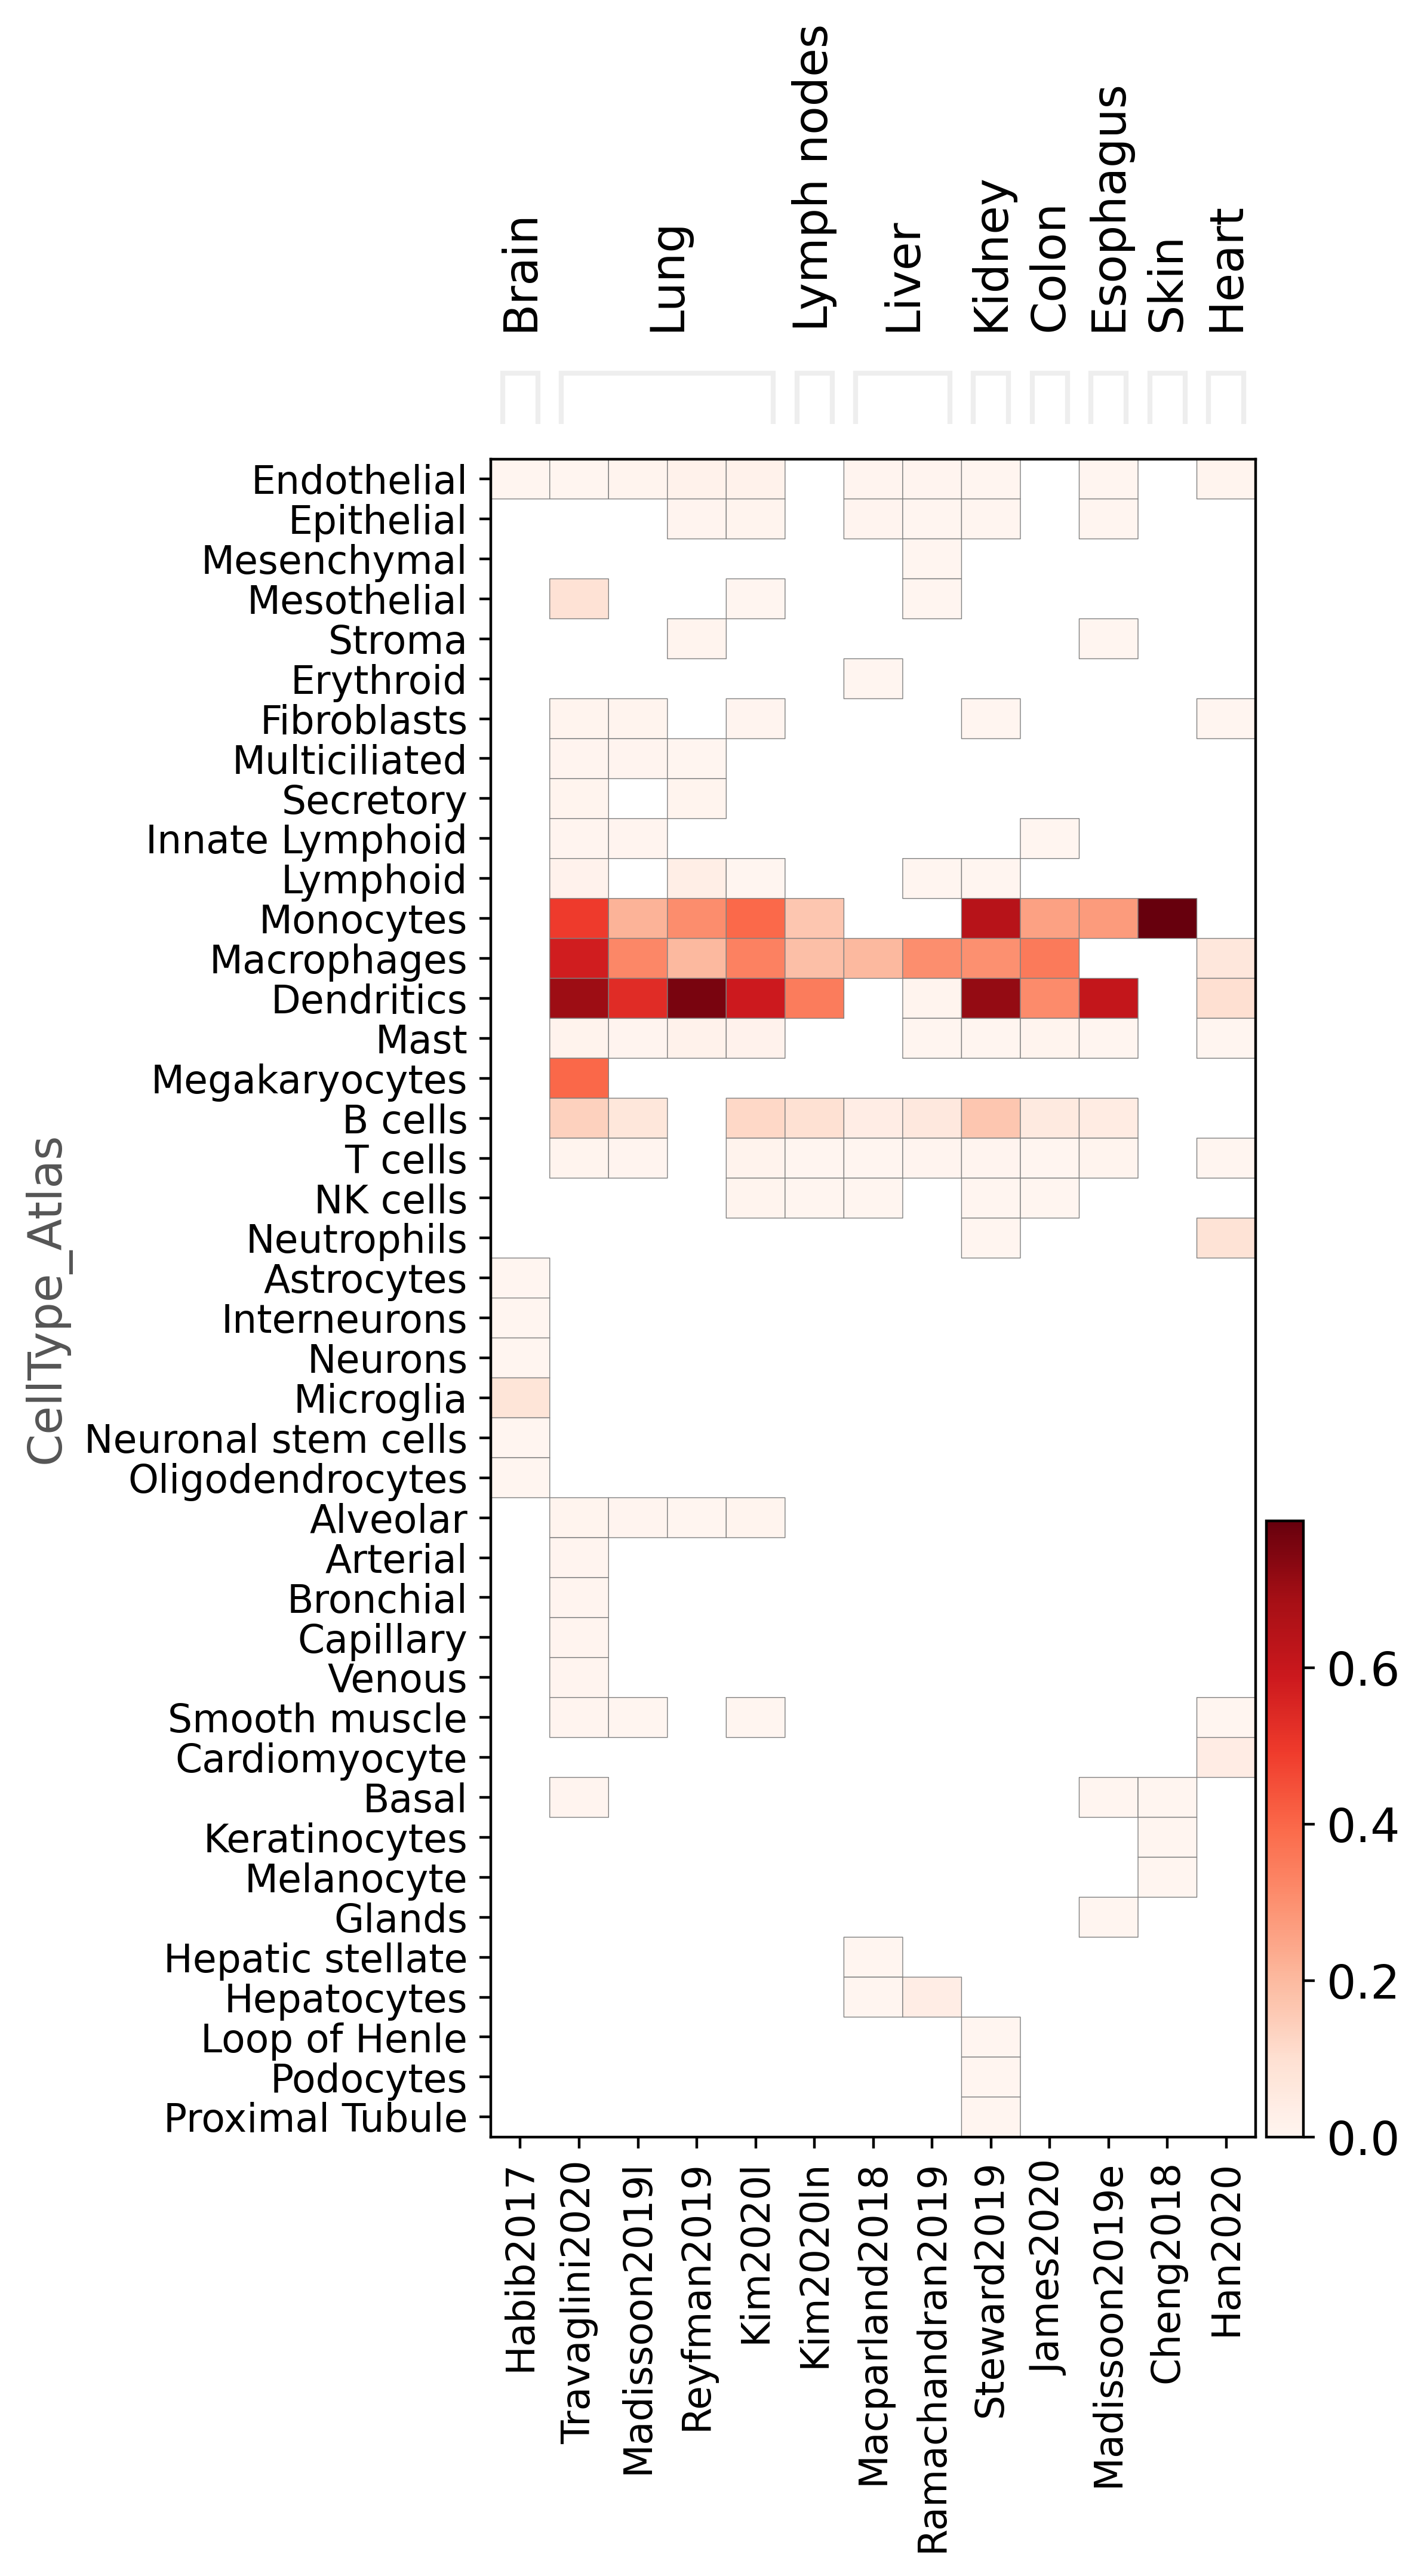

GridSpec(2, 3, height_ratios=[0.5, 10], width_ratios=[4.16, 0, 0.2])

In [19]:
labels=['Brain', 'Lung', 'Lymph nodes','Liver','Kidney','Colon','Esophagus','Skin','Heart']
positions=[(0, 0), (1, 4), (5,5), (6,7), (8,8),(9,9),(10,10),(11,11),(12,12)]
genelist = ['Habib2017', 'Travaglini2020', 'Madissoon2019l',
       'Reyfman2019', 'Kim2020l', 'Kim2020ln', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020',
       'Madissoon2019e', 'Cheng2018', 'Han2020']

sc.pl.matrixplot(adata_all_datasets, genelist, groupby='CellType_Atlas',
              var_group_positions=positions, 
              var_group_labels=labels, var_group_rotation=90)

## CD123

In [6]:
#read in all datasets and subset to only include CD123

#Brain
adata_habib=sc.read(writepath + 'habib2017_human_processed.h5ad')
adata_habib=adata_habib[:,'IL3RA'].copy()

adata_habib_mouse=sc.read(writepath + 'habib2017_mouse_processed.h5ad')
adata_habib_mouse=adata_habib[:,'Il3ra'].copy()

print('Brain datasets complete')

#Lung
adata_travaglini=sc.read(writepath + 'travaglini2020_processed.h5ad')
adata_travaglini=adata_travaglini[:,'IL3RA'].copy()

adata_madissoon_lung=sc.read(writepath + 'madissoon2020_lung_processed.h5ad')
adata_madissoon_lung=adata_madissoon_lung[:,'IL3RA'].copy()

adata_reyfman=sc.read(writepath + 'reyfman2019_processed.h5ad')
adata_reyfman=adata_reyfman[:,'IL3RA'].copy()

adata_kim=sc.read(writepath + 'kim2020_lung_processed.h5ad')
adata_kim=adata_kim[:,'IL3RA'].copy()

print('Lung datasets complete')

#Lymph nodes
adata_kim_ln=sc.read(writepath + 'kim2020_lymphnodes_processed.h5ad')
adata_kim_ln=adata_kim_ln[:,'IL3RA'].copy()

print('Lymph nodes datasets complete')

#Liver
adata_macparland=sc.read(writepath + 'macparland2018_processed.h5ad')
adata_macparland=adata_macparland[:,'IL3RA'].copy()

adata_ramachandran=sc.read(writepath + 'ramachandran2019_processed.h5ad')
adata_ramachandran=adata_ramachandran[:,'IL3RA'].copy()

print('Liver datasets complete')

#Kidney
adata_steward=sc.read(writepath + 'steward2019_processed.h5ad')
adata_steward=adata_steward[:,'IL3RA'].copy()

print('Kidney datasets complete')

#Gut
adata_james=sc.read(writepath + 'james2020_processed.h5ad')
adata_james=adata_james[:,'IL3RA'].copy()

adata_madissoon_colon=sc.read(writepath + 'madissoon2019_colon_processed.h5ad')
adata_madissoon_colon=adata_madissoon_colon[:,'IL3RA'].copy()

print('Gut datasets complete')

#Skin
adata_cheng=sc.read(writepath + 'cheng2018_processed.h5ad')
adata_cheng=adata_cheng[:,'IL3RA'].copy()

print('Skin datasets complete')

#Heart
adata_han=sc.read(writepath + 'han2020_processed.h5ad')
adata_han=adata_han[:,'IL3RA'].copy()

print('Heart datasets complete')

Brain datasets complete
Lung datasets complete
Lymph nodes datasets complete
Liver datasets complete
Kidney datasets complete
Gut datasets complete
Skin datasets complete
Heart datasets complete


In [ ]:
# extract goi expression and append across datasets

In [7]:
#lets start with the first dataset - habib

In [8]:
adata_habib.X

<13067x1 sparse matrix of type '<class 'numpy.float32'>'
	with 49 stored elements in Compressed Sparse Row format>

In [9]:
adata_habib.X=sp.sparse.csr_matrix.todense(adata_habib.X)

In [36]:
adata_habib.X

matrix([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], dtype=float32)

In [37]:
matrix=adata_habib.X

In [38]:
newmatrix=pd.DataFrame(matrix)
newmatrix['Habib2017']=newmatrix[0]
del newmatrix[0]
newmatrix

Habib2017
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
...          ...
13062        0.0
13063        0.0
13064        0.0
13065        0.0
13066        0.0

[13067 rows x 1 columns]

In [13]:
adata_habib_mouse.X

<13182x1 sparse matrix of type '<class 'numpy.float32'>'
	with 84 stored elements in Compressed Sparse Row format>

In [14]:
adata_habib_mouse.X=sp.sparse.csr_matrix.todense(adata_habib_mouse.X)

In [39]:
newmatrix_tmp=pd.DataFrame(adata_habib_mouse.X)
newmatrix_tmp['Habib2017_mouse']=newmatrix_tmp[0]
del newmatrix_tmp[0]
newmatrix_tmp

Habib2017_mouse
0                  0.0
1                  0.0
2                  0.0
3                  0.0
4                  0.0
...                ...
13177              0.0
13178              0.0
13179              0.0
13180              0.0
13181              0.0

[13182 rows x 1 columns]

In [40]:
len(newmatrix.index)

13067

In [41]:
len(newmatrix_tmp.index)

13182

In [42]:
#assign new index for newmatrix_peng_healthy
newmatrix_tmp.index=np.arange(start=len(newmatrix.index), 
                                 stop=len(newmatrix.index)+len(newmatrix_tmp.index), 
                                 step=1)

In [43]:
#merge these two properly
combinedmatrix=pd.concat([newmatrix, newmatrix_tmp], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse
0            0.0              NaN
1            0.0              NaN
2            0.0              NaN
3            0.0              NaN
4            0.0              NaN
...          ...              ...
26244        NaN              0.0
26245        NaN              0.0
26246        NaN              0.0
26247        NaN              0.0
26248        NaN              0.0

[26249 rows x 2 columns]

In [20]:
adata_travaglini.X = adata_travaglini.X.todense()
matrix=adata_travaglini.X

In [44]:
newmatrix=pd.DataFrame(adata_travaglini.X)
newmatrix['Travaglini2020']=newmatrix[0]
del newmatrix[0]
newmatrix

Travaglini2020
0            0.000000
1            0.559668
2            0.000000
3            0.509848
4            1.562072
...               ...
60628        0.000000
60629        0.000000
60630        0.000000
60631        0.000000
60632        0.000000

[60633 rows x 1 columns]

In [45]:
len(combinedmatrix)

26249

In [46]:
len(newmatrix)

60633

In [47]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [48]:
combinedmatrix

Habib2017  Habib2017_mouse
0            0.0              NaN
1            0.0              NaN
2            0.0              NaN
3            0.0              NaN
4            0.0              NaN
...          ...              ...
26244        NaN              0.0
26245        NaN              0.0
26246        NaN              0.0
26247        NaN              0.0
26248        NaN              0.0

[26249 rows x 2 columns]

In [49]:
newmatrix

Travaglini2020
26249        0.000000
26250        0.559668
26251        0.000000
26252        0.509848
26253        1.562072
...               ...
86877        0.000000
86878        0.000000
86879        0.000000
86880        0.000000
86881        0.000000

[60633 rows x 1 columns]

In [50]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020
0            0.0              NaN             NaN
1            0.0              NaN             NaN
2            0.0              NaN             NaN
3            0.0              NaN             NaN
4            0.0              NaN             NaN
...          ...              ...             ...
86877        NaN              NaN             0.0
86878        NaN              NaN             0.0
86879        NaN              NaN             0.0
86880        NaN              NaN             0.0
86881        NaN              NaN             0.0

[86882 rows x 3 columns]

In [28]:
adata_madissoon_lung.X = adata_madissoon_lung.X.todense()
matrix=adata_madissoon_lung.X

In [51]:
newmatrix=pd.DataFrame(adata_madissoon_lung.X)
newmatrix['Madissoon2019_Lung']=newmatrix[0]
del newmatrix[0]
newmatrix

Madissoon2019_Lung
0                0.000000
1                0.000000
2                1.116748
3                0.000000
4                0.000000
...                   ...
56299            0.000000
56300            0.000000
56301            0.898345
56302            0.000000
56303            1.203490

[56304 rows x 1 columns]

In [52]:
len(combinedmatrix)

86882

In [53]:
len(newmatrix)

56304

In [54]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [55]:
newmatrix

Madissoon2019_Lung
86882             0.000000
86883             0.000000
86884             1.116748
86885             0.000000
86886             0.000000
...                    ...
143181            0.000000
143182            0.000000
143183            0.898345
143184            0.000000
143185            1.203490

[56304 rows x 1 columns]

In [56]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020
0            0.0              NaN             NaN
1            0.0              NaN             NaN
2            0.0              NaN             NaN
3            0.0              NaN             NaN
4            0.0              NaN             NaN
...          ...              ...             ...
86877        NaN              NaN             0.0
86878        NaN              NaN             0.0
86879        NaN              NaN             0.0
86880        NaN              NaN             0.0
86881        NaN              NaN             0.0

[86882 rows x 3 columns]

In [57]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung
0             0.0              NaN             NaN                 NaN
1             0.0              NaN             NaN                 NaN
2             0.0              NaN             NaN                 NaN
3             0.0              NaN             NaN                 NaN
4             0.0              NaN             NaN                 NaN
...           ...              ...             ...                 ...
143181        NaN              NaN             NaN            0.000000
143182        NaN              NaN             NaN            0.000000
143183        NaN              NaN             NaN            0.898345
143184        NaN              NaN             NaN            0.000000
143185        NaN              NaN             NaN            1.203490

[143186 rows x 4 columns]

In [58]:
adata_reyfman.X = adata_reyfman.X.todense()
matrix=adata_reyfman.X

In [59]:
newmatrix=pd.DataFrame(adata_reyfman.X)
newmatrix['Reyfman2019']=newmatrix[0]
del newmatrix[0]
newmatrix

Reyfman2019
0         0.000000
1         0.000000
2         0.000000
3         0.265047
4         0.000000
...            ...
41498     0.000000
41499     0.560097
41500     0.000000
41501     0.000000
41502     0.000000

[41503 rows x 1 columns]

In [60]:
len(combinedmatrix)

143186

In [61]:
len(newmatrix)

41503

In [62]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [63]:
newmatrix

Reyfman2019
143186     0.000000
143187     0.000000
143188     0.000000
143189     0.265047
143190     0.000000
...             ...
184684     0.000000
184685     0.560097
184686     0.000000
184687     0.000000
184688     0.000000

[41503 rows x 1 columns]

In [64]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung
0             0.0              NaN             NaN                 NaN
1             0.0              NaN             NaN                 NaN
2             0.0              NaN             NaN                 NaN
3             0.0              NaN             NaN                 NaN
4             0.0              NaN             NaN                 NaN
...           ...              ...             ...                 ...
143181        NaN              NaN             NaN            0.000000
143182        NaN              NaN             NaN            0.000000
143183        NaN              NaN             NaN            0.898345
143184        NaN              NaN             NaN            0.000000
143185        NaN              NaN             NaN            1.203490

[143186 rows x 4 columns]

In [65]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
184684        NaN              NaN             NaN                 NaN   
184685        NaN              NaN             NaN                 NaN   
184686        NaN              NaN             NaN                 NaN   
184687        NaN              NaN             NaN                 NaN   
184688        NaN              NaN             NaN                 NaN   

        Reyfman2019  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
184684     0.000000  
184685     0.560097  
184686     0.000000  
184687     0.000000  
184688     0.000000  

[184689 rows x 5 columns]

In [66]:
#adata_kim.X = adata_kim.X.todense()
matrix=adata_kim.X

In [67]:
newmatrix=pd.DataFrame(adata_kim.X)
newmatrix['Kim2020_Lung']=newmatrix[0]
del newmatrix[0]
newmatrix

Kim2020_Lung
0               0.0
1               0.0
2               0.0
3               0.0
4               0.0
...             ...
42990           0.0
42991           0.0
42992           0.0
42993           0.0
42994           0.0

[42995 rows x 1 columns]

In [68]:
len(combinedmatrix)

184689

In [69]:
len(newmatrix)

42995

In [70]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [71]:
newmatrix

Kim2020_Lung
184689           0.0
184690           0.0
184691           0.0
184692           0.0
184693           0.0
...              ...
227679           0.0
227680           0.0
227681           0.0
227682           0.0
227683           0.0

[42995 rows x 1 columns]

In [72]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
184684        NaN              NaN             NaN                 NaN   
184685        NaN              NaN             NaN                 NaN   
184686        NaN              NaN             NaN                 NaN   
184687        NaN              NaN             NaN                 NaN   
184688        NaN              NaN             NaN                 NaN   

        Reyfman2019  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
184684     0.000000  
184685     0.560097  
184686     0.000000  
184687     0.000000  
184688     0.000000  

[184689 rows x 5 columns]

In [73]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
227679        NaN              NaN             NaN                 NaN   
227680        NaN              NaN             NaN                 NaN   
227681        NaN              NaN             NaN                 NaN   
227682        NaN              NaN             NaN                 NaN   
227683        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  
0               NaN           NaN  
1               NaN           NaN  
2               NaN           NaN  
3               NaN           NaN  
4               NaN           NaN  
...             ...           ...  
227679          NaN           0.0  
227680          NaN           0.0  
227681          NaN           0.0  
227682          NaN           0.0  
227683          NaN           0.0  

[227684 rows x 6 columns]

In [74]:
#adata_kim_ln.X = adata_kim_ln.X.todense()
matrix=adata_kim_ln.X

In [75]:
newmatrix=pd.DataFrame(adata_kim_ln.X)
newmatrix['Kim2020_LymphNodes']=newmatrix[0]
del newmatrix[0]
newmatrix

Kim2020_LymphNodes
0                     0.0
1                     0.0
2                     0.0
3                     0.0
4                     0.0
...                   ...
37441                 0.0
37442                 0.0
37443                 0.0
37444                 0.0
37445                 0.0

[37446 rows x 1 columns]

In [76]:
len(combinedmatrix)

227684

In [77]:
len(newmatrix)

37446

In [78]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [79]:
newmatrix

Kim2020_LymphNodes
227684                 0.0
227685                 0.0
227686                 0.0
227687                 0.0
227688                 0.0
...                    ...
265125                 0.0
265126                 0.0
265127                 0.0
265128                 0.0
265129                 0.0

[37446 rows x 1 columns]

In [80]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
227679        NaN              NaN             NaN                 NaN   
227680        NaN              NaN             NaN                 NaN   
227681        NaN              NaN             NaN                 NaN   
227682        NaN              NaN             NaN                 NaN   
227683        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  
0               NaN           NaN  
1               NaN           NaN  
2               NaN           NaN  
3               NaN           NaN  
4               NaN           NaN  
...             ...           ...  
227679          NaN           0.0  
227680          NaN           0.0  
227681          NaN           0.0  
227682          NaN           0.0  
227683          NaN           0.0  

[227684 rows x 6 columns]

In [81]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
265125        NaN              NaN             NaN                 NaN   
265126        NaN              NaN             NaN                 NaN   
265127        NaN              NaN             NaN                 NaN   
265128        NaN              NaN             NaN                 NaN   
265129        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  
0               NaN           NaN                 NaN  
1               NaN           NaN                 NaN  
2               NaN           NaN                 NaN  
3               NaN           NaN                 NaN  
4               NaN           NaN                 NaN  
...             ...           ...                 ...  
265125          NaN           NaN                 0.0  
265126          NaN           NaN                 0.0  
265127          NaN           NaN                 0.0  
265128          NaN           NaN                 0.0  
265129          NaN           NaN                 0.0  

[265130 rows x 7 columns]

In [82]:
adata_macparland.X = adata_macparland.X.todense()
matrix=adata_macparland.X

In [83]:
newmatrix=pd.DataFrame(adata_macparland.X)
newmatrix['Macparland2018']=newmatrix[0]
del newmatrix[0]
newmatrix

Macparland2018
0                0.0
1                0.0
2                0.0
3                0.0
4                0.0
...              ...
6266             0.0
6267             0.0
6268             0.0
6269             0.0
6270             0.0

[6271 rows x 1 columns]

In [84]:
len(combinedmatrix)

265130

In [85]:
len(newmatrix)

6271

In [86]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [87]:
newmatrix

Macparland2018
265130             0.0
265131             0.0
265132             0.0
265133             0.0
265134             0.0
...                ...
271396             0.0
271397             0.0
271398             0.0
271399             0.0
271400             0.0

[6271 rows x 1 columns]

In [88]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
265125        NaN              NaN             NaN                 NaN   
265126        NaN              NaN             NaN                 NaN   
265127        NaN              NaN             NaN                 NaN   
265128        NaN              NaN             NaN                 NaN   
265129        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  
0               NaN           NaN                 NaN  
1               NaN           NaN                 NaN  
2               NaN           NaN                 NaN  
3               NaN           NaN                 NaN  
4               NaN           NaN                 NaN  
...             ...           ...                 ...  
265125          NaN           NaN                 0.0  
265126          NaN           NaN                 0.0  
265127          NaN           NaN                 0.0  
265128          NaN           NaN                 0.0  
265129          NaN           NaN                 0.0  

[265130 rows x 7 columns]

In [89]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
271396        NaN              NaN             NaN                 NaN   
271397        NaN              NaN             NaN                 NaN   
271398        NaN              NaN             NaN                 NaN   
271399        NaN              NaN             NaN                 NaN   
271400        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  
0               NaN           NaN                 NaN             NaN  
1               NaN           NaN                 NaN             NaN  
2               NaN           NaN                 NaN             NaN  
3               NaN           NaN                 NaN             NaN  
4               NaN           NaN                 NaN             NaN  
...             ...           ...                 ...             ...  
271396          NaN           NaN                 NaN             0.0  
271397          NaN           NaN                 NaN             0.0  
271398          NaN           NaN                 NaN             0.0  
271399          NaN           NaN                 NaN             0.0  
271400          NaN           NaN                 NaN             0.0  

[271401 rows x 8 columns]

In [90]:
adata_ramachandran.X = adata_ramachandran.X.todense()
matrix=adata_ramachandran.X

In [91]:
newmatrix=pd.DataFrame(adata_ramachandran.X)
newmatrix['Ramachandran2019']=newmatrix[0]
del newmatrix[0]
newmatrix

Ramachandran2019
0                   0.0
1                   0.0
2                   0.0
3                   0.0
4                   0.0
...                 ...
33032               0.0
33033               0.0
33034               0.0
33035               0.0
33036               0.0

[33037 rows x 1 columns]

In [92]:
len(combinedmatrix)

271401

In [93]:
len(newmatrix)

33037

In [94]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [95]:
newmatrix

Ramachandran2019
271401               0.0
271402               0.0
271403               0.0
271404               0.0
271405               0.0
...                  ...
304433               0.0
304434               0.0
304435               0.0
304436               0.0
304437               0.0

[33037 rows x 1 columns]

In [96]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
271396        NaN              NaN             NaN                 NaN   
271397        NaN              NaN             NaN                 NaN   
271398        NaN              NaN             NaN                 NaN   
271399        NaN              NaN             NaN                 NaN   
271400        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  
0               NaN           NaN                 NaN             NaN  
1               NaN           NaN                 NaN             NaN  
2               NaN           NaN                 NaN             NaN  
3               NaN           NaN                 NaN             NaN  
4               NaN           NaN                 NaN             NaN  
...             ...           ...                 ...             ...  
271396          NaN           NaN                 NaN             0.0  
271397          NaN           NaN                 NaN             0.0  
271398          NaN           NaN                 NaN             0.0  
271399          NaN           NaN                 NaN             0.0  
271400          NaN           NaN                 NaN             0.0  

[271401 rows x 8 columns]

In [97]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
304433        NaN              NaN             NaN                 NaN   
304434        NaN              NaN             NaN                 NaN   
304435        NaN              NaN             NaN                 NaN   
304436        NaN              NaN             NaN                 NaN   
304437        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
304433          NaN           NaN                 NaN             NaN   
304434          NaN           NaN                 NaN             NaN   
304435          NaN           NaN                 NaN             NaN   
304436          NaN           NaN                 NaN             NaN   
304437          NaN           NaN                 NaN             NaN   

        Ramachandran2019  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
...                  ...  
304433               0.0  
304434               0.0  
304435               0.0  
304436               0.0  
304437               0.0  

[304438 rows x 9 columns]

In [98]:
adata_steward.X = adata_steward.X.todense()
matrix=adata_steward.X

In [99]:
newmatrix=pd.DataFrame(adata_steward.X)
newmatrix['Steward2019']=newmatrix[0]
del newmatrix[0]
newmatrix

Steward2019
0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
...            ...
40263          0.0
40264          0.0
40265          0.0
40266          0.0
40267          0.0

[40268 rows x 1 columns]

In [100]:
len(combinedmatrix)

304438

In [101]:
len(newmatrix)

40268

In [102]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [103]:
newmatrix

Steward2019
304438          0.0
304439          0.0
304440          0.0
304441          0.0
304442          0.0
...             ...
344701          0.0
344702          0.0
344703          0.0
344704          0.0
344705          0.0

[40268 rows x 1 columns]

In [104]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
304433        NaN              NaN             NaN                 NaN   
304434        NaN              NaN             NaN                 NaN   
304435        NaN              NaN             NaN                 NaN   
304436        NaN              NaN             NaN                 NaN   
304437        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
304433          NaN           NaN                 NaN             NaN   
304434          NaN           NaN                 NaN             NaN   
304435          NaN           NaN                 NaN             NaN   
304436          NaN           NaN                 NaN             NaN   
304437          NaN           NaN                 NaN             NaN   

        Ramachandran2019  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
...                  ...  
304433               0.0  
304434               0.0  
304435               0.0  
304436               0.0  
304437               0.0  

[304438 rows x 9 columns]

In [105]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
344701        NaN              NaN             NaN                 NaN   
344702        NaN              NaN             NaN                 NaN   
344703        NaN              NaN             NaN                 NaN   
344704        NaN              NaN             NaN                 NaN   
344705        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
344701          NaN           NaN                 NaN             NaN   
344702          NaN           NaN                 NaN             NaN   
344703          NaN           NaN                 NaN             NaN   
344704          NaN           NaN                 NaN             NaN   
344705          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  
0                    NaN          NaN  
1                    NaN          NaN  
2                    NaN          NaN  
3                    NaN          NaN  
4                    NaN          NaN  
...                  ...          ...  
344701               NaN          0.0  
344702               NaN          0.0  
344703               NaN          0.0  
344704               NaN          0.0  
344705               NaN          0.0  

[344706 rows x 10 columns]

In [106]:
adata_james.X = adata_james.X.todense()
matrix=adata_james.X

In [107]:
newmatrix=pd.DataFrame(adata_james.X)
newmatrix['James2020']=newmatrix[0]
del newmatrix[0]
newmatrix

James2020
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
...          ...
41317        0.0
41318        0.0
41319        0.0
41320        0.0
41321        0.0

[41322 rows x 1 columns]

In [108]:
len(combinedmatrix)

344706

In [109]:
len(newmatrix)

41322

In [110]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [111]:
newmatrix

James2020
344706        0.0
344707        0.0
344708        0.0
344709        0.0
344710        0.0
...           ...
386023        0.0
386024        0.0
386025        0.0
386026        0.0
386027        0.0

[41322 rows x 1 columns]

In [112]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
344701        NaN              NaN             NaN                 NaN   
344702        NaN              NaN             NaN                 NaN   
344703        NaN              NaN             NaN                 NaN   
344704        NaN              NaN             NaN                 NaN   
344705        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
344701          NaN           NaN                 NaN             NaN   
344702          NaN           NaN                 NaN             NaN   
344703          NaN           NaN                 NaN             NaN   
344704          NaN           NaN                 NaN             NaN   
344705          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  
0                    NaN          NaN  
1                    NaN          NaN  
2                    NaN          NaN  
3                    NaN          NaN  
4                    NaN          NaN  
...                  ...          ...  
344701               NaN          0.0  
344702               NaN          0.0  
344703               NaN          0.0  
344704               NaN          0.0  
344705               NaN          0.0  

[344706 rows x 10 columns]

In [113]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
386023        NaN              NaN             NaN                 NaN   
386024        NaN              NaN             NaN                 NaN   
386025        NaN              NaN             NaN                 NaN   
386026        NaN              NaN             NaN                 NaN   
386027        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
386023          NaN           NaN                 NaN             NaN   
386024          NaN           NaN                 NaN             NaN   
386025          NaN           NaN                 NaN             NaN   
386026          NaN           NaN                 NaN             NaN   
386027          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  
0                    NaN          NaN        NaN  
1                    NaN          NaN        NaN  
2                    NaN          NaN        NaN  
3                    NaN          NaN        NaN  
4                    NaN          NaN        NaN  
...                  ...          ...        ...  
386023               NaN          NaN        0.0  
386024               NaN          NaN        0.0  
386025               NaN          NaN        0.0  
386026               NaN          NaN        0.0  
386027               NaN          NaN        0.0  

[386028 rows x 11 columns]

In [116]:
adata_madissoon_colon.X = adata_madissoon_colon.X.todense()
matrix=adata_madissoon_colon.X

In [117]:
newmatrix=pd.DataFrame(adata_madissoon_colon.X)
newmatrix['Madissoon2019_Colon']=newmatrix[0]
del newmatrix[0]
newmatrix

Madissoon2019_Colon
0                      0.0
1                      0.0
2                      0.0
3                      0.0
4                      0.0
...                    ...
87942                  0.0
87943                  0.0
87944                  0.0
87945                  0.0
87946                  0.0

[87947 rows x 1 columns]

In [118]:
len(combinedmatrix)

386028

In [119]:
len(newmatrix)

87947

In [120]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [121]:
newmatrix

Madissoon2019_Colon
386028                  0.0
386029                  0.0
386030                  0.0
386031                  0.0
386032                  0.0
...                     ...
473970                  0.0
473971                  0.0
473972                  0.0
473973                  0.0
473974                  0.0

[87947 rows x 1 columns]

In [122]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
386023        NaN              NaN             NaN                 NaN   
386024        NaN              NaN             NaN                 NaN   
386025        NaN              NaN             NaN                 NaN   
386026        NaN              NaN             NaN                 NaN   
386027        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
386023          NaN           NaN                 NaN             NaN   
386024          NaN           NaN                 NaN             NaN   
386025          NaN           NaN                 NaN             NaN   
386026          NaN           NaN                 NaN             NaN   
386027          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  
0                    NaN          NaN        NaN  
1                    NaN          NaN        NaN  
2                    NaN          NaN        NaN  
3                    NaN          NaN        NaN  
4                    NaN          NaN        NaN  
...                  ...          ...        ...  
386023               NaN          NaN        0.0  
386024               NaN          NaN        0.0  
386025               NaN          NaN        0.0  
386026               NaN          NaN        0.0  
386027               NaN          NaN        0.0  

[386028 rows x 11 columns]

In [123]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
473970        NaN              NaN             NaN                 NaN   
473971        NaN              NaN             NaN                 NaN   
473972        NaN              NaN             NaN                 NaN   
473973        NaN              NaN             NaN                 NaN   
473974        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
473970          NaN           NaN                 NaN             NaN   
473971          NaN           NaN                 NaN             NaN   
473972          NaN           NaN                 NaN             NaN   
473973          NaN           NaN                 NaN             NaN   
473974          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  Madissoon2019_Colon  
0                    NaN          NaN        NaN                  NaN  
1                    NaN          NaN        NaN                  NaN  
2                    NaN          NaN        NaN                  NaN  
3                    NaN          NaN        NaN                  NaN  
4                    NaN          NaN        NaN                  NaN  
...                  ...          ...        ...                  ...  
473970               NaN          NaN        NaN                  0.0  
473971               NaN          NaN        NaN                  0.0  
473972               NaN          NaN        NaN                  0.0  
473973               NaN          NaN        NaN                  0.0  
473974               NaN          NaN        NaN                  0.0  

[473975 rows x 12 columns]

In [124]:
adata_cheng.X = adata_cheng.X.todense()
matrix=adata_cheng.X

In [125]:
newmatrix=pd.DataFrame(adata_cheng.X)
newmatrix['Cheng2018']=newmatrix[0]
del newmatrix[0]
newmatrix

Cheng2018
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
...          ...
68031        0.0
68032        0.0
68033        0.0
68034        0.0
68035        0.0

[68036 rows x 1 columns]

In [126]:
len(combinedmatrix)

473975

In [127]:
len(newmatrix)

68036

In [128]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [129]:
newmatrix

Cheng2018
473975        0.0
473976        0.0
473977        0.0
473978        0.0
473979        0.0
...           ...
542006        0.0
542007        0.0
542008        0.0
542009        0.0
542010        0.0

[68036 rows x 1 columns]

In [130]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
473970        NaN              NaN             NaN                 NaN   
473971        NaN              NaN             NaN                 NaN   
473972        NaN              NaN             NaN                 NaN   
473973        NaN              NaN             NaN                 NaN   
473974        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
473970          NaN           NaN                 NaN             NaN   
473971          NaN           NaN                 NaN             NaN   
473972          NaN           NaN                 NaN             NaN   
473973          NaN           NaN                 NaN             NaN   
473974          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  Madissoon2019_Colon  
0                    NaN          NaN        NaN                  NaN  
1                    NaN          NaN        NaN                  NaN  
2                    NaN          NaN        NaN                  NaN  
3                    NaN          NaN        NaN                  NaN  
4                    NaN          NaN        NaN                  NaN  
...                  ...          ...        ...                  ...  
473970               NaN          NaN        NaN                  0.0  
473971               NaN          NaN        NaN                  0.0  
473972               NaN          NaN        NaN                  0.0  
473973               NaN          NaN        NaN                  0.0  
473974               NaN          NaN        NaN                  0.0  

[473975 rows x 12 columns]

In [131]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
542006        NaN              NaN             NaN                 NaN   
542007        NaN              NaN             NaN                 NaN   
542008        NaN              NaN             NaN                 NaN   
542009        NaN              NaN             NaN                 NaN   
542010        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
542006          NaN           NaN                 NaN             NaN   
542007          NaN           NaN                 NaN             NaN   
542008          NaN           NaN                 NaN             NaN   
542009          NaN           NaN                 NaN             NaN   
542010          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  Madissoon2019_Colon  \
0                    NaN          NaN        NaN                  NaN   
1                    NaN          NaN        NaN                  NaN   
2                    NaN          NaN        NaN                  NaN   
3                    NaN          NaN        NaN                  NaN   
4                    NaN          NaN        NaN                  NaN   
...                  ...          ...        ...                  ...   
542006               NaN          NaN        NaN                  NaN   
542007               NaN          NaN        NaN                  NaN   
542008               NaN          NaN        NaN                  NaN   
542009               NaN          NaN        NaN                  NaN   
542010               NaN          NaN        NaN                  NaN   

        Cheng2018  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
542006        0.0  
542007        0.0  
542008        0.0  
542009        0.0  
542010        0.0  

[542011 rows x 13 columns]

In [132]:
adata_han.X = adata_han.X.todense()
matrix=adata_han.X

In [133]:
newmatrix=pd.DataFrame(adata_han.X)
newmatrix['Han2020']=newmatrix[0]
del newmatrix[0]
newmatrix

Han2020
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
...       ...
2748      0.0
2749      0.0
2750      0.0
2751      0.0
2752      0.0

[2753 rows x 1 columns]

In [134]:
len(combinedmatrix)

542011

In [135]:
len(newmatrix)

2753

In [136]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [137]:
newmatrix

Han2020
542011      0.0
542012      0.0
542013      0.0
542014      0.0
542015      0.0
...         ...
544759      0.0
544760      0.0
544761      0.0
544762      0.0
544763      0.0

[2753 rows x 1 columns]

In [138]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
542006        NaN              NaN             NaN                 NaN   
542007        NaN              NaN             NaN                 NaN   
542008        NaN              NaN             NaN                 NaN   
542009        NaN              NaN             NaN                 NaN   
542010        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
542006          NaN           NaN                 NaN             NaN   
542007          NaN           NaN                 NaN             NaN   
542008          NaN           NaN                 NaN             NaN   
542009          NaN           NaN                 NaN             NaN   
542010          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  Madissoon2019_Colon  \
0                    NaN          NaN        NaN                  NaN   
1                    NaN          NaN        NaN                  NaN   
2                    NaN          NaN        NaN                  NaN   
3                    NaN          NaN        NaN                  NaN   
4                    NaN          NaN        NaN                  NaN   
...                  ...          ...        ...                  ...   
542006               NaN          NaN        NaN                  NaN   
542007               NaN          NaN        NaN                  NaN   
542008               NaN          NaN        NaN                  NaN   
542009               NaN          NaN        NaN                  NaN   
542010               NaN          NaN        NaN                  NaN   

        Cheng2018  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
542006        0.0  
542007        0.0  
542008        0.0  
542009        0.0  
542010        0.0  

[542011 rows x 13 columns]

In [139]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
544759        NaN              NaN             NaN                 NaN   
544760        NaN              NaN             NaN                 NaN   
544761        NaN              NaN             NaN                 NaN   
544762        NaN              NaN             NaN                 NaN   
544763        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
544759          NaN           NaN                 NaN             NaN   
544760          NaN           NaN                 NaN             NaN   
544761          NaN           NaN                 NaN             NaN   
544762          NaN           NaN                 NaN             NaN   
544763          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  Madissoon2019_Colon  \
0                    NaN          NaN        NaN                  NaN   
1                    NaN          NaN        NaN                  NaN   
2                    NaN          NaN        NaN                  NaN   
3                    NaN          NaN        NaN                  NaN   
4                    NaN          NaN        NaN                  NaN   
...                  ...          ...        ...                  ...   
544759               NaN          NaN        NaN                  NaN   
544760               NaN          NaN        NaN                  NaN   
544761               NaN          NaN        NaN                  NaN   
544762               NaN          NaN        NaN                  NaN   
544763               NaN          NaN        NaN                  NaN   

        Cheng2018  Han2020  
0             NaN      NaN  
1             NaN      NaN  
2             NaN      NaN  
3             NaN      NaN  
4             NaN      NaN  
...           ...      ...  
544759        NaN      0.0  
544760        NaN      0.0  
544761        NaN      0.0  
544762        NaN      0.0  
544763        NaN      0.0  

[544764 rows x 14 columns]

In [140]:
combinedmatrix.columns

Index(['Habib2017', 'Habib2017_mouse', 'Travaglini2020', 'Madissoon2019_Lung',
       'Reyfman2019', 'Kim2020_Lung', 'Kim2020_LymphNodes', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020', 'Madissoon2019_Colon',
       'Cheng2018', 'Han2020'],
      dtype='object')

In [141]:
combinedmatrix.columns=['Habib2017', 'Habib2017_mouse', 'Travaglini2020', 'Madissoon2019_Lung',
       'Reyfman2019', 'Kim2020_Lung', 'Kim2020_LymphNodes', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020', 'Madissoon2019_Esophagus',
       'Cheng2018', 'Han2020']

In [142]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
544759        NaN              NaN             NaN                 NaN   
544760        NaN              NaN             NaN                 NaN   
544761        NaN              NaN             NaN                 NaN   
544762        NaN              NaN             NaN                 NaN   
544763        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
544759          NaN           NaN                 NaN             NaN   
544760          NaN           NaN                 NaN             NaN   
544761          NaN           NaN                 NaN             NaN   
544762          NaN           NaN                 NaN             NaN   
544763          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  Madissoon2019_Esophagus  \
0                    NaN          NaN        NaN                      NaN   
1                    NaN          NaN        NaN                      NaN   
2                    NaN          NaN        NaN                      NaN   
3                    NaN          NaN        NaN                      NaN   
4                    NaN          NaN        NaN                      NaN   
...                  ...          ...        ...                      ...   
544759               NaN          NaN        NaN                      NaN   
544760               NaN          NaN        NaN                      NaN   
544761               NaN          NaN        NaN                      NaN   
544762               NaN          NaN        NaN                      NaN   
544763               NaN          NaN        NaN                      NaN   

        Cheng2018  Han2020  
0             NaN      NaN  
1             NaN      NaN  
2             NaN      NaN  
3             NaN      NaN  
4             NaN      NaN  
...           ...      ...  
544759        NaN      0.0  
544760        NaN      0.0  
544761        NaN      0.0  
544762        NaN      0.0  
544763        NaN      0.0  

[544764 rows x 14 columns]

In [143]:
#544764 cells over 14 datasets

In [144]:
import anndata

In [145]:
# Create AnnData object out of this combinedmatrix

adata_all_datasets=anndata.AnnData(X=combinedmatrix)


Transforming to str index.


In [146]:
adata_all_datasets

AnnData object with n_obs × n_vars = 544764 × 14 

In [147]:
#Concatenate 
adata_combined = adata_habib.concatenate(adata_habib_mouse, adata_travaglini, adata_madissoon_lung, adata_reyfman,
                                         adata_kim, adata_kim_ln, adata_macparland, adata_ramachandran, 
                                         adata_steward, adata_james, adata_madissoon_colon, adata_cheng, adata_han,
                                         batch_key='dataset',
                                         batch_categories=['Habib2017', 'Habib2017_mouse', 'Travaglini2020', 'Madissoon2019_Lung',
       'Reyfman2019', 'Kim2020_Lung', 'Kim2020_LymphNodes', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020', 'Madissoon2019_Esophagus',
       'Cheng2018', 'Han2020'])

layers are inconsistent - only layers that are shared among all AnnData objects are included.
/opt/python/lib/python3.7/site-packages/anndata/_core/anndata.py:1880: UserWarning: Only some adata objects have `.raw` attribute, not concatenating `.raw` attributes.
  UserWarning,


In [148]:
del adata_combined.obs['BCR_SEQUENCE_ID']
del adata_combined.obs['BCR_CLONE']
del adata_combined.obs['BCR_ChainCombination']
del adata_combined.obs['BCR_ISOTYPE']
del adata_combined.obs['BCR_PANDONOR_CLONE']
del adata_combined.obs['CellType']
del adata_combined.obs['Celltypes']
del adata_combined.obs['Cluster']
del adata_combined.obs['Donor']
del adata_combined.obs['IGH_D_CALL']
del adata_combined.obs['IGH_J_CALL']
del adata_combined.obs['IGH_V_CALL_GENOTYPED']
del adata_combined.obs['IGL_C_Gene']
del adata_combined.obs['IGL_VDJ_Gene']
del adata_combined.obs['Re-annotation']
del adata_combined.obs['TCR_Clone']
del adata_combined.obs['TCR_c_gene']
del adata_combined.obs['TCR_cdr3']
del adata_combined.obs['TCR_cdr3_nt']
del adata_combined.obs['TCR_d_gene']
del adata_combined.obs['TCR_j_gene']
del adata_combined.obs['TCR_v_gene']
del adata_combined.obs['Time']
del adata_combined.obs['aetiology']
del adata_combined.obs['ann_level_1']
del adata_combined.obs['ann_level_2']
del adata_combined.obs['ann_level_3']
del adata_combined.obs['annotation_indepth']
del adata_combined.obs['annotation_lineage']
del adata_combined.obs['annotation_original']
del adata_combined.obs['broad_celltype']
del adata_combined.obs['cell subtype']
del adata_combined.obs['cell type']
del adata_combined.obs['cell type refined']
del adata_combined.obs['cell_ontology_class']
del adata_combined.obs['cell_ontology_class_broad']
del adata_combined.obs['cell_ontology_id']
del adata_combined.obs['cell_type']
del adata_combined.obs['celltype']
#del adata_combined.obs['celltype_global']
del adata_combined.obs['celltype_specific']
del adata_combined.obs['compartment']
del adata_combined.obs['condition']
del adata_combined.obs['donor']
del adata_combined.obs['donor_time']
del adata_combined.obs['healthy']
del adata_combined.obs['ident']
del adata_combined.obs['last_author/PI']
del adata_combined.obs['leiden']
del adata_combined.obs['liver']
del adata_combined.obs['organ']
del adata_combined.obs['origin']
del adata_combined.obs['original_celltype_ann']
del adata_combined.obs['patient']
del adata_combined.obs['region']
del adata_combined.obs['sample']
del adata_combined.obs['state_exact']
del adata_combined.obs['tissue']
#del adata_combined.obs['celltype_global']

In [149]:
adata_combined.strings_to_categoricals()

... storing 'CellType_Atlas' as categorical
... storing 'celltype_global' as categorical


In [150]:
adata_combined.obs['CellType_Atlas'].cat.categories

Index(['Alveolar', 'Arterial', 'Astrocytes', 'B cells', 'Basal', 'Bronchial',
       'Capillary', 'Cardiomyocyte', 'Dendritics', 'Endothelial', 'Epithelial',
       'Erythroid', 'Fibroblasts', 'Glands', 'Hepatic stellate', 'Hepatocytes',
       'Innate Lymphoid', 'Interneurons', 'Keratinocytes', 'Loop of Henle',
       'Lymphoid', 'Macrophages', 'Mast', 'Megakaryocytes', 'Melanocyte',
       'Mesenchymal', 'Mesothelial', 'Microglia', 'Monocytes', 'Multiciliated',
       'NK cells', 'Neuronal stem cells', 'Neurons', 'Neutrophils',
       'Oligodendrocytes', 'Podocytes', 'Proximal Tubule', 'Remove',
       'Secretory', 'Smooth muscle', 'Stroma', 'T cells', 'Unknown', 'Venous'],
      dtype='object')

In [151]:
len(adata_combined)

544764

In [152]:
# Read in cell identity as barcodes
adata_all_datasets.obs['CellType_Atlas']=adata_combined.obs['CellType_Atlas'].values.copy()
adata_all_datasets.obs

CellType_Atlas
0             Neurons
1             Neurons
2          Astrocytes
3             Neurons
4             Neurons
...               ...
544759           Mast
544760           Mast
544761           Mast
544762           Mast
544763           Mast

[544764 rows x 1 columns]

In [153]:
adata_all_datasets.obs['CellType_Atlas'].cat.categories

Index(['Alveolar', 'Arterial', 'Astrocytes', 'B cells', 'Basal', 'Bronchial',
       'Capillary', 'Cardiomyocyte', 'Dendritics', 'Endothelial', 'Epithelial',
       'Erythroid', 'Fibroblasts', 'Glands', 'Hepatic stellate', 'Hepatocytes',
       'Innate Lymphoid', 'Interneurons', 'Keratinocytes', 'Loop of Henle',
       'Lymphoid', 'Macrophages', 'Mast', 'Megakaryocytes', 'Melanocyte',
       'Mesenchymal', 'Mesothelial', 'Microglia', 'Monocytes', 'Multiciliated',
       'NK cells', 'Neuronal stem cells', 'Neurons', 'Neutrophils',
       'Oligodendrocytes', 'Podocytes', 'Proximal Tubule', 'Remove',
       'Secretory', 'Smooth muscle', 'Stroma', 'T cells', 'Unknown', 'Venous'],
      dtype='object')

In [46]:
# Remove "Unknown" and "Remove" Cluster

In [47]:
ix=np.isin(adata_all_datasets.obs['CellType_Atlas'],['Alveolar', 'Arterial', 'Astrocytes', 'B cells', 'Basal', 'Bronchial',
       'Capillary', 'Cardiomyocyte', 'Dendritics', 'Endothelial', 'Epithelial',
       'Erythroid', 'Fibroblasts', 'Glands', 'Hepatic stellate', 'Hepatocytes',
       'Innate Lymphoid', 'Interneurons', 'Keratinocytes', 'Loop of Henle',
       'Lymphoid', 'Macrophages', 'Mast', 'Megakaryocytes', 'Melanocyte',
       'Mesenchymal', 'Mesothelial', 'Microglia', 'Monocytes', 'Multiciliated',
       'NK cells', 'Neuronal stem cells', 'Neurons', 'Neutrophils',
       'Oligodendrocytes', 'Podocytes', 'Proximal Tubule',
       'Secretory', 'Smooth muscle', 'Stroma', 'T cells',  'Venous']) 
adata_all_datasets=adata_all_datasets[ix].copy()

In [51]:
adata_all_datasets.strings_to_categoricals()

In [28]:
adata_all_datasets.var.index

Index(['Habib2017', 'Habib2017_mouse', 'Travaglini2020', 'Madissoon2019_Lung',
       'Reyfman2019', 'Kim2020_Lung', 'Kim2020_LymphNodes', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020',
       'Madissoon2019_Esophagus', 'Cheng2018', 'Han2020'],
      dtype='object')

In [53]:
adata_all_datasets.var.index=['Habib2017', 'Habib2017_mouse', 'Travaglini2020', 'Madissoon2019l',
       'Reyfman2019', 'Kim2020l', 'Kim2020ln', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020',
       'Madissoon2019e', 'Cheng2018', 'Han2020']

In [28]:
#reorder categories

In [54]:
order = ('Endothelial', 'Epithelial', 'Mesenchymal', 'Mesothelial','Stroma','Erythroid', 'Fibroblasts', 
         'Multiciliated','Secretory',
         'Innate Lymphoid', 'Lymphoid','Monocytes','Macrophages',
         'Dendritics', 'Mast', 'Megakaryocytes','B cells', 'T cells','NK cells','Neutrophils',
         'Astrocytes', 'Interneurons',  'Neurons', 'Microglia', 'Neuronal stem cells', 'Oligodendrocytes',
         'Alveolar', 'Arterial','Bronchial','Capillary', 'Venous','Smooth muscle','Cardiomyocyte','Basal', 
         'Keratinocytes', 'Melanocyte','Glands', 'Hepatic stellate', 'Hepatocytes','Loop of Henle', 'Podocytes',
         'Proximal Tubule')

adata_all_datasets.obs['CellType_Atlas']=adata_all_datasets.obs['CellType_Atlas'].cat.reorder_categories(list(order), 
                                                                                                         ordered=True)

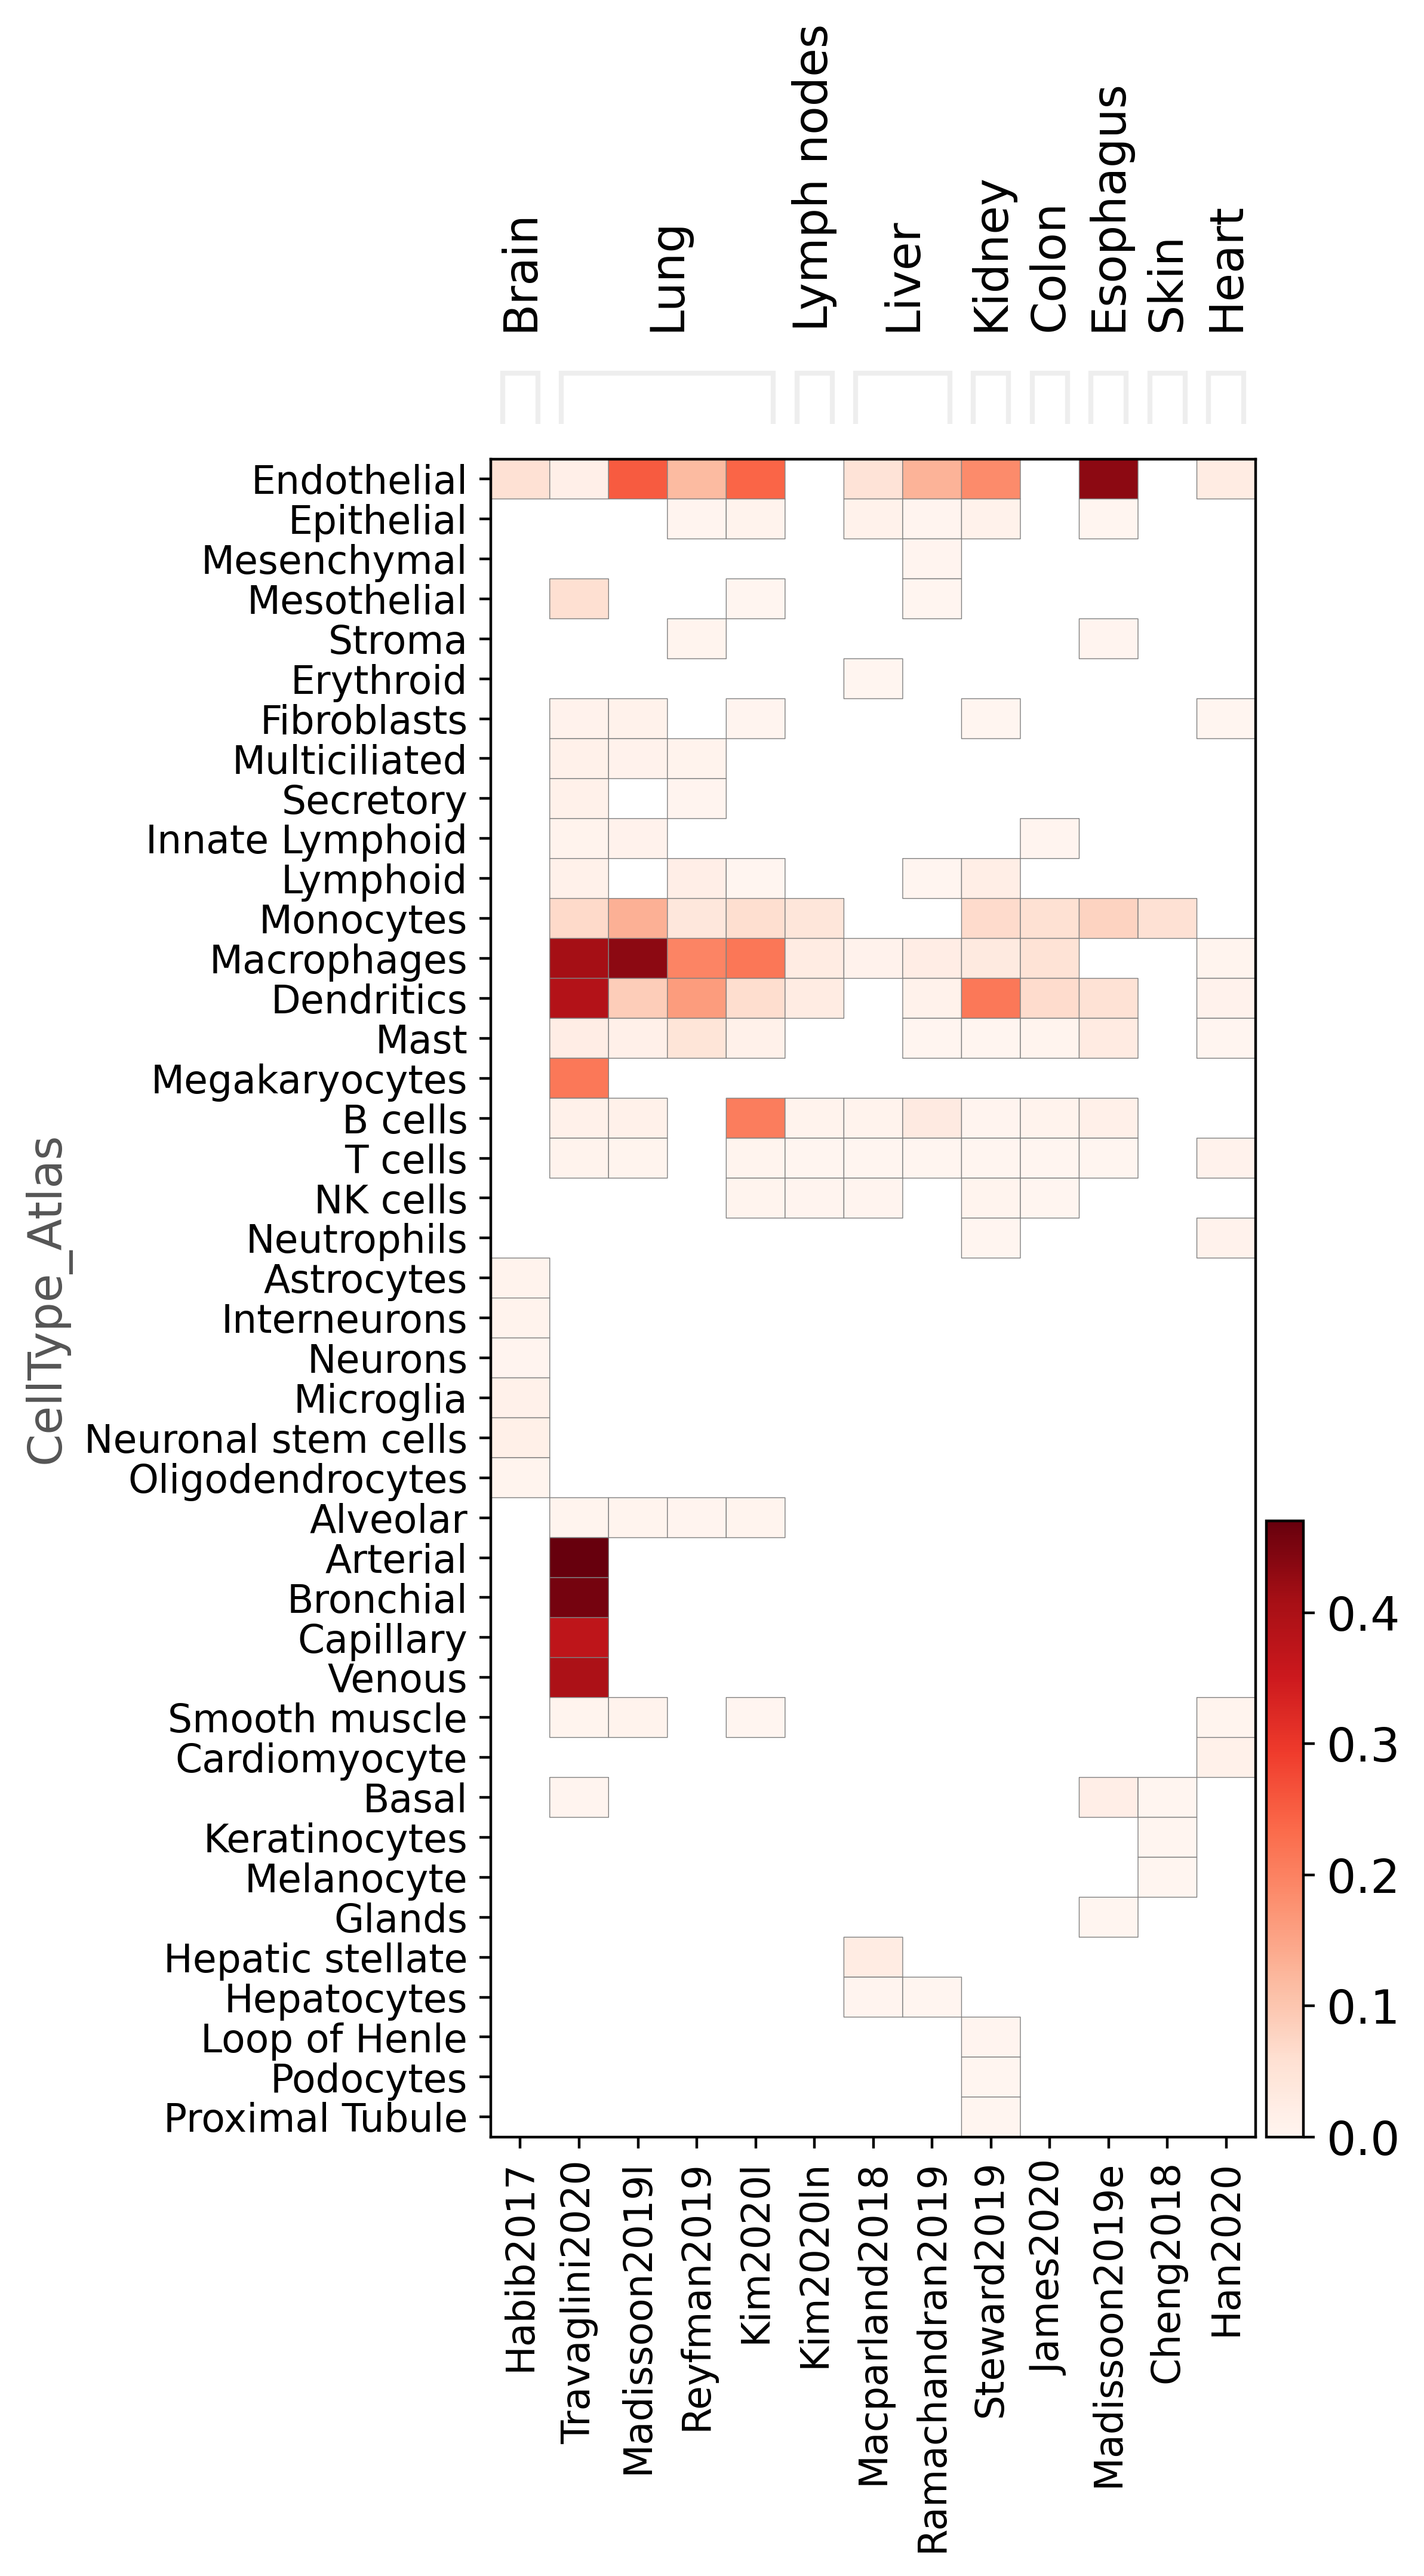

GridSpec(2, 3, height_ratios=[0.5, 10], width_ratios=[4.16, 0, 0.2])

In [55]:
#no mouse
labels=['Brain', 'Lung', 'Lymph nodes','Liver','Kidney','Colon','Esophagus','Skin','Heart']
positions=[(0, 0), (1, 4), (5,5), (6,7), (8,8),(9,9),(10,10),(11,11),(12,12)]
genelist = ['Habib2017', 'Travaglini2020', 'Madissoon2019l',
       'Reyfman2019', 'Kim2020l', 'Kim2020ln', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020',
       'Madissoon2019e', 'Cheng2018', 'Han2020']

sc.pl.matrixplot(adata_all_datasets, genelist, groupby='CellType_Atlas',
              var_group_positions=positions, 
              var_group_labels=labels, var_group_rotation=90)

## CD33

In [6]:
#read in all datasets and subset to only include CD33

#Brain
adata_habib=sc.read(writepath + 'habib2017_human_processed.h5ad')
adata_habib=adata_habib[:,'CD33'].copy()

adata_habib_mouse=sc.read(writepath + 'habib2017_mouse_processed.h5ad')
adata_habib_mouse=adata_habib[:,'Cd33'].copy()

print('Brain datasets complete')

#Lung
adata_travaglini=sc.read(writepath + 'travaglini2020_processed.h5ad')
adata_travaglini=adata_travaglini[:,'CD33'].copy()

adata_madissoon_lung=sc.read(writepath + 'madissoon2020_lung_processed.h5ad')
adata_madissoon_lung=adata_madissoon_lung[:,'CD33'].copy()

adata_reyfman=sc.read(writepath + 'reyfman2019_processed.h5ad')
adata_reyfman=adata_reyfman[:,'CD33'].copy()

adata_kim=sc.read(writepath + 'kim2020_lung_processed.h5ad')
adata_kim=adata_kim[:,'CD33'].copy()

print('Lung datasets complete')

#Lymph nodes
adata_kim_ln=sc.read(writepath + 'kim2020_lymphnodes_processed.h5ad')
adata_kim_ln=adata_kim_ln[:,'CD33'].copy()

print('Lymph nodes datasets complete')

#Liver
adata_macparland=sc.read(writepath + 'macparland2018_processed.h5ad')
adata_macparland=adata_macparland[:,'CD33'].copy()

adata_ramachandran=sc.read(writepath + 'ramachandran2019_processed.h5ad')
adata_ramachandran=adata_ramachandran[:,'CD33'].copy()

print('Liver datasets complete')

#Kidney
adata_steward=sc.read(writepath + 'steward2019_processed.h5ad')
adata_steward=adata_steward[:,'CD33'].copy()

print('Kidney datasets complete')

#Gut
adata_james=sc.read(writepath + 'james2020_processed.h5ad')
adata_james=adata_james[:,'CD33'].copy()

adata_madissoon_colon=sc.read(writepath + 'madissoon2019_colon_processed.h5ad')
adata_madissoon_colon=adata_madissoon_colon[:,'CD33'].copy()

print('Gut datasets complete')

#Skin
adata_cheng=sc.read(writepath + 'cheng2018_processed.h5ad')
adata_cheng=adata_cheng[:,'CD33'].copy()

print('Skin datasets complete')

#Heart
adata_han=sc.read(writepath + 'han2020_processed.h5ad')
adata_han=adata_han[:,'CD33'].copy()

print('Heart datasets complete')

Brain datasets complete
Lung datasets complete
Lymph nodes datasets complete
Liver datasets complete
Kidney datasets complete
Gut datasets complete
Skin datasets complete
Heart datasets complete


In [ ]:
# extract goi expression and append across datasets

In [7]:
#lets start with the first dataset - habib

In [8]:
adata_habib.X

<13067x1 sparse matrix of type '<class 'numpy.float32'>'
	with 34 stored elements in Compressed Sparse Row format>

In [9]:
adata_habib.X=sp.sparse.csr_matrix.todense(adata_habib.X)

In [10]:
adata_habib.X

matrix([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], dtype=float32)

In [11]:
matrix=adata_habib.X

In [12]:
newmatrix=pd.DataFrame(matrix)
newmatrix['Habib2017']=newmatrix[0]
del newmatrix[0]
newmatrix

Habib2017
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
...          ...
13062        0.0
13063        0.0
13064        0.0
13065        0.0
13066        0.0

[13067 rows x 1 columns]

In [13]:
adata_habib_mouse.X

<13182x1 sparse matrix of type '<class 'numpy.float32'>'
	with 46 stored elements in Compressed Sparse Row format>

In [14]:
adata_habib_mouse.X=sp.sparse.csr_matrix.todense(adata_habib_mouse.X)

In [15]:
newmatrix_tmp=pd.DataFrame(adata_habib_mouse.X)
newmatrix_tmp['Habib2017_mouse']=newmatrix_tmp[0]
del newmatrix_tmp[0]
newmatrix_tmp

Habib2017_mouse
0                  0.0
1                  0.0
2                  0.0
3                  0.0
4                  0.0
...                ...
13177              0.0
13178              0.0
13179              0.0
13180              0.0
13181              0.0

[13182 rows x 1 columns]

In [16]:
len(newmatrix.index)

13067

In [17]:
len(newmatrix_tmp.index)

13182

In [18]:
#assign new index for newmatrix_peng_healthy
newmatrix_tmp.index=np.arange(start=len(newmatrix.index), 
                                 stop=len(newmatrix.index)+len(newmatrix_tmp.index), 
                                 step=1)

In [19]:
#merge these two properly
combinedmatrix=pd.concat([newmatrix, newmatrix_tmp], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse
0            0.0              NaN
1            0.0              NaN
2            0.0              NaN
3            0.0              NaN
4            0.0              NaN
...          ...              ...
26244        NaN              0.0
26245        NaN              0.0
26246        NaN              0.0
26247        NaN              0.0
26248        NaN              0.0

[26249 rows x 2 columns]

In [20]:
adata_travaglini.X = adata_travaglini.X.todense()
matrix=adata_travaglini.X

In [21]:
newmatrix=pd.DataFrame(adata_travaglini.X)
newmatrix['Travaglini2020']=newmatrix[0]
del newmatrix[0]
newmatrix

Travaglini2020
0            0.000000
1            0.559668
2            0.000000
3            0.287071
4            0.000000
...               ...
60628        0.000000
60629        0.000000
60630        0.000000
60631        0.000000
60632        0.000000

[60633 rows x 1 columns]

In [22]:
len(combinedmatrix)

26249

In [23]:
len(newmatrix)

60633

In [24]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [25]:
combinedmatrix

Habib2017  Habib2017_mouse
0            0.0              NaN
1            0.0              NaN
2            0.0              NaN
3            0.0              NaN
4            0.0              NaN
...          ...              ...
26244        NaN              0.0
26245        NaN              0.0
26246        NaN              0.0
26247        NaN              0.0
26248        NaN              0.0

[26249 rows x 2 columns]

In [26]:
newmatrix

Travaglini2020
26249        0.000000
26250        0.559668
26251        0.000000
26252        0.287071
26253        0.000000
...               ...
86877        0.000000
86878        0.000000
86879        0.000000
86880        0.000000
86881        0.000000

[60633 rows x 1 columns]

In [27]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020
0            0.0              NaN             NaN
1            0.0              NaN             NaN
2            0.0              NaN             NaN
3            0.0              NaN             NaN
4            0.0              NaN             NaN
...          ...              ...             ...
86877        NaN              NaN             0.0
86878        NaN              NaN             0.0
86879        NaN              NaN             0.0
86880        NaN              NaN             0.0
86881        NaN              NaN             0.0

[86882 rows x 3 columns]

In [28]:
adata_madissoon_lung.X = adata_madissoon_lung.X.todense()
matrix=adata_madissoon_lung.X

In [29]:
newmatrix=pd.DataFrame(adata_madissoon_lung.X)
newmatrix['Madissoon2019_Lung']=newmatrix[0]
del newmatrix[0]
newmatrix

Madissoon2019_Lung
0                     0.0
1                     0.0
2                     0.0
3                     0.0
4                     0.0
...                   ...
56299                 0.0
56300                 0.0
56301                 0.0
56302                 0.0
56303                 0.0

[56304 rows x 1 columns]

In [30]:
len(combinedmatrix)

86882

In [31]:
len(newmatrix)

56304

In [32]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [33]:
newmatrix

Madissoon2019_Lung
86882                  0.0
86883                  0.0
86884                  0.0
86885                  0.0
86886                  0.0
...                    ...
143181                 0.0
143182                 0.0
143183                 0.0
143184                 0.0
143185                 0.0

[56304 rows x 1 columns]

In [34]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020
0            0.0              NaN             NaN
1            0.0              NaN             NaN
2            0.0              NaN             NaN
3            0.0              NaN             NaN
4            0.0              NaN             NaN
...          ...              ...             ...
86877        NaN              NaN             0.0
86878        NaN              NaN             0.0
86879        NaN              NaN             0.0
86880        NaN              NaN             0.0
86881        NaN              NaN             0.0

[86882 rows x 3 columns]

In [35]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung
0             0.0              NaN             NaN                 NaN
1             0.0              NaN             NaN                 NaN
2             0.0              NaN             NaN                 NaN
3             0.0              NaN             NaN                 NaN
4             0.0              NaN             NaN                 NaN
...           ...              ...             ...                 ...
143181        NaN              NaN             NaN                 0.0
143182        NaN              NaN             NaN                 0.0
143183        NaN              NaN             NaN                 0.0
143184        NaN              NaN             NaN                 0.0
143185        NaN              NaN             NaN                 0.0

[143186 rows x 4 columns]

In [36]:
adata_reyfman.X = adata_reyfman.X.todense()
matrix=adata_reyfman.X

In [37]:
newmatrix=pd.DataFrame(adata_reyfman.X)
newmatrix['Reyfman2019']=newmatrix[0]
del newmatrix[0]
newmatrix

Reyfman2019
0         1.060953
1         0.000000
2         0.000000
3         0.474360
4         0.000000
...            ...
41498     0.000000
41499     0.000000
41500     1.266389
41501     0.000000
41502     0.000000

[41503 rows x 1 columns]

In [38]:
len(combinedmatrix)

143186

In [39]:
len(newmatrix)

41503

In [40]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [41]:
newmatrix

Reyfman2019
143186     1.060953
143187     0.000000
143188     0.000000
143189     0.474360
143190     0.000000
...             ...
184684     0.000000
184685     0.000000
184686     1.266389
184687     0.000000
184688     0.000000

[41503 rows x 1 columns]

In [42]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung
0             0.0              NaN             NaN                 NaN
1             0.0              NaN             NaN                 NaN
2             0.0              NaN             NaN                 NaN
3             0.0              NaN             NaN                 NaN
4             0.0              NaN             NaN                 NaN
...           ...              ...             ...                 ...
143181        NaN              NaN             NaN                 0.0
143182        NaN              NaN             NaN                 0.0
143183        NaN              NaN             NaN                 0.0
143184        NaN              NaN             NaN                 0.0
143185        NaN              NaN             NaN                 0.0

[143186 rows x 4 columns]

In [43]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
184684        NaN              NaN             NaN                 NaN   
184685        NaN              NaN             NaN                 NaN   
184686        NaN              NaN             NaN                 NaN   
184687        NaN              NaN             NaN                 NaN   
184688        NaN              NaN             NaN                 NaN   

        Reyfman2019  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
184684     0.000000  
184685     0.000000  
184686     1.266389  
184687     0.000000  
184688     0.000000  

[184689 rows x 5 columns]

In [44]:
#adata_kim.X = adata_kim.X.todense()
matrix=adata_kim.X

In [45]:
newmatrix=pd.DataFrame(adata_kim.X)
newmatrix['Kim2020_Lung']=newmatrix[0]
del newmatrix[0]
newmatrix

Kim2020_Lung
0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
...             ...
42990      0.000000
42991      0.000000
42992      0.000000
42993      0.647448
42994      0.000000

[42995 rows x 1 columns]

In [46]:
len(combinedmatrix)

184689

In [47]:
len(newmatrix)

42995

In [48]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [49]:
newmatrix

Kim2020_Lung
184689      0.000000
184690      0.000000
184691      0.000000
184692      0.000000
184693      0.000000
...              ...
227679      0.000000
227680      0.000000
227681      0.000000
227682      0.647448
227683      0.000000

[42995 rows x 1 columns]

In [50]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
184684        NaN              NaN             NaN                 NaN   
184685        NaN              NaN             NaN                 NaN   
184686        NaN              NaN             NaN                 NaN   
184687        NaN              NaN             NaN                 NaN   
184688        NaN              NaN             NaN                 NaN   

        Reyfman2019  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
184684     0.000000  
184685     0.000000  
184686     1.266389  
184687     0.000000  
184688     0.000000  

[184689 rows x 5 columns]

In [51]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
227679        NaN              NaN             NaN                 NaN   
227680        NaN              NaN             NaN                 NaN   
227681        NaN              NaN             NaN                 NaN   
227682        NaN              NaN             NaN                 NaN   
227683        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  
0               NaN           NaN  
1               NaN           NaN  
2               NaN           NaN  
3               NaN           NaN  
4               NaN           NaN  
...             ...           ...  
227679          NaN      0.000000  
227680          NaN      0.000000  
227681          NaN      0.000000  
227682          NaN      0.647448  
227683          NaN      0.000000  

[227684 rows x 6 columns]

In [52]:
#adata_kim_ln.X = adata_kim_ln.X.todense()
matrix=adata_kim_ln.X

In [53]:
newmatrix=pd.DataFrame(adata_kim_ln.X)
newmatrix['Kim2020_LymphNodes']=newmatrix[0]
del newmatrix[0]
newmatrix

Kim2020_LymphNodes
0                     0.0
1                     0.0
2                     0.0
3                     0.0
4                     0.0
...                   ...
37441                 0.0
37442                 0.0
37443                 0.0
37444                 0.0
37445                 0.0

[37446 rows x 1 columns]

In [54]:
len(combinedmatrix)

227684

In [55]:
len(newmatrix)

37446

In [56]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [57]:
newmatrix

Kim2020_LymphNodes
227684                 0.0
227685                 0.0
227686                 0.0
227687                 0.0
227688                 0.0
...                    ...
265125                 0.0
265126                 0.0
265127                 0.0
265128                 0.0
265129                 0.0

[37446 rows x 1 columns]

In [58]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
227679        NaN              NaN             NaN                 NaN   
227680        NaN              NaN             NaN                 NaN   
227681        NaN              NaN             NaN                 NaN   
227682        NaN              NaN             NaN                 NaN   
227683        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  
0               NaN           NaN  
1               NaN           NaN  
2               NaN           NaN  
3               NaN           NaN  
4               NaN           NaN  
...             ...           ...  
227679          NaN      0.000000  
227680          NaN      0.000000  
227681          NaN      0.000000  
227682          NaN      0.647448  
227683          NaN      0.000000  

[227684 rows x 6 columns]

In [59]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
265125        NaN              NaN             NaN                 NaN   
265126        NaN              NaN             NaN                 NaN   
265127        NaN              NaN             NaN                 NaN   
265128        NaN              NaN             NaN                 NaN   
265129        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  
0               NaN           NaN                 NaN  
1               NaN           NaN                 NaN  
2               NaN           NaN                 NaN  
3               NaN           NaN                 NaN  
4               NaN           NaN                 NaN  
...             ...           ...                 ...  
265125          NaN           NaN                 0.0  
265126          NaN           NaN                 0.0  
265127          NaN           NaN                 0.0  
265128          NaN           NaN                 0.0  
265129          NaN           NaN                 0.0  

[265130 rows x 7 columns]

In [60]:
adata_macparland.X = adata_macparland.X.todense()
matrix=adata_macparland.X

In [61]:
newmatrix=pd.DataFrame(adata_macparland.X)
newmatrix['Macparland2018']=newmatrix[0]
del newmatrix[0]
newmatrix

Macparland2018
0                0.0
1                0.0
2                0.0
3                0.0
4                0.0
...              ...
6266             0.0
6267             0.0
6268             0.0
6269             0.0
6270             0.0

[6271 rows x 1 columns]

In [62]:
len(combinedmatrix)

265130

In [63]:
len(newmatrix)

6271

In [64]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [65]:
newmatrix

Macparland2018
265130             0.0
265131             0.0
265132             0.0
265133             0.0
265134             0.0
...                ...
271396             0.0
271397             0.0
271398             0.0
271399             0.0
271400             0.0

[6271 rows x 1 columns]

In [66]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
265125        NaN              NaN             NaN                 NaN   
265126        NaN              NaN             NaN                 NaN   
265127        NaN              NaN             NaN                 NaN   
265128        NaN              NaN             NaN                 NaN   
265129        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  
0               NaN           NaN                 NaN  
1               NaN           NaN                 NaN  
2               NaN           NaN                 NaN  
3               NaN           NaN                 NaN  
4               NaN           NaN                 NaN  
...             ...           ...                 ...  
265125          NaN           NaN                 0.0  
265126          NaN           NaN                 0.0  
265127          NaN           NaN                 0.0  
265128          NaN           NaN                 0.0  
265129          NaN           NaN                 0.0  

[265130 rows x 7 columns]

In [67]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
271396        NaN              NaN             NaN                 NaN   
271397        NaN              NaN             NaN                 NaN   
271398        NaN              NaN             NaN                 NaN   
271399        NaN              NaN             NaN                 NaN   
271400        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  
0               NaN           NaN                 NaN             NaN  
1               NaN           NaN                 NaN             NaN  
2               NaN           NaN                 NaN             NaN  
3               NaN           NaN                 NaN             NaN  
4               NaN           NaN                 NaN             NaN  
...             ...           ...                 ...             ...  
271396          NaN           NaN                 NaN             0.0  
271397          NaN           NaN                 NaN             0.0  
271398          NaN           NaN                 NaN             0.0  
271399          NaN           NaN                 NaN             0.0  
271400          NaN           NaN                 NaN             0.0  

[271401 rows x 8 columns]

In [68]:
adata_ramachandran.X = adata_ramachandran.X.todense()
matrix=adata_ramachandran.X

In [69]:
newmatrix=pd.DataFrame(adata_ramachandran.X)
newmatrix['Ramachandran2019']=newmatrix[0]
del newmatrix[0]
newmatrix

Ramachandran2019
0               0.00000
1               0.00000
2               0.00000
3               0.00000
4               1.49419
...                 ...
33032           0.00000
33033           0.00000
33034           0.00000
33035           0.00000
33036           0.00000

[33037 rows x 1 columns]

In [70]:
len(combinedmatrix)

271401

In [71]:
len(newmatrix)

33037

In [72]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [73]:
newmatrix

Ramachandran2019
271401           0.00000
271402           0.00000
271403           0.00000
271404           0.00000
271405           1.49419
...                  ...
304433           0.00000
304434           0.00000
304435           0.00000
304436           0.00000
304437           0.00000

[33037 rows x 1 columns]

In [74]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
271396        NaN              NaN             NaN                 NaN   
271397        NaN              NaN             NaN                 NaN   
271398        NaN              NaN             NaN                 NaN   
271399        NaN              NaN             NaN                 NaN   
271400        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  
0               NaN           NaN                 NaN             NaN  
1               NaN           NaN                 NaN             NaN  
2               NaN           NaN                 NaN             NaN  
3               NaN           NaN                 NaN             NaN  
4               NaN           NaN                 NaN             NaN  
...             ...           ...                 ...             ...  
271396          NaN           NaN                 NaN             0.0  
271397          NaN           NaN                 NaN             0.0  
271398          NaN           NaN                 NaN             0.0  
271399          NaN           NaN                 NaN             0.0  
271400          NaN           NaN                 NaN             0.0  

[271401 rows x 8 columns]

In [75]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
304433        NaN              NaN             NaN                 NaN   
304434        NaN              NaN             NaN                 NaN   
304435        NaN              NaN             NaN                 NaN   
304436        NaN              NaN             NaN                 NaN   
304437        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
304433          NaN           NaN                 NaN             NaN   
304434          NaN           NaN                 NaN             NaN   
304435          NaN           NaN                 NaN             NaN   
304436          NaN           NaN                 NaN             NaN   
304437          NaN           NaN                 NaN             NaN   

        Ramachandran2019  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
...                  ...  
304433               0.0  
304434               0.0  
304435               0.0  
304436               0.0  
304437               0.0  

[304438 rows x 9 columns]

In [76]:
adata_steward.X = adata_steward.X.todense()
matrix=adata_steward.X

In [77]:
newmatrix=pd.DataFrame(adata_steward.X)
newmatrix['Steward2019']=newmatrix[0]
del newmatrix[0]
newmatrix

Steward2019
0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
...            ...
40263     0.000000
40264     0.000000
40265     0.000000
40266     0.000000
40267     1.246194

[40268 rows x 1 columns]

In [78]:
len(combinedmatrix)

304438

In [79]:
len(newmatrix)

40268

In [80]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [81]:
newmatrix

Steward2019
304438     0.000000
304439     0.000000
304440     0.000000
304441     0.000000
304442     0.000000
...             ...
344701     0.000000
344702     0.000000
344703     0.000000
344704     0.000000
344705     1.246194

[40268 rows x 1 columns]

In [82]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
304433        NaN              NaN             NaN                 NaN   
304434        NaN              NaN             NaN                 NaN   
304435        NaN              NaN             NaN                 NaN   
304436        NaN              NaN             NaN                 NaN   
304437        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
304433          NaN           NaN                 NaN             NaN   
304434          NaN           NaN                 NaN             NaN   
304435          NaN           NaN                 NaN             NaN   
304436          NaN           NaN                 NaN             NaN   
304437          NaN           NaN                 NaN             NaN   

        Ramachandran2019  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
...                  ...  
304433               0.0  
304434               0.0  
304435               0.0  
304436               0.0  
304437               0.0  

[304438 rows x 9 columns]

In [83]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
344701        NaN              NaN             NaN                 NaN   
344702        NaN              NaN             NaN                 NaN   
344703        NaN              NaN             NaN                 NaN   
344704        NaN              NaN             NaN                 NaN   
344705        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
344701          NaN           NaN                 NaN             NaN   
344702          NaN           NaN                 NaN             NaN   
344703          NaN           NaN                 NaN             NaN   
344704          NaN           NaN                 NaN             NaN   
344705          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  
0                    NaN          NaN  
1                    NaN          NaN  
2                    NaN          NaN  
3                    NaN          NaN  
4                    NaN          NaN  
...                  ...          ...  
344701               NaN     0.000000  
344702               NaN     0.000000  
344703               NaN     0.000000  
344704               NaN     0.000000  
344705               NaN     1.246194  

[344706 rows x 10 columns]

In [84]:
adata_james.X = adata_james.X.todense()
matrix=adata_james.X

In [85]:
newmatrix=pd.DataFrame(adata_james.X)
newmatrix['James2020']=newmatrix[0]
del newmatrix[0]
newmatrix

James2020
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
...          ...
41317        0.0
41318        0.0
41319        0.0
41320        0.0
41321        0.0

[41322 rows x 1 columns]

In [86]:
len(combinedmatrix)

344706

In [87]:
len(newmatrix)

41322

In [88]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [89]:
newmatrix

James2020
344706        0.0
344707        0.0
344708        0.0
344709        0.0
344710        0.0
...           ...
386023        0.0
386024        0.0
386025        0.0
386026        0.0
386027        0.0

[41322 rows x 1 columns]

In [90]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
344701        NaN              NaN             NaN                 NaN   
344702        NaN              NaN             NaN                 NaN   
344703        NaN              NaN             NaN                 NaN   
344704        NaN              NaN             NaN                 NaN   
344705        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
344701          NaN           NaN                 NaN             NaN   
344702          NaN           NaN                 NaN             NaN   
344703          NaN           NaN                 NaN             NaN   
344704          NaN           NaN                 NaN             NaN   
344705          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  
0                    NaN          NaN  
1                    NaN          NaN  
2                    NaN          NaN  
3                    NaN          NaN  
4                    NaN          NaN  
...                  ...          ...  
344701               NaN     0.000000  
344702               NaN     0.000000  
344703               NaN     0.000000  
344704               NaN     0.000000  
344705               NaN     1.246194  

[344706 rows x 10 columns]

In [91]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
386023        NaN              NaN             NaN                 NaN   
386024        NaN              NaN             NaN                 NaN   
386025        NaN              NaN             NaN                 NaN   
386026        NaN              NaN             NaN                 NaN   
386027        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
386023          NaN           NaN                 NaN             NaN   
386024          NaN           NaN                 NaN             NaN   
386025          NaN           NaN                 NaN             NaN   
386026          NaN           NaN                 NaN             NaN   
386027          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  
0                    NaN          NaN        NaN  
1                    NaN          NaN        NaN  
2                    NaN          NaN        NaN  
3                    NaN          NaN        NaN  
4                    NaN          NaN        NaN  
...                  ...          ...        ...  
386023               NaN          NaN        0.0  
386024               NaN          NaN        0.0  
386025               NaN          NaN        0.0  
386026               NaN          NaN        0.0  
386027               NaN          NaN        0.0  

[386028 rows x 11 columns]

In [94]:
adata_madissoon_colon.X = adata_madissoon_colon.X.todense()
matrix=adata_madissoon_colon.X

In [95]:
newmatrix=pd.DataFrame(adata_madissoon_colon.X)
newmatrix['Madissoon2019_Colon']=newmatrix[0]
del newmatrix[0]
newmatrix

Madissoon2019_Colon
0                      0.0
1                      0.0
2                      0.0
3                      0.0
4                      0.0
...                    ...
87942                  0.0
87943                  0.0
87944                  0.0
87945                  0.0
87946                  0.0

[87947 rows x 1 columns]

In [96]:
len(combinedmatrix)

386028

In [97]:
len(newmatrix)

87947

In [98]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [99]:
newmatrix

Madissoon2019_Colon
386028                  0.0
386029                  0.0
386030                  0.0
386031                  0.0
386032                  0.0
...                     ...
473970                  0.0
473971                  0.0
473972                  0.0
473973                  0.0
473974                  0.0

[87947 rows x 1 columns]

In [100]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
386023        NaN              NaN             NaN                 NaN   
386024        NaN              NaN             NaN                 NaN   
386025        NaN              NaN             NaN                 NaN   
386026        NaN              NaN             NaN                 NaN   
386027        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
386023          NaN           NaN                 NaN             NaN   
386024          NaN           NaN                 NaN             NaN   
386025          NaN           NaN                 NaN             NaN   
386026          NaN           NaN                 NaN             NaN   
386027          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  
0                    NaN          NaN        NaN  
1                    NaN          NaN        NaN  
2                    NaN          NaN        NaN  
3                    NaN          NaN        NaN  
4                    NaN          NaN        NaN  
...                  ...          ...        ...  
386023               NaN          NaN        0.0  
386024               NaN          NaN        0.0  
386025               NaN          NaN        0.0  
386026               NaN          NaN        0.0  
386027               NaN          NaN        0.0  

[386028 rows x 11 columns]

In [101]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
473970        NaN              NaN             NaN                 NaN   
473971        NaN              NaN             NaN                 NaN   
473972        NaN              NaN             NaN                 NaN   
473973        NaN              NaN             NaN                 NaN   
473974        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
473970          NaN           NaN                 NaN             NaN   
473971          NaN           NaN                 NaN             NaN   
473972          NaN           NaN                 NaN             NaN   
473973          NaN           NaN                 NaN             NaN   
473974          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  Madissoon2019_Colon  
0                    NaN          NaN        NaN                  NaN  
1                    NaN          NaN        NaN                  NaN  
2                    NaN          NaN        NaN                  NaN  
3                    NaN          NaN        NaN                  NaN  
4                    NaN          NaN        NaN                  NaN  
...                  ...          ...        ...                  ...  
473970               NaN          NaN        NaN                  0.0  
473971               NaN          NaN        NaN                  0.0  
473972               NaN          NaN        NaN                  0.0  
473973               NaN          NaN        NaN                  0.0  
473974               NaN          NaN        NaN                  0.0  

[473975 rows x 12 columns]

In [102]:
adata_cheng.X = adata_cheng.X.todense()
matrix=adata_cheng.X

In [103]:
newmatrix=pd.DataFrame(adata_cheng.X)
newmatrix['Cheng2018']=newmatrix[0]
del newmatrix[0]
newmatrix

Cheng2018
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
...          ...
68031        0.0
68032        0.0
68033        0.0
68034        0.0
68035        0.0

[68036 rows x 1 columns]

In [104]:
len(combinedmatrix)

473975

In [105]:
len(newmatrix)

68036

In [106]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [107]:
newmatrix

Cheng2018
473975        0.0
473976        0.0
473977        0.0
473978        0.0
473979        0.0
...           ...
542006        0.0
542007        0.0
542008        0.0
542009        0.0
542010        0.0

[68036 rows x 1 columns]

In [108]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
473970        NaN              NaN             NaN                 NaN   
473971        NaN              NaN             NaN                 NaN   
473972        NaN              NaN             NaN                 NaN   
473973        NaN              NaN             NaN                 NaN   
473974        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
473970          NaN           NaN                 NaN             NaN   
473971          NaN           NaN                 NaN             NaN   
473972          NaN           NaN                 NaN             NaN   
473973          NaN           NaN                 NaN             NaN   
473974          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  Madissoon2019_Colon  
0                    NaN          NaN        NaN                  NaN  
1                    NaN          NaN        NaN                  NaN  
2                    NaN          NaN        NaN                  NaN  
3                    NaN          NaN        NaN                  NaN  
4                    NaN          NaN        NaN                  NaN  
...                  ...          ...        ...                  ...  
473970               NaN          NaN        NaN                  0.0  
473971               NaN          NaN        NaN                  0.0  
473972               NaN          NaN        NaN                  0.0  
473973               NaN          NaN        NaN                  0.0  
473974               NaN          NaN        NaN                  0.0  

[473975 rows x 12 columns]

In [109]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
542006        NaN              NaN             NaN                 NaN   
542007        NaN              NaN             NaN                 NaN   
542008        NaN              NaN             NaN                 NaN   
542009        NaN              NaN             NaN                 NaN   
542010        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
542006          NaN           NaN                 NaN             NaN   
542007          NaN           NaN                 NaN             NaN   
542008          NaN           NaN                 NaN             NaN   
542009          NaN           NaN                 NaN             NaN   
542010          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  Madissoon2019_Colon  \
0                    NaN          NaN        NaN                  NaN   
1                    NaN          NaN        NaN                  NaN   
2                    NaN          NaN        NaN                  NaN   
3                    NaN          NaN        NaN                  NaN   
4                    NaN          NaN        NaN                  NaN   
...                  ...          ...        ...                  ...   
542006               NaN          NaN        NaN                  NaN   
542007               NaN          NaN        NaN                  NaN   
542008               NaN          NaN        NaN                  NaN   
542009               NaN          NaN        NaN                  NaN   
542010               NaN          NaN        NaN                  NaN   

        Cheng2018  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
542006        0.0  
542007        0.0  
542008        0.0  
542009        0.0  
542010        0.0  

[542011 rows x 13 columns]

In [110]:
adata_han.X = adata_han.X.todense()
matrix=adata_han.X

In [111]:
newmatrix=pd.DataFrame(adata_han.X)
newmatrix['Han2020']=newmatrix[0]
del newmatrix[0]
newmatrix

Han2020
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
...       ...
2748      0.0
2749      0.0
2750      0.0
2751      0.0
2752      0.0

[2753 rows x 1 columns]

In [112]:
len(combinedmatrix)

542011

In [113]:
len(newmatrix)

2753

In [114]:
#assign new index
newmatrix.index=np.arange(start=len(combinedmatrix), 
                                 stop=len(combinedmatrix)+len(newmatrix), 
                                 step=1)

In [115]:
newmatrix

Han2020
542011      0.0
542012      0.0
542013      0.0
542014      0.0
542015      0.0
...         ...
544759      0.0
544760      0.0
544761      0.0
544762      0.0
544763      0.0

[2753 rows x 1 columns]

In [116]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
542006        NaN              NaN             NaN                 NaN   
542007        NaN              NaN             NaN                 NaN   
542008        NaN              NaN             NaN                 NaN   
542009        NaN              NaN             NaN                 NaN   
542010        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
542006          NaN           NaN                 NaN             NaN   
542007          NaN           NaN                 NaN             NaN   
542008          NaN           NaN                 NaN             NaN   
542009          NaN           NaN                 NaN             NaN   
542010          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  Madissoon2019_Colon  \
0                    NaN          NaN        NaN                  NaN   
1                    NaN          NaN        NaN                  NaN   
2                    NaN          NaN        NaN                  NaN   
3                    NaN          NaN        NaN                  NaN   
4                    NaN          NaN        NaN                  NaN   
...                  ...          ...        ...                  ...   
542006               NaN          NaN        NaN                  NaN   
542007               NaN          NaN        NaN                  NaN   
542008               NaN          NaN        NaN                  NaN   
542009               NaN          NaN        NaN                  NaN   
542010               NaN          NaN        NaN                  NaN   

        Cheng2018  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
542006        0.0  
542007        0.0  
542008        0.0  
542009        0.0  
542010        0.0  

[542011 rows x 13 columns]

In [117]:
#merge these two properly
combinedmatrix=pd.concat([combinedmatrix, newmatrix], axis=1, sort=False)
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
544759        NaN              NaN             NaN                 NaN   
544760        NaN              NaN             NaN                 NaN   
544761        NaN              NaN             NaN                 NaN   
544762        NaN              NaN             NaN                 NaN   
544763        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
544759          NaN           NaN                 NaN             NaN   
544760          NaN           NaN                 NaN             NaN   
544761          NaN           NaN                 NaN             NaN   
544762          NaN           NaN                 NaN             NaN   
544763          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  Madissoon2019_Colon  \
0                    NaN          NaN        NaN                  NaN   
1                    NaN          NaN        NaN                  NaN   
2                    NaN          NaN        NaN                  NaN   
3                    NaN          NaN        NaN                  NaN   
4                    NaN          NaN        NaN                  NaN   
...                  ...          ...        ...                  ...   
544759               NaN          NaN        NaN                  NaN   
544760               NaN          NaN        NaN                  NaN   
544761               NaN          NaN        NaN                  NaN   
544762               NaN          NaN        NaN                  NaN   
544763               NaN          NaN        NaN                  NaN   

        Cheng2018  Han2020  
0             NaN      NaN  
1             NaN      NaN  
2             NaN      NaN  
3             NaN      NaN  
4             NaN      NaN  
...           ...      ...  
544759        NaN      0.0  
544760        NaN      0.0  
544761        NaN      0.0  
544762        NaN      0.0  
544763        NaN      0.0  

[544764 rows x 14 columns]

In [118]:
combinedmatrix.columns

Index(['Habib2017', 'Habib2017_mouse', 'Travaglini2020', 'Madissoon2019_Lung',
       'Reyfman2019', 'Kim2020_Lung', 'Kim2020_LymphNodes', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020', 'Madissoon2019_Colon',
       'Cheng2018', 'Han2020'],
      dtype='object')

In [119]:
combinedmatrix.columns=['Habib2017', 'Habib2017_mouse', 'Travaglini2020', 'Madissoon2019_Lung',
       'Reyfman2019', 'Kim2020_Lung', 'Kim2020_LymphNodes', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020', 'Madissoon2019_Esophagus',
       'Cheng2018', 'Han2020']

In [120]:
combinedmatrix

Habib2017  Habib2017_mouse  Travaglini2020  Madissoon2019_Lung  \
0             0.0              NaN             NaN                 NaN   
1             0.0              NaN             NaN                 NaN   
2             0.0              NaN             NaN                 NaN   
3             0.0              NaN             NaN                 NaN   
4             0.0              NaN             NaN                 NaN   
...           ...              ...             ...                 ...   
544759        NaN              NaN             NaN                 NaN   
544760        NaN              NaN             NaN                 NaN   
544761        NaN              NaN             NaN                 NaN   
544762        NaN              NaN             NaN                 NaN   
544763        NaN              NaN             NaN                 NaN   

        Reyfman2019  Kim2020_Lung  Kim2020_LymphNodes  Macparland2018  \
0               NaN           NaN                 NaN             NaN   
1               NaN           NaN                 NaN             NaN   
2               NaN           NaN                 NaN             NaN   
3               NaN           NaN                 NaN             NaN   
4               NaN           NaN                 NaN             NaN   
...             ...           ...                 ...             ...   
544759          NaN           NaN                 NaN             NaN   
544760          NaN           NaN                 NaN             NaN   
544761          NaN           NaN                 NaN             NaN   
544762          NaN           NaN                 NaN             NaN   
544763          NaN           NaN                 NaN             NaN   

        Ramachandran2019  Steward2019  James2020  Madissoon2019_Esophagus  \
0                    NaN          NaN        NaN                      NaN   
1                    NaN          NaN        NaN                      NaN   
2                    NaN          NaN        NaN                      NaN   
3                    NaN          NaN        NaN                      NaN   
4                    NaN          NaN        NaN                      NaN   
...                  ...          ...        ...                      ...   
544759               NaN          NaN        NaN                      NaN   
544760               NaN          NaN        NaN                      NaN   
544761               NaN          NaN        NaN                      NaN   
544762               NaN          NaN        NaN                      NaN   
544763               NaN          NaN        NaN                      NaN   

        Cheng2018  Han2020  
0             NaN      NaN  
1             NaN      NaN  
2             NaN      NaN  
3             NaN      NaN  
4             NaN      NaN  
...           ...      ...  
544759        NaN      0.0  
544760        NaN      0.0  
544761        NaN      0.0  
544762        NaN      0.0  
544763        NaN      0.0  

[544764 rows x 14 columns]

In [121]:
#544764 cells over 14 datasets

In [122]:
import anndata

In [123]:
# Create AnnData object out of this combinedmatrix

adata_all_datasets=anndata.AnnData(X=combinedmatrix)


Transforming to str index.


In [124]:
adata_all_datasets

AnnData object with n_obs × n_vars = 544764 × 14 

In [125]:
#Concatenate 
adata_combined = adata_habib.concatenate(adata_habib_mouse, adata_travaglini, adata_madissoon_lung, 
                                         adata_reyfman,
                                         adata_kim, adata_kim_ln, adata_macparland, adata_ramachandran, 
                                         adata_steward, adata_james, adata_madissoon_colon, adata_cheng, adata_han,
                                         batch_key='dataset',
                                         batch_categories=['Habib2017', 'Habib2017_mouse', 'Travaglini2020', 'Madissoon2019_Lung',
       'Reyfman2019', 'Kim2020_Lung', 'Kim2020_LymphNodes', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020', 'Madissoon2019_Esophagus',
       'Cheng2018', 'Han2020'])

layers are inconsistent - only layers that are shared among all AnnData objects are included.
/opt/python/lib/python3.7/site-packages/anndata/_core/anndata.py:1880: UserWarning: Only some adata objects have `.raw` attribute, not concatenating `.raw` attributes.
  UserWarning,


In [126]:
del adata_combined.obs['BCR_SEQUENCE_ID']
del adata_combined.obs['BCR_CLONE']
del adata_combined.obs['BCR_ChainCombination']
del adata_combined.obs['BCR_ISOTYPE']
del adata_combined.obs['BCR_PANDONOR_CLONE']
del adata_combined.obs['CellType']
del adata_combined.obs['Celltypes']
del adata_combined.obs['Cluster']
del adata_combined.obs['Donor']
del adata_combined.obs['IGH_D_CALL']
del adata_combined.obs['IGH_J_CALL']
del adata_combined.obs['IGH_V_CALL_GENOTYPED']
del adata_combined.obs['IGL_C_Gene']
del adata_combined.obs['IGL_VDJ_Gene']
del adata_combined.obs['Re-annotation']
del adata_combined.obs['TCR_Clone']
del adata_combined.obs['TCR_c_gene']
del adata_combined.obs['TCR_cdr3']
del adata_combined.obs['TCR_cdr3_nt']
del adata_combined.obs['TCR_d_gene']
del adata_combined.obs['TCR_j_gene']
del adata_combined.obs['TCR_v_gene']
del adata_combined.obs['Time']
del adata_combined.obs['aetiology']
del adata_combined.obs['ann_level_1']
del adata_combined.obs['ann_level_2']
del adata_combined.obs['ann_level_3']
del adata_combined.obs['annotation_indepth']
del adata_combined.obs['annotation_lineage']
del adata_combined.obs['annotation_original']
del adata_combined.obs['broad_celltype']
del adata_combined.obs['cell subtype']
del adata_combined.obs['cell type']
del adata_combined.obs['cell type refined']
del adata_combined.obs['cell_ontology_class']
del adata_combined.obs['cell_ontology_class_broad']
del adata_combined.obs['cell_ontology_id']
del adata_combined.obs['cell_type']
del adata_combined.obs['celltype']
del adata_combined.obs['celltype_global']
del adata_combined.obs['celltype_specific']
del adata_combined.obs['compartment']
#del adata_combined.obs['celltype_global']
del adata_combined.obs['condition']
del adata_combined.obs['donor']
del adata_combined.obs['donor_time']
del adata_combined.obs['healthy']
del adata_combined.obs['ident']
del adata_combined.obs['last_author/PI']
del adata_combined.obs['leiden']
del adata_combined.obs['liver']
del adata_combined.obs['organ']
del adata_combined.obs['origin']
del adata_combined.obs['original_celltype_ann']
del adata_combined.obs['patient']
del adata_combined.obs['region']
del adata_combined.obs['sample']
del adata_combined.obs['state_exact']
del adata_combined.obs['tissue']

In [127]:
adata_combined.strings_to_categoricals()

... storing 'CellType_Atlas' as categorical


In [128]:
adata_combined.obs['CellType_Atlas'].cat.categories

Index(['Alveolar', 'Arterial', 'Astrocytes', 'B cells', 'Basal', 'Bronchial',
       'Capillary', 'Cardiomyocyte', 'Dendritics', 'Endothelial', 'Epithelial',
       'Erythroid', 'Fibroblasts', 'Glands', 'Hepatic stellate', 'Hepatocytes',
       'Innate Lymphoid', 'Interneurons', 'Keratinocytes', 'Loop of Henle',
       'Lymphoid', 'Macrophages', 'Mast', 'Megakaryocytes', 'Melanocyte',
       'Mesenchymal', 'Mesothelial', 'Microglia', 'Monocytes', 'Multiciliated',
       'NK cells', 'Neuronal stem cells', 'Neurons', 'Neutrophils',
       'Oligodendrocytes', 'Podocytes', 'Proximal Tubule', 'Remove',
       'Secretory', 'Smooth muscle', 'Stroma', 'T cells', 'Unknown', 'Venous'],
      dtype='object')

In [129]:
len(adata_combined)

544764

In [130]:
# Read in cell identity as barcodes
adata_all_datasets.obs['CellType_Atlas']=adata_combined.obs['CellType_Atlas'].values.copy()
adata_all_datasets.obs

CellType_Atlas
0             Neurons
1             Neurons
2          Astrocytes
3             Neurons
4             Neurons
...               ...
544759           Mast
544760           Mast
544761           Mast
544762           Mast
544763           Mast

[544764 rows x 1 columns]

In [131]:
adata_all_datasets.obs['CellType_Atlas'].cat.categories

Index(['Alveolar', 'Arterial', 'Astrocytes', 'B cells', 'Basal', 'Bronchial',
       'Capillary', 'Cardiomyocyte', 'Dendritics', 'Endothelial', 'Epithelial',
       'Erythroid', 'Fibroblasts', 'Glands', 'Hepatic stellate', 'Hepatocytes',
       'Innate Lymphoid', 'Interneurons', 'Keratinocytes', 'Loop of Henle',
       'Lymphoid', 'Macrophages', 'Mast', 'Megakaryocytes', 'Melanocyte',
       'Mesenchymal', 'Mesothelial', 'Microglia', 'Monocytes', 'Multiciliated',
       'NK cells', 'Neuronal stem cells', 'Neurons', 'Neutrophils',
       'Oligodendrocytes', 'Podocytes', 'Proximal Tubule', 'Remove',
       'Secretory', 'Smooth muscle', 'Stroma', 'T cells', 'Unknown', 'Venous'],
      dtype='object')

In [132]:
path

'/storage/groups/ml01/workspace/moritz.thomas/AML_celltherapy/AtlasValidation/'

In [6]:
# Remove "Unknown" and "Remove" Cluster

In [34]:
len(adata_all_datasets.obs['CellType_Atlas'].cat.categories)

44

In [35]:
ix=np.isin(adata_all_datasets.obs['CellType_Atlas'],['Alveolar', 'Arterial', 'Astrocytes', 'B cells', 'Basal', 'Bronchial',
       'Capillary', 'Cardiomyocyte', 'Dendritics', 'Endothelial', 'Epithelial',
       'Erythroid', 'Fibroblasts', 'Glands', 'Hepatic stellate', 'Hepatocytes',
       'Innate Lymphoid', 'Interneurons', 'Keratinocytes', 'Loop of Henle',
       'Lymphoid', 'Macrophages', 'Mast', 'Megakaryocytes', 'Melanocyte',
       'Mesenchymal', 'Mesothelial', 'Microglia', 'Monocytes', 'Multiciliated',
       'NK cells', 'Neuronal stem cells', 'Neurons', 'Neutrophils',
       'Oligodendrocytes', 'Podocytes', 'Proximal Tubule',
       'Secretory', 'Smooth muscle', 'Stroma', 'T cells',  'Venous']) 
adata_all_datasets=adata_all_datasets[ix].copy()

In [39]:
adata_all_datasets.strings_to_categoricals()

In [41]:
adata_all_datasets.var.index

Index(['Habib2017', 'Habib2017_mouse', 'Travaglini2020', 'Madissoon2019_Lung',
       'Reyfman2019', 'Kim2020_Lung', 'Kim2020_LymphNodes', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020',
       'Madissoon2019_Esophagus', 'Cheng2018', 'Han2020'],
      dtype='object')

In [42]:
adata_all_datasets.var.index=['Habib2017', 'Habib2017_mouse', 'Travaglini2020', 'Madissoon2019l',
       'Reyfman2019', 'Kim2020l', 'Kim2020ln', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020',
       'Madissoon2019e', 'Cheng2018', 'Han2020']

In [14]:
# reorder categories

In [43]:
order = ('Endothelial', 'Epithelial', 'Mesenchymal', 'Mesothelial','Stroma','Erythroid', 'Fibroblasts', 
         'Multiciliated','Secretory',
         'Innate Lymphoid', 'Lymphoid','Monocytes','Macrophages',
         'Dendritics', 'Mast', 'Megakaryocytes','B cells', 'T cells','NK cells','Neutrophils',
         'Astrocytes', 'Interneurons',  'Neurons', 'Microglia', 'Neuronal stem cells', 'Oligodendrocytes',
         'Alveolar', 'Arterial','Bronchial','Capillary', 'Venous','Smooth muscle','Cardiomyocyte','Basal', 
         'Keratinocytes', 'Melanocyte','Glands', 'Hepatic stellate', 'Hepatocytes','Loop of Henle', 'Podocytes',
         'Proximal Tubule')

adata_all_datasets.obs['CellType_Atlas']=adata_all_datasets.obs['CellType_Atlas'].cat.reorder_categories(list(order), 
                                                                                                         ordered=True)

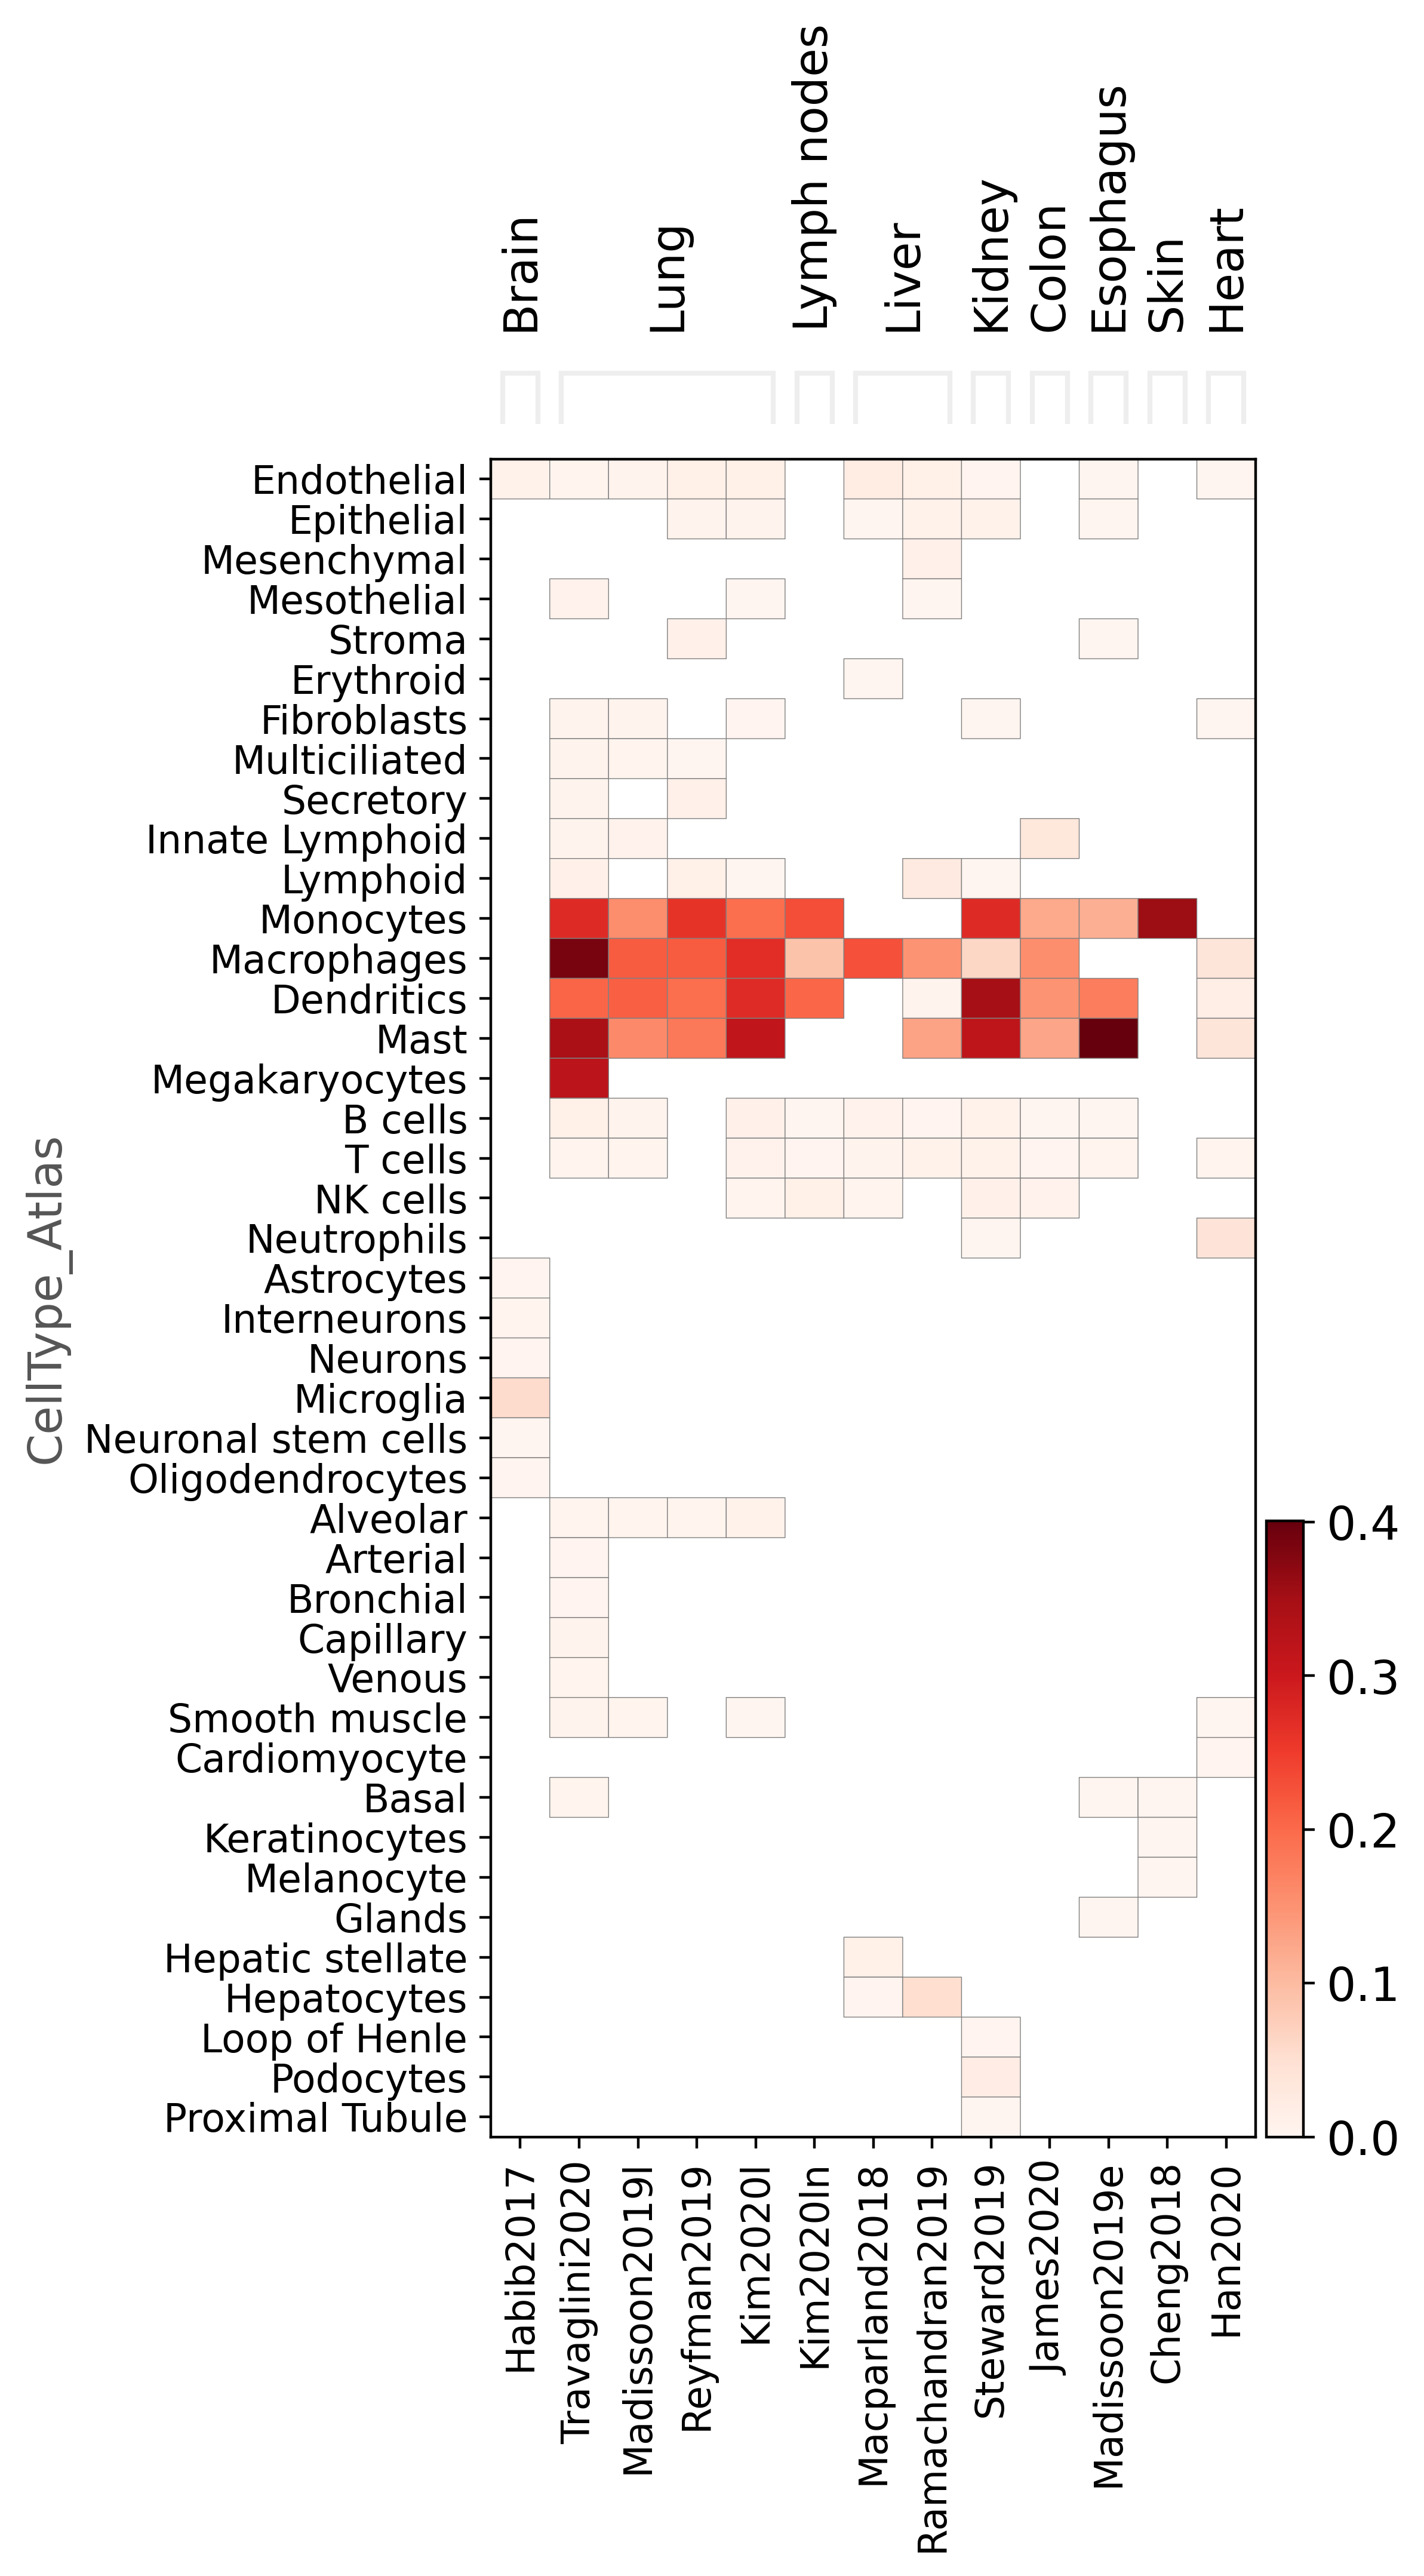

GridSpec(2, 3, height_ratios=[0.5, 10], width_ratios=[4.16, 0, 0.2])

In [44]:
# no mouse
labels=['Brain', 'Lung', 'Lymph nodes','Liver','Kidney','Colon','Esophagus','Skin','Heart']
positions=[(0, 0), (1, 4), (5,5), (6,7), (8,8),(9,9),(10,10),(11,11),(12,12)]
genelist = ['Habib2017', 'Travaglini2020', 'Madissoon2019l',
       'Reyfman2019', 'Kim2020l', 'Kim2020ln', 'Macparland2018',
       'Ramachandran2019', 'Steward2019', 'James2020',
       'Madissoon2019e', 'Cheng2018', 'Han2020']

sc.pl.matrixplot(adata_all_datasets, genelist, groupby='CellType_Atlas',
              var_group_positions=positions, 
              var_group_labels=labels, var_group_rotation=90)